## Group Guardians (U1159083,U1160853,u1161169)

## Applied Analytics Assignment 1 - Prediction of Cyber Security Maturity Level


### Data Cleaning

In [37]:
# Let's load the dataset and inspect the specific rows mentioned by the user to understand the issue with subheadings and values.
import pandas as pd

# Load the uploaded Excel file
file_path = '1 Means Norms deidentified v2.xlsx' 
sheet_name = 'combining surveys'
df = pd.read_excel(file_path, sheet_name = sheet_name)
df

Org  Maturity level  \
0      1             2.0   
1      1             2.0   
2      1             2.0   
3      1             2.0   
4      1             2.0   
..   ...             ...   
466  NaN             NaN   
467  NaN             NaN   
468  NaN             NaN   
469  NaN             NaN   
470  NaN             NaN   

    The following area best describes my work environment  \
0                                             Response      
1                                      Policy Programs      
2                               Other (please specify)      
3                                     Digital Strategy      
4                                     Digital Strategy      
..                                                 ...      
466                                                NaN      
467                                                NaN      
468                                                NaN      
469                                                NaN      
470                                                NaN      

                   Column11  \
0    Other (please specify)   
1                       NaN   
2     PA for cyber security   
3                       NaN   
4                       NaN   
..                      ...   
466                      42   
467                     NaN   
468                       3   
469                      75   
470                      25   

    I have completed my mandatory cyber safety training  \
0                                             Response    
1                                                  Yes    
2                                                  Yes    
3                                                  Yes    
4                                                  Yes    
..                                                 ...    
466                                                 20    
467                                                NaN    
468                                                  5    
469                                                 84    
470                                                 16    

    I have completed additional cyber security and safety training modules voluntarily  \
0                                             Response                                   
1                                                   No                                   
2                                                   No                                   
3                                                   No                                   
4                                                   No                                   
..                                                 ...                                   
466                                                NaN                                   
467                                                NaN                                   
468                                                NaN                                   
469                                                NaN                                   
470                                                NaN                                   

    I am aware of potential cyber security threats  \
0                                         Response   
1                                                7   
2                                               10   
3                                                8   
4                                               10   
..                                             ...   
466                                            NaN   
467                                            NaN   
468                                            NaN   
469                                            NaN   
470                                            NaN   

    Can you name some cyber security threats?            Column19  \
0                           Viruses / Malware  Phishin

In [38]:
# Get the total number of rows and columns
rows, columns = df.shape

print(f"Total number of rows: {rows}")
print(f"Total number of columns: {columns}")


Total number of rows: 471
Total number of columns: 193


In [40]:
# Data types of the columns
df.dtypes

Org                                                                      object
Maturity level                                                          float64
The following area best describes my work environment                    object
Column11                                                                 object
I have completed my mandatory cyber safety training                      object
                                                                         ...   
Section 4   Please distribute 100 points among a, b, c, and d below:     object
Column200                                                                object
Column201                                                                object
Column202                                                                object
Comments and thoughts by interviewer                                     object
Length: 193, dtype: object

### Initial Inspection

In [41]:
# Display total null values in the dataset
null_values = df.isnull().sum().sum()
print(f"Total null values in the dataset: {null_values}")

Total null values in the dataset: 35533


In [42]:
# Analysis Data untill 449 column
df = df.iloc[:449]
df

Org  Maturity level The following area best describes my work environment  \
0     1             2.0                                           Response      
1     1             2.0                                    Policy Programs      
2     1             2.0                             Other (please specify)      
3     1             2.0                                   Digital Strategy      
4     1             2.0                                   Digital Strategy      
..   ..             ...                                                ...      
444  11             2.0                                     Administration      
445  11             2.0                                     Administration      
446  11             2.0                                     Administration      
447  11             2.0                                     Administration      
448  11             2.0                                         Management      

                   Column11  \
0    Other (please specify)   
1                       NaN   
2     PA for cyber security   
3                       NaN   
4                       NaN   
..                      ...   
444                     NaN   
445                     NaN   
446                     NaN   
447                     NaN   
448                     NaN   

    I have completed my mandatory cyber safety training  \
0                                             Response    
1                                                  Yes    
2                                                  Yes    
3                                                  Yes    
4                                                  Yes    
..                                                 ...    
444                                                NaN    
445                                                NaN    
446                                                NaN    
447                                                NaN    
448                                                NaN    

    I have completed additional cyber security and safety training modules voluntarily  \
0                                             Response                                   
1                                                   No                                   
2                                                   No                                   
3                                                   No                                   
4                                                   No                                   
..                                                 ...                                   
444                                                NaN                                   
445                                                NaN                                   
446                                                NaN                                   
447                                                NaN                                   
448                                                NaN                                   

    I am aware of potential cyber security threats  \
0                                         Response   
1                                                7   
2                                               10   
3                                                8   
4                                               10   
..                                             ...   
444                                              9   
445                                              9   
446                                              9   
447                                              5   
448                                              8   

    Can you name some cyber security threats?            Column19  \
0                           Viruses / Malware  Phishing / Whaling   
1                                         NaN  Phishing / Whaling   
2           

### Renaming Columns to Reflect Previous Headings

In [43]:
def rename_columns_to_previous(df):
    columns = df.columns
    new_columns = []
    
    # Keep track of the current "real" column name
    current_col_name = None
    
    # Iterate over the columns
    for col in columns:
        if 'Column' in col and col.replace('Column', '').isdigit():
            # If it's a "ColumnXXX", use the previous real column name
            new_columns.append(current_col_name)
        else:
            # If it's a regular column name, update the current column name and append it
            current_col_name = col
            new_columns.append(col)
    
    # Set the new column names
    df.columns = new_columns
    return df

# Apply the function to rename columns
df = rename_columns_to_previous(df)

# Display the updated column names
print(df.columns)

Index(['Org', 'Maturity level',
       'The following area best describes my work environment',
       'The following area best describes my work environment',
       'I have completed my mandatory cyber safety training',
       'I have completed additional cyber security and safety training modules voluntarily',
       'I am aware of potential cyber security threats',
       'Can you name some cyber security threats?',
       'Can you name some cyber security threats?',
       'Can you name some cyber security threats?',
       ...
       'Section 2   Please distribute 100 points among a, b, c, and d below:',
       'Section 3   Please distribute 100 points among a, b, c, and d below:',
       'Section 3   Please distribute 100 points among a, b, c, and d below:',
       'Section 3   Please distribute 100 points among a, b, c, and d below:',
       'Section 3   Please distribute 100 points among a, b, c, and d below:',
       'Section 4   Please distribute 100 points among a, b, c, an

### Handling Missing Values and Dropping Unnecessary Rows

In [44]:
# Step 1: Filter and drop the rows where any column contains the value 'Response'
filtered_rows = df[df.isin(['Response']).any(axis=1)]
df = df.drop(index=filtered_rows.index)
df


Org  Maturity level The following area best describes my work environment  \
1     1             2.0                                    Policy Programs      
2     1             2.0                             Other (please specify)      
3     1             2.0                                   Digital Strategy      
4     1             2.0                                   Digital Strategy      
5     1             2.0                                         Management      
..   ..             ...                                                ...      
444  11             2.0                                     Administration      
445  11             2.0                                     Administration      
446  11             2.0                                     Administration      
447  11             2.0                                     Administration      
448  11             2.0                                         Management      

    The following area best describes my work environment  \
1                                                  NaN      
2                                PA for cyber security      
3                                                  NaN      
4                                                  NaN      
5                                                  NaN      
..                                                 ...      
444                                                NaN      
445                                                NaN      
446                                                NaN      
447                                                NaN      
448                                                NaN      

    I have completed my mandatory cyber safety training  \
1                                                  Yes    
2                                                  Yes    
3                                                  Yes    
4                                                  Yes    
5                                                  Yes    
..                                                 ...    
444                                                NaN    
445                                                NaN    
446                                                NaN    
447                                                NaN    
448                                                NaN    

    I have completed additional cyber security and safety training modules voluntarily  \
1                                                   No                                   
2                                                   No                                   
3                                                   No                                   
4                                                   No                                   
5                                                   No                                   
..                                                 ...                                   
444                                                NaN                                   
445                                                NaN                                   
446                                                NaN                                   
447                                                NaN                                   
448                                                NaN                                   

    I am aware of potential cyber security threats  \
1                                                7   
2                                               10   
3                                                8   
4                                               10   
5                                               10   
..                                             ...   
444                                              9   
445                                              9   
446                   

### Removing Open-Ended Response Columns

In [45]:
#Remove Open ended response
import re

# Function to clean column names (lowercase, remove special characters)
def clean_column_name(col):
    # Convert to lowercase
    col = col.lower()
    # Remove special characters (only keep alphanumeric characters)
    col = re.sub(r'[^a-z0-9]', '', col)
    return col
  
# List of column names to drop (ignore case and special characters)
columns_to_drop_list = ['What percentage of time do you spend working from home?', 
                        'How would you describe the current state of your organisations cyber security culture?',
                        'What is a strong password?', 
                        'If you dont speak to them, why not?',
                        'What can the organisation do to better protect you from cybersecurity threats?', 
                        'Any comment you would like to make?',
                        'Comments and thoughts by interviewer?']

# Cleaned version of the column names for matching
columns_to_drop = [col for col in df.columns 
                   if any(clean_column_name(substring) in clean_column_name(col) for substring in columns_to_drop_list)]
 
 
# Drop the matching columns from the DataFrame
df = df.drop(columns=columns_to_drop)
df

Org  Maturity level The following area best describes my work environment  \
1     1             2.0                                    Policy Programs      
2     1             2.0                             Other (please specify)      
3     1             2.0                                   Digital Strategy      
4     1             2.0                                   Digital Strategy      
5     1             2.0                                         Management      
..   ..             ...                                                ...      
444  11             2.0                                     Administration      
445  11             2.0                                     Administration      
446  11             2.0                                     Administration      
447  11             2.0                                     Administration      
448  11             2.0                                         Management      

    The following area best describes my work environment  \
1                                                  NaN      
2                                PA for cyber security      
3                                                  NaN      
4                                                  NaN      
5                                                  NaN      
..                                                 ...      
444                                                NaN      
445                                                NaN      
446                                                NaN      
447                                                NaN      
448                                                NaN      

    I have completed my mandatory cyber safety training  \
1                                                  Yes    
2                                                  Yes    
3                                                  Yes    
4                                                  Yes    
5                                                  Yes    
..                                                 ...    
444                                                NaN    
445                                                NaN    
446                                                NaN    
447                                                NaN    
448                                                NaN    

    I have completed additional cyber security and safety training modules voluntarily  \
1                                                   No                                   
2                                                   No                                   
3                                                   No                                   
4                                                   No                                   
5                                                   No                                   
..                                                 ...                                   
444                                                NaN                                   
445                                                NaN                                   
446                                                NaN                                   
447                                                NaN                                   
448                                                NaN                                   

    I am aware of potential cyber security threats  \
1                                                7   
2                                               10   
3                                                8   
4                                               10   
5                                               10   
..                                             ...   
444                                              9   
445                                              9   
446                   

In [46]:
# Replacing other (please specify ) with NA
df.replace({'Other (please specify)': pd.NA}, inplace=True)
df

Org  Maturity level  \
1      1             2.0   
2      1             2.0   
3      1             2.0   
4      1             2.0   
5      1             2.0   
..   ...             ...   
444   11             2.0   
445   11             2.0   
446   11             2.0   
447   11             2.0   
448   11             2.0   

    The following area best describes my work environment  \
1                                      Policy Programs      
2                                                 <NA>      
3                                     Digital Strategy      
4                                     Digital Strategy      
5                                           Management      
..                                                 ...      
444                                     Administration      
445                                     Administration      
446                                     Administration      
447                                     Administration      
448                                         Management      

    The following area best describes my work environment  \
1                                                  NaN      
2                                PA for cyber security      
3                                                  NaN      
4                                                  NaN      
5                                                  NaN      
..                                                 ...      
444                                                NaN      
445                                                NaN      
446                                                NaN      
447                                                NaN      
448                                                NaN      

    I have completed my mandatory cyber safety training  \
1                                                  Yes    
2                                                  Yes    
3                                                  Yes    
4                                                  Yes    
5                                                  Yes    
..                                                 ...    
444                                                NaN    
445                                                NaN    
446                                                NaN    
447                                                NaN    
448                                                NaN    

    I have completed additional cyber security and safety training modules voluntarily  \
1                                                   No                                   
2                                                   No                                   
3                                                   No                                   
4                                                   No                                   
5                                                   No                                   
..                                                 ...                                   
444                                                NaN                                   
445                                                NaN                                   
446                                                NaN                                   
447                                                NaN                                   
448                                                NaN                                   

     I am aware of potential cyber security threats  \
1                                               7.0   
2                                              10.0   
3                                               8.0   
4                                              10.0   
5                                              10.0   
..                                              ...   
444                        

In [47]:
# copy the dataframe into different name
df_dataset = df.copy()
df_dataset

Org  Maturity level  \
1      1             2.0   
2      1             2.0   
3      1             2.0   
4      1             2.0   
5      1             2.0   
..   ...             ...   
444   11             2.0   
445   11             2.0   
446   11             2.0   
447   11             2.0   
448   11             2.0   

    The following area best describes my work environment  \
1                                      Policy Programs      
2                                                 <NA>      
3                                     Digital Strategy      
4                                     Digital Strategy      
5                                           Management      
..                                                 ...      
444                                     Administration      
445                                     Administration      
446                                     Administration      
447                                     Administration      
448                                         Management      

    The following area best describes my work environment  \
1                                                  NaN      
2                                PA for cyber security      
3                                                  NaN      
4                                                  NaN      
5                                                  NaN      
..                                                 ...      
444                                                NaN      
445                                                NaN      
446                                                NaN      
447                                                NaN      
448                                                NaN      

    I have completed my mandatory cyber safety training  \
1                                                  Yes    
2                                                  Yes    
3                                                  Yes    
4                                                  Yes    
5                                                  Yes    
..                                                 ...    
444                                                NaN    
445                                                NaN    
446                                                NaN    
447                                                NaN    
448                                                NaN    

    I have completed additional cyber security and safety training modules voluntarily  \
1                                                   No                                   
2                                                   No                                   
3                                                   No                                   
4                                                   No                                   
5                                                   No                                   
..                                                 ...                                   
444                                                NaN                                   
445                                                NaN                                   
446                                                NaN                                   
447                                                NaN                                   
448                                                NaN                                   

     I am aware of potential cyber security threats  \
1                                               7.0   
2                                              10.0   
3                                               8.0   
4                                              10.0   
5                                              10.0   
..                                              ...   
444                        

### Handling Duplicate Column Names

In [48]:
# Strip any ".1", ".2", etc., from the column names to get their base names
df_dataset.columns = df_dataset.columns.str.replace(r'\.\d+$', '', regex=True)

# Get a list of unique column names that are duplicated (i.e., have same base name)
duplicated_columns = df_dataset.columns[df_dataset.columns.duplicated(keep=False)].unique()

# Display the list of columns that have duplicates (i.e., with same base name)
duplicated_columns

Index(['The following area best describes my work environment',
       'Can you name some cyber security threats?',
       'Can you name some of the impacts?',
       'How could a cyber security breach at work impact you personally?',
       'What do you do to keep yourself updated with information security awareness?',
       'I feel safe from cyber security threats working from home',
       'How many are there?', 'What issues do the security policies address?',
       'How did you learn your cyber security policies?',
       'How would you prefer to learn',
       'Cyber security is a significant concern for social media',
       'In a private capacity, have you ever voluntarily undertaken any cyber-safety training?',
       'Which Social Media sites do you have accounts for?',
       'Please visit the site and check your work email, private email, and mobile phone number.  What are the results?',
       'Would you use a Password Manager?',
       'Section 1 - Please distribute 100 

In [49]:
# Iterate over each base column name that has duplicates
# Iterate over each base column name that has duplicates
for col in duplicated_columns:
    # Find all columns that have the same base name (ignoring .1, .2, etc.)
    same_columns = df_dataset.filter(like=col, axis=1)
    
    # Count the non-null values (i.e., responses) across these columns for each row
    total_response_col_name = f'{col}_Total_Responses'  # New column name for the total responses
    
    # Count the non-null values in each row
    df_dataset[total_response_col_name] = same_columns.notna().sum(axis=1)

# Display the first few rows of the updated DataFrame
df_dataset.head()


Org  Maturity level The following area best describes my work environment  \
1    1             2.0                                    Policy Programs      
2    1             2.0                                               <NA>      
3    1             2.0                                   Digital Strategy      
4    1             2.0                                   Digital Strategy      
5    1             2.0                                         Management      

  The following area best describes my work environment  \
1                                                NaN      
2                              PA for cyber security      
3                                                NaN      
4                                                NaN      
5                                                NaN      

  I have completed my mandatory cyber safety training  \
1                                                Yes    
2                                                Yes    
3                                                Yes    
4                                                Yes    
5                                                Yes    

  I have completed additional cyber security and safety training modules voluntarily  \
1                                                 No                                   
2                                                 No                                   
3                                                 No                                   
4                                                 No                                   
5                                                 No                                   

   I am aware of potential cyber security threats  \
1                                             7.0   
2                                            10.0   
3                                             8.0   
4                                            10.0   
5                                            10.0   

  Can you name some cyber security threats?  \
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
5                                       NaN   

  Can you name some cyber security threats?  \
1                        Phishing / Whaling   
2                        Phishing / Whaling   
3                        Phishing / Whaling   
4                        Phishing / Whaling   
5                        Phishing / Whaling   

  Can you name some cyber security threats?  ...  \
1                                       NaN  ...   
2                                       NaN  ...   
3                                       NaN  ...   
4                                       NaN  ...   
5                                       NaN  ...   

  How would you prefer to learn_Total_Responses  \
1                                             2   
2                                             2   
3                                             1   
4                                             1   
5                                             1   

  Cyber security is a significant concern for social media_Total_Responses  \
1                                                  1                         
2                                                  1                         
3                                                  1                         
4                                                  1                         
5                                                  1                         

  In a private capacity, have you ever voluntarily undertaken any cyber-safety training?_Total_Responses  \
1                                                  2                                                       
2                                                  1                                                     

In [50]:
# Remove columns where more than 30% of the data is missing
threshold = len(df_dataset) * 0.3  # 30% threshold
df_cleaned = df_dataset.dropna(thresh=threshold, axis=1)
df_cleaned

Org  Maturity level  \
1      1             2.0   
2      1             2.0   
3      1             2.0   
4      1             2.0   
5      1             2.0   
..   ...             ...   
444   11             2.0   
445   11             2.0   
446   11             2.0   
447   11             2.0   
448   11             2.0   

    The following area best describes my work environment  \
1                                      Policy Programs      
2                                                 <NA>      
3                                     Digital Strategy      
4                                     Digital Strategy      
5                                           Management      
..                                                 ...      
444                                     Administration      
445                                     Administration      
446                                     Administration      
447                                     Administration      
448                                         Management      

    I have completed my mandatory cyber safety training  \
1                                                  Yes    
2                                                  Yes    
3                                                  Yes    
4                                                  Yes    
5                                                  Yes    
..                                                 ...    
444                                                NaN    
445                                                NaN    
446                                                NaN    
447                                                NaN    
448                                                NaN    

    I have completed additional cyber security and safety training modules voluntarily  \
1                                                   No                                   
2                                                   No                                   
3                                                   No                                   
4                                                   No                                   
5                                                   No                                   
..                                                 ...                                   
444                                                NaN                                   
445                                                NaN                                   
446                                                NaN                                   
447                                                NaN                                   
448                                                NaN                                   

     I am aware of potential cyber security threats  \
1                                               7.0   
2                                              10.0   
3                                               8.0   
4                                              10.0   
5                                              10.0   
..                                              ...   
444                                             9.0   
445                                             9.0   
446                                             9.0   
447                                             5.0   
448                                             8.0   

    Can you name some cyber security threats?  \
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
5                                         NaN   
..                                        ...   
444                                       NaN   
445                         Viruses / Malware   
446                         Viruses / Malwa

In [51]:
# copy dataframe to a new dataframe
df_dataset1 = df_cleaned.copy()
df_dataset1

Org  Maturity level  \
1      1             2.0   
2      1             2.0   
3      1             2.0   
4      1             2.0   
5      1             2.0   
..   ...             ...   
444   11             2.0   
445   11             2.0   
446   11             2.0   
447   11             2.0   
448   11             2.0   

    The following area best describes my work environment  \
1                                      Policy Programs      
2                                                 <NA>      
3                                     Digital Strategy      
4                                     Digital Strategy      
5                                           Management      
..                                                 ...      
444                                     Administration      
445                                     Administration      
446                                     Administration      
447                                     Administration      
448                                         Management      

    I have completed my mandatory cyber safety training  \
1                                                  Yes    
2                                                  Yes    
3                                                  Yes    
4                                                  Yes    
5                                                  Yes    
..                                                 ...    
444                                                NaN    
445                                                NaN    
446                                                NaN    
447                                                NaN    
448                                                NaN    

    I have completed additional cyber security and safety training modules voluntarily  \
1                                                   No                                   
2                                                   No                                   
3                                                   No                                   
4                                                   No                                   
5                                                   No                                   
..                                                 ...                                   
444                                                NaN                                   
445                                                NaN                                   
446                                                NaN                                   
447                                                NaN                                   
448                                                NaN                                   

     I am aware of potential cyber security threats  \
1                                               7.0   
2                                              10.0   
3                                               8.0   
4                                              10.0   
5                                              10.0   
..                                              ...   
444                                             9.0   
445                                             9.0   
446                                             9.0   
447                                             5.0   
448                                             8.0   

    Can you name some cyber security threats?  \
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
5                                         NaN   
..                                        ...   
444                                       NaN   
445                         Viruses / Malware   
446                         Viruses / Malwa

In [52]:
# Display total null values in the dataset
null_values1 = df_dataset1.isnull().sum().sum()
print(f"Total null values in the dataset: {null_values1}")

Total null values in the dataset: 9527


### Converting Object( numeric values) to Number

In [53]:
# Function to check if a value can be converted to a number
def convert_if_numeric(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        return value  # Return the original value if it cannot be converted

# Loop through all object-type columns
for col in df_dataset1.select_dtypes(include=['object']).columns:
    # Apply the conversion function to each element in the column
    df_dataset1[col] = df_dataset1[col].apply(convert_if_numeric)

df_dataset1

Org  Maturity level  \
1      1             2.0   
2      1             2.0   
3      1             2.0   
4      1             2.0   
5      1             2.0   
..   ...             ...   
444   11             2.0   
445   11             2.0   
446   11             2.0   
447   11             2.0   
448   11             2.0   

    The following area best describes my work environment  \
1                                      Policy Programs      
2                                                  NaN      
3                                     Digital Strategy      
4                                     Digital Strategy      
5                                           Management      
..                                                 ...      
444                                     Administration      
445                                     Administration      
446                                     Administration      
447                                     Administration      
448                                         Management      

    I have completed my mandatory cyber safety training  \
1                                                  Yes    
2                                                  Yes    
3                                                  Yes    
4                                                  Yes    
5                                                  Yes    
..                                                 ...    
444                                                NaN    
445                                                NaN    
446                                                NaN    
447                                                NaN    
448                                                NaN    

    I have completed additional cyber security and safety training modules voluntarily  \
1                                                   No                                   
2                                                   No                                   
3                                                   No                                   
4                                                   No                                   
5                                                   No                                   
..                                                 ...                                   
444                                                NaN                                   
445                                                NaN                                   
446                                                NaN                                   
447                                                NaN                                   
448                                                NaN                                   

     I am aware of potential cyber security threats  \
1                                               7.0   
2                                              10.0   
3                                               8.0   
4                                              10.0   
5                                              10.0   
..                                              ...   
444                                             9.0   
445                                             9.0   
446                                             9.0   
447                                             5.0   
448                                             8.0   

    Can you name some cyber security threats?  \
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
5                                         NaN   
..                                        ...   
444                                       NaN   
445                         Viruses / Malware   
446                         Viruses / Malwa

### Summary Statistical analysis 

In [54]:
# Get the count of unique values for each column
unique_counts = df_dataset1.nunique()

# Get the statistical summary for all columns
df_statistic_analysis = df_dataset1.describe(include='all')

# Add the unique counts to the summary table
df_statistic_analysis.loc['unique'] = unique_counts

# Display the result
df_statistic_analysis



Org  Maturity level  \
count   436.000000      436.000000   
unique   11.000000        2.000000   
top            NaN             NaN   
freq           NaN             NaN   
mean      6.956422        1.862385   
std       3.709005        0.344891   
min       1.000000        1.000000   
25%       3.000000        2.000000   
50%       8.000000        2.000000   
75%      10.000000        2.000000   
max      11.000000        2.000000   

       The following area best describes my work environment  \
count                                                 346      
unique                                                 24      
top                                            Management      
freq                                                   43      
mean                                                  NaN      
std                                                   NaN      
min                                                   NaN      
25%                                                   NaN      
50%                                                   NaN      
75%                                                   NaN      
max                                                   NaN      

       I have completed my mandatory cyber safety training  \
count                                                 373    
unique                                                  2    
top                                                   Yes    
freq                                                  345    
mean                                                  NaN    
std                                                   NaN    
min                                                   NaN    
25%                                                   NaN    
50%                                                   NaN    
75%                                                   NaN    
max                                                   NaN    

       I have completed additional cyber security and safety training modules voluntarily  \
count                                                 291                                   
unique                                                  2                                   
top                                                    No                                   
freq                                                  223                                   
mean                                                  NaN                                   
std                                                   NaN                                   
min                                                   NaN                                   
25%                                                   NaN                                   
50%                                                   NaN                                   
75%                                                   NaN                                   
max                                                   NaN                                   

        I am aware of potential cyber security threats  \
count                                        435.00000   
unique                                        10.00000   
top                                                NaN   
freq                                               NaN   
mean                                           7.16092   
std                                            2.03015   
min                                            1.00000   
25%                                            6.00000   
50%                                            7.00000   
75%                                            8.00000   
max                                           10.00000   

       Can you name some cyber security threats?  \
count                                        140   
unique                                         1   
top                            Viruses / Malware   
freq                  

In [55]:
# Loop through each column in the summary statistics and print results
for column in df_statistic_analysis.columns:
    print(f"Summary Statistics for {column}:\n")
    print(df_statistic_analysis[[column]])
    print("\n" + "="*40 + "\n")  # Separator for better readability

Summary Statistics for Org:

               Org
count   436.000000
unique   11.000000
top            NaN
freq           NaN
mean      6.956422
std       3.709005
min       1.000000
25%       3.000000
50%       8.000000
75%      10.000000
max      11.000000


Summary Statistics for Maturity level:

        Maturity level
count       436.000000
unique        2.000000
top                NaN
freq               NaN
mean          1.862385
std           0.344891
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000


Summary Statistics for The following area best describes my work environment:

       The following area best describes my work environment
count                                                 346   
unique                                                 24   
top                                            Management   
freq                                                   43   
mean                                   

In [56]:
# Calculate mode for each categorical column
categorical_modes = df_dataset1.select_dtypes(include=['object']).mode().iloc[0]
categorical_modes

The following area best describes my work environment                                                                                                                                                                                           Management
I have completed my mandatory cyber safety training                                                                                                                                                                                                    Yes
I have completed additional cyber security and safety training modules voluntarily                                                                                                                                                                      No
Can you name some cyber security threats?                                                                                                                                                                                                Viruses / Malw

### Encoding Yes or No colums

In [57]:

# Define the mapping for replacement, example options for 1, 2, and 3
replacement_mapping = {
    'Yes': 1,  # Replace 'Option_A' with 1
    'No': 0,  # Replace 'Option_C' with 2
    'Maybe': 2,   # Replace 'Option_Y' with 3
    'Not Applicable': 2,
    'I would like to know more information': 2
}

# Apply the replacement mapping to df_dataset
df_dataset1.replace(replacement_mapping, inplace=True)

df_dataset1

Org  Maturity level  \
1      1             2.0   
2      1             2.0   
3      1             2.0   
4      1             2.0   
5      1             2.0   
..   ...             ...   
444   11             2.0   
445   11             2.0   
446   11             2.0   
447   11             2.0   
448   11             2.0   

    The following area best describes my work environment  \
1                                      Policy Programs      
2                                                  NaN      
3                                     Digital Strategy      
4                                     Digital Strategy      
5                                           Management      
..                                                 ...      
444                                     Administration      
445                                     Administration      
446                                     Administration      
447                                     Administration      
448                                         Management      

     I have completed my mandatory cyber safety training  \
1                                                  1.0     
2                                                  1.0     
3                                                  1.0     
4                                                  1.0     
5                                                  1.0     
..                                                 ...     
444                                                NaN     
445                                                NaN     
446                                                NaN     
447                                                NaN     
448                                                NaN     

     I have completed additional cyber security and safety training modules voluntarily  \
1                                                  0.0                                    
2                                                  0.0                                    
3                                                  0.0                                    
4                                                  0.0                                    
5                                                  0.0                                    
..                                                 ...                                    
444                                                NaN                                    
445                                                NaN                                    
446                                                NaN                                    
447                                                NaN                                    
448                                                NaN                                    

     I am aware of potential cyber security threats  \
1                                               7.0   
2                                              10.0   
3                                               8.0   
4                                              10.0   
5                                              10.0   
..                                              ...   
444                                             9.0   
445                                             9.0   
446                                             9.0   
447                                             5.0   
448                                             8.0   

    Can you name some cyber security threats?  \
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
5                                         NaN   
..                                        ...   
444                                       NaN   
445                         Viruses / Malware   
446                

### Encoding Categorical Variables 

In [77]:
from sklearn.preprocessing import LabelEncoder

# Check for duplicate column names
duplicates = df_dataset1.columns[df_dataset1.columns.duplicated()]
if len(duplicates) > 0:
    print(f"Duplicate columns found: {duplicates}")


# Rename any duplicate columns (keep only the first occurrence)
df_dataset1 = df_dataset1.loc[:, ~df_dataset1.columns.duplicated()]


# Loop through all object-type columns and apply encoding only to categorical columns (dtype == 'object')

# Initialize the LabelEncoder
le = LabelEncoder()

# Loop through all columns and apply encoding only to categorical columns (dtype == 'object')
for col in df_dataset1.select_dtypes(include=['object']).columns:
    # Check if the column contains actual text data that needs encoding
    if df_dataset1[col].dtype == 'object' and df_dataset1[col].nunique() < len(df_dataset1):
        # Apply label encoding to the new '_encoded' column, leave original column unchanged
        df_dataset1[f'{col}_encoded'] = le.fit_transform(df_dataset1[col].astype(str))

# Display the DataFrame with original and encoded columns added newly
df_dataset1

Org  Maturity level  \
1      1             2.0   
2      1             2.0   
3      1             2.0   
4      1             2.0   
5      1             2.0   
..   ...             ...   
444   11             2.0   
445   11             2.0   
446   11             2.0   
447   11             2.0   
448   11             2.0   

    The following area best describes my work environment  \
1                                      Policy Programs      
2                                                  NaN      
3                                     Digital Strategy      
4                                     Digital Strategy      
5                                           Management      
..                                                 ...      
444                                     Administration      
445                                     Administration      
446                                     Administration      
447                                     Administration      
448                                         Management      

     I have completed my mandatory cyber safety training  \
1                                                  1.0     
2                                                  1.0     
3                                                  1.0     
4                                                  1.0     
5                                                  1.0     
..                                                 ...     
444                                                NaN     
445                                                NaN     
446                                                NaN     
447                                                NaN     
448                                                NaN     

     I have completed additional cyber security and safety training modules voluntarily  \
1                                                  0.0                                    
2                                                  0.0                                    
3                                                  0.0                                    
4                                                  0.0                                    
5                                                  0.0                                    
..                                                 ...                                    
444                                                NaN                                    
445                                                NaN                                    
446                                                NaN                                    
447                                                NaN                                    
448                                                NaN                                    

     I am aware of potential cyber security threats  \
1                                               7.0   
2                                              10.0   
3                                               8.0   
4                                              10.0   
5                                              10.0   
..                                              ...   
444                                             9.0   
445                                             9.0   
446                                             9.0   
447                                             5.0   
448                                             8.0   

    Can you name some cyber security threats?  \
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
5                                         NaN   
..                                        ...   
444                                       NaN   
445                         Viruses / Malware   
446                

### Drop the column after the categorical encoding 

In [78]:

df_only_encoded = df_dataset1.drop(columns=df_dataset1.select_dtypes(include=['object']).columns)
df_only_encoded

Org  Maturity level  I have completed my mandatory cyber safety training  \
1      1             2.0                                                1.0     
2      1             2.0                                                1.0     
3      1             2.0                                                1.0     
4      1             2.0                                                1.0     
5      1             2.0                                                1.0     
..   ...             ...                                                ...     
444   11             2.0                                                NaN     
445   11             2.0                                                NaN     
446   11             2.0                                                NaN     
447   11             2.0                                                NaN     
448   11             2.0                                                NaN     

     I have completed additional cyber security and safety training modules voluntarily  \
1                                                  0.0                                    
2                                                  0.0                                    
3                                                  0.0                                    
4                                                  0.0                                    
5                                                  0.0                                    
..                                                 ...                                    
444                                                NaN                                    
445                                                NaN                                    
446                                                NaN                                    
447                                                NaN                                    
448                                                NaN                                    

     I am aware of potential cyber security threats  \
1                                               7.0   
2                                              10.0   
3                                               8.0   
4                                              10.0   
5                                              10.0   
..                                              ...   
444                                             9.0   
445                                             9.0   
446                                             9.0   
447                                             5.0   
448                                             8.0   

     I am aware of the potential impacts upon the organisation  \
1                                                  6.0           
2                                                  8.0           
3                                                  9.0           
4                                                  4.0           
5                                                 10.0           
..                                                 ...           
444                                                NaN           
445                                                NaN           
446                                                NaN           
447                                                NaN           
448                                                NaN           

     A cyber security breach at work will impact me personally  \
1                                                  6.0           
2                                                  5.0           
3                                                  6.0           
4                                                  5.0           
5                                                 10.0           
..                                                 ...           
444                    

### Exploratory Data Analysis (EDA) and Visualization

### Histogram analysis for each columns

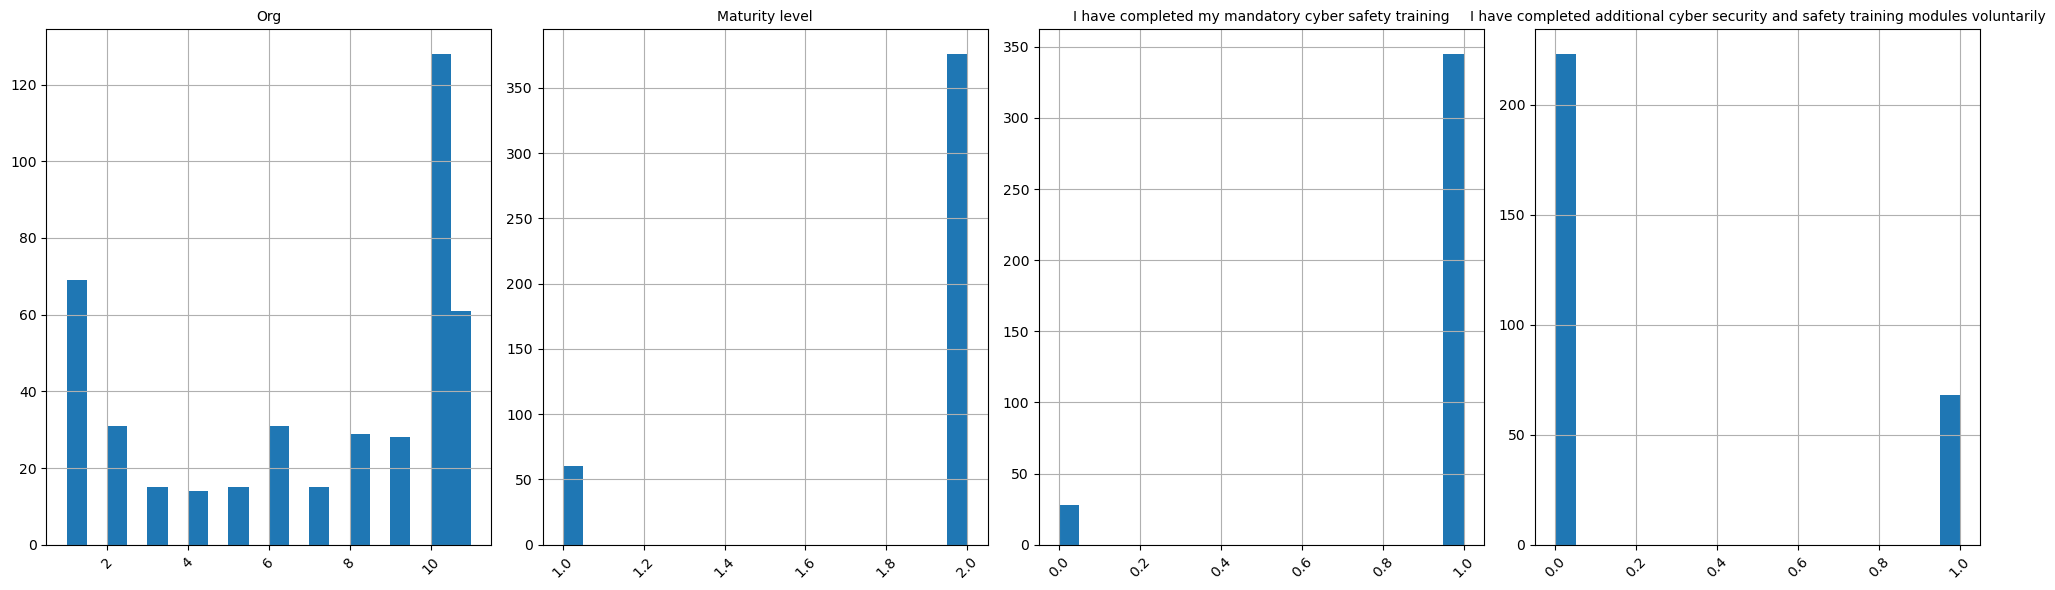

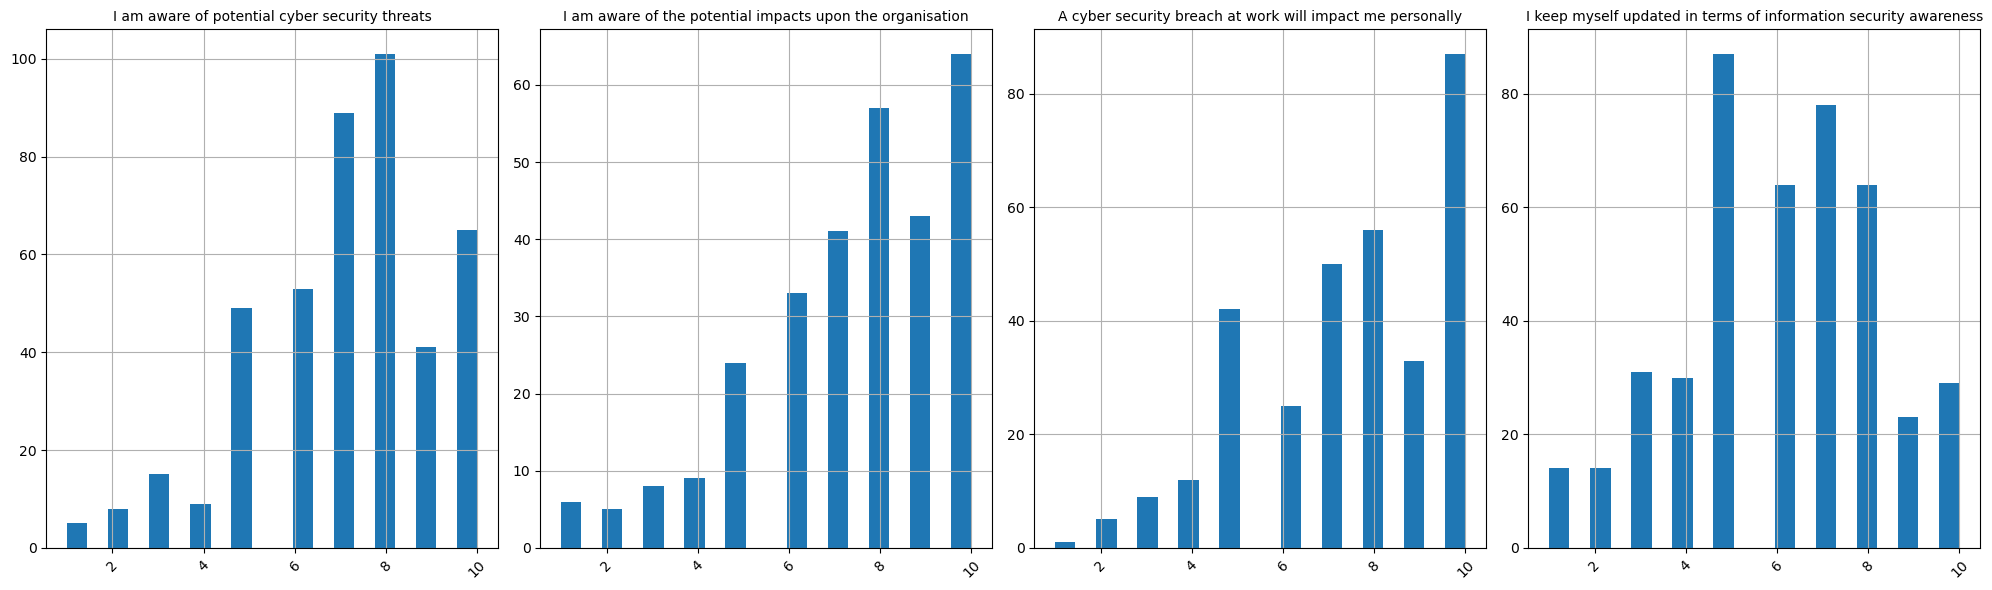

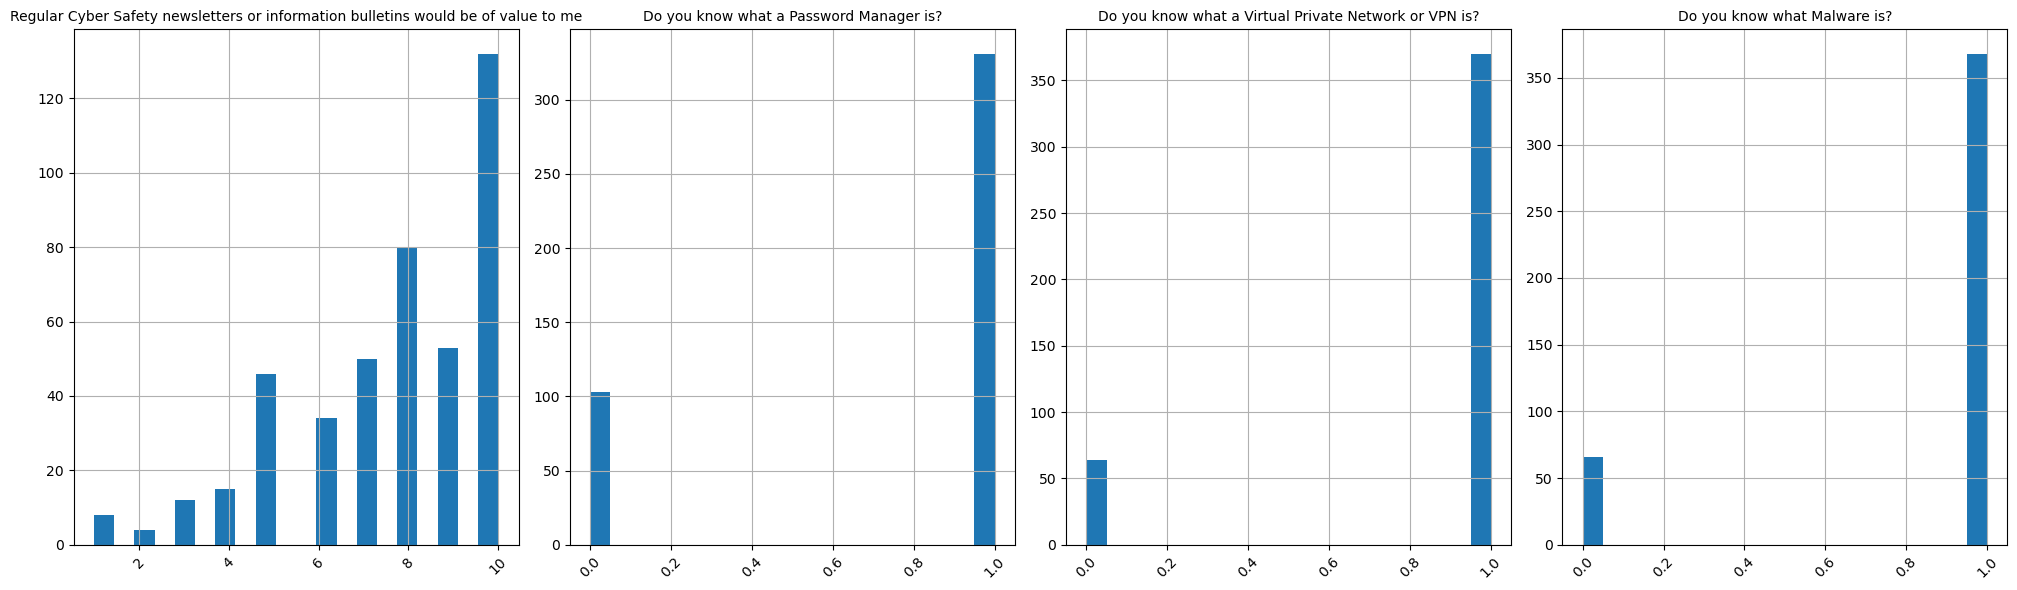

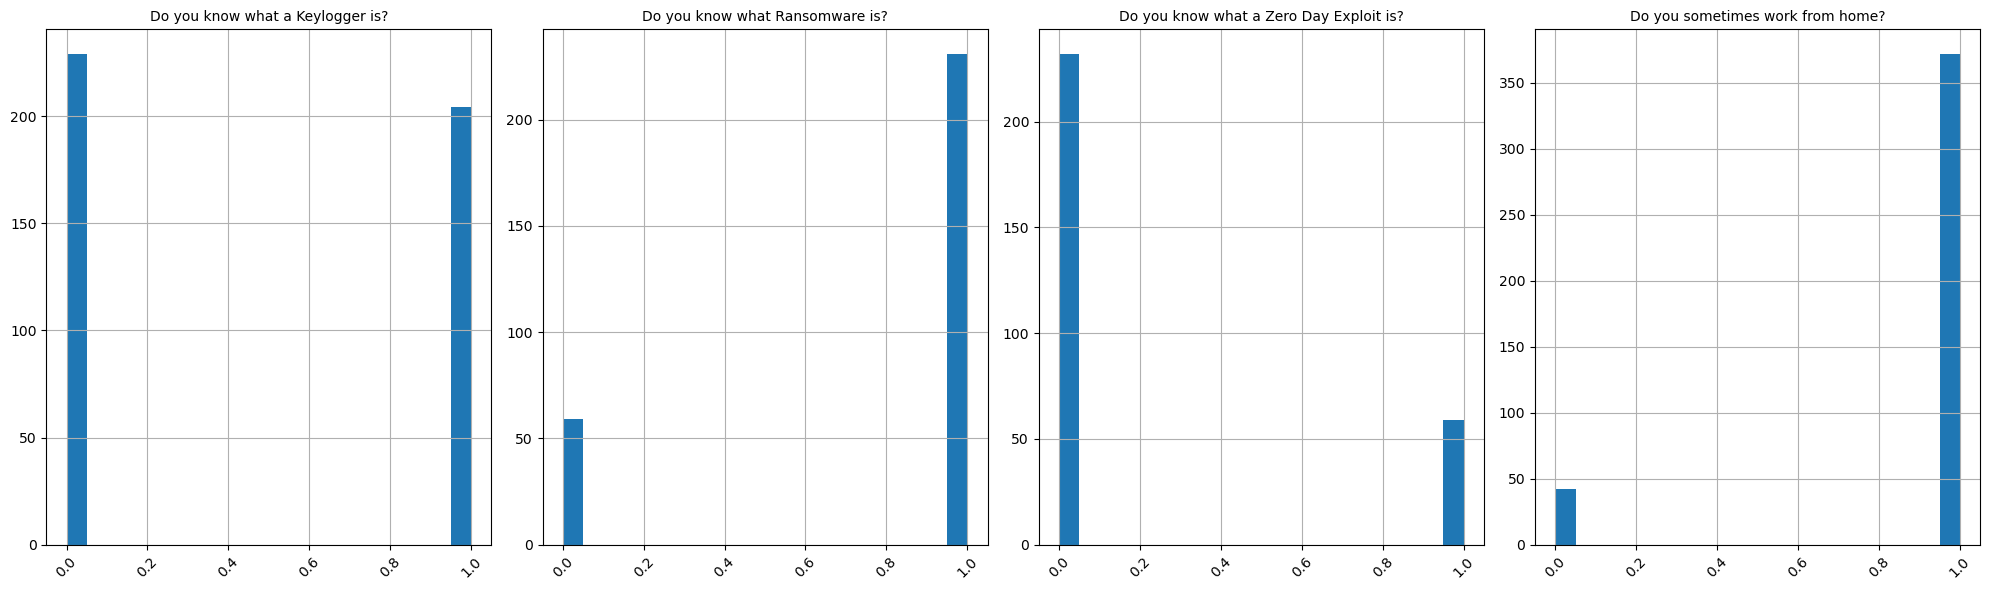

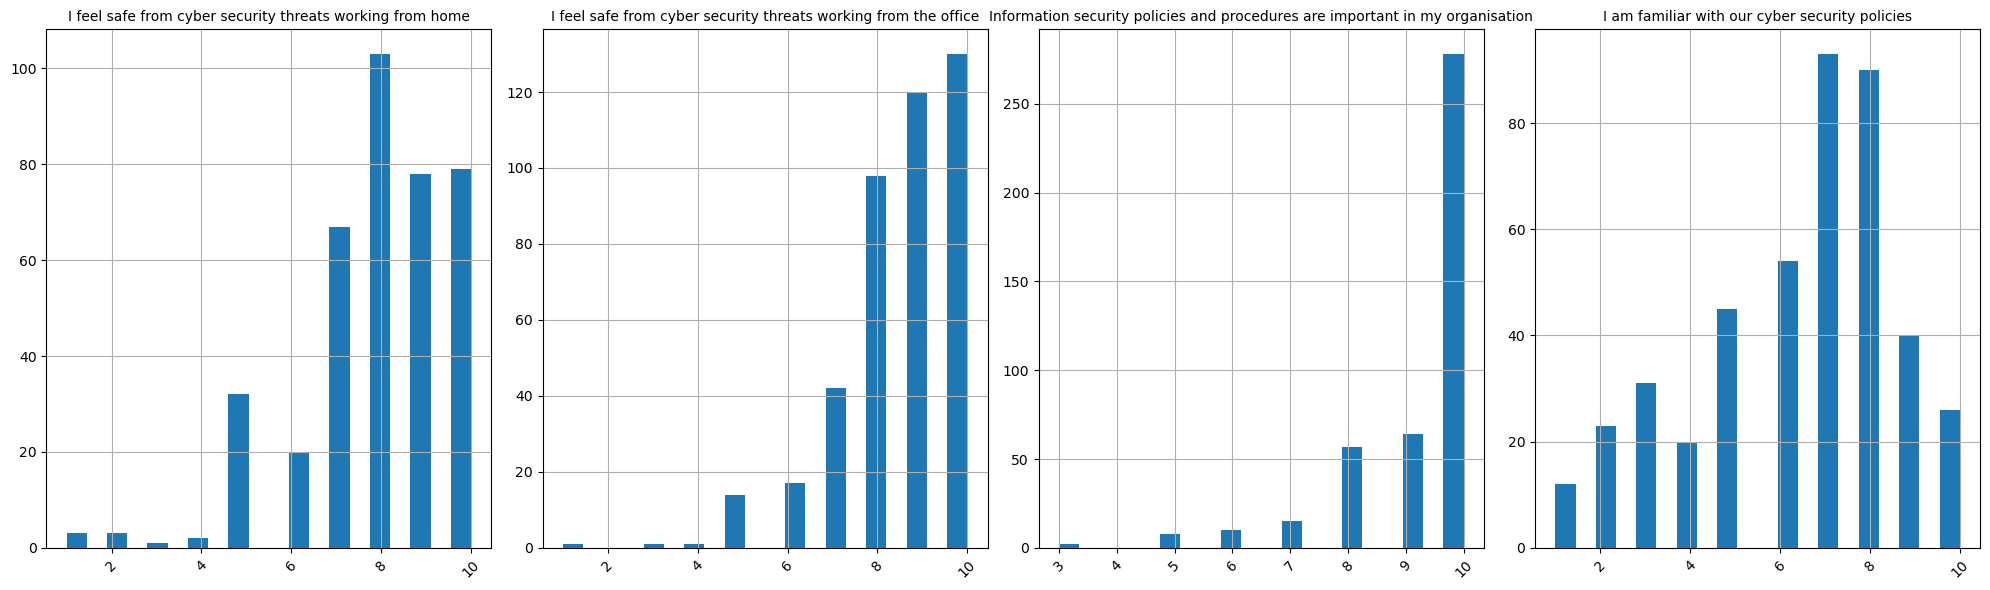

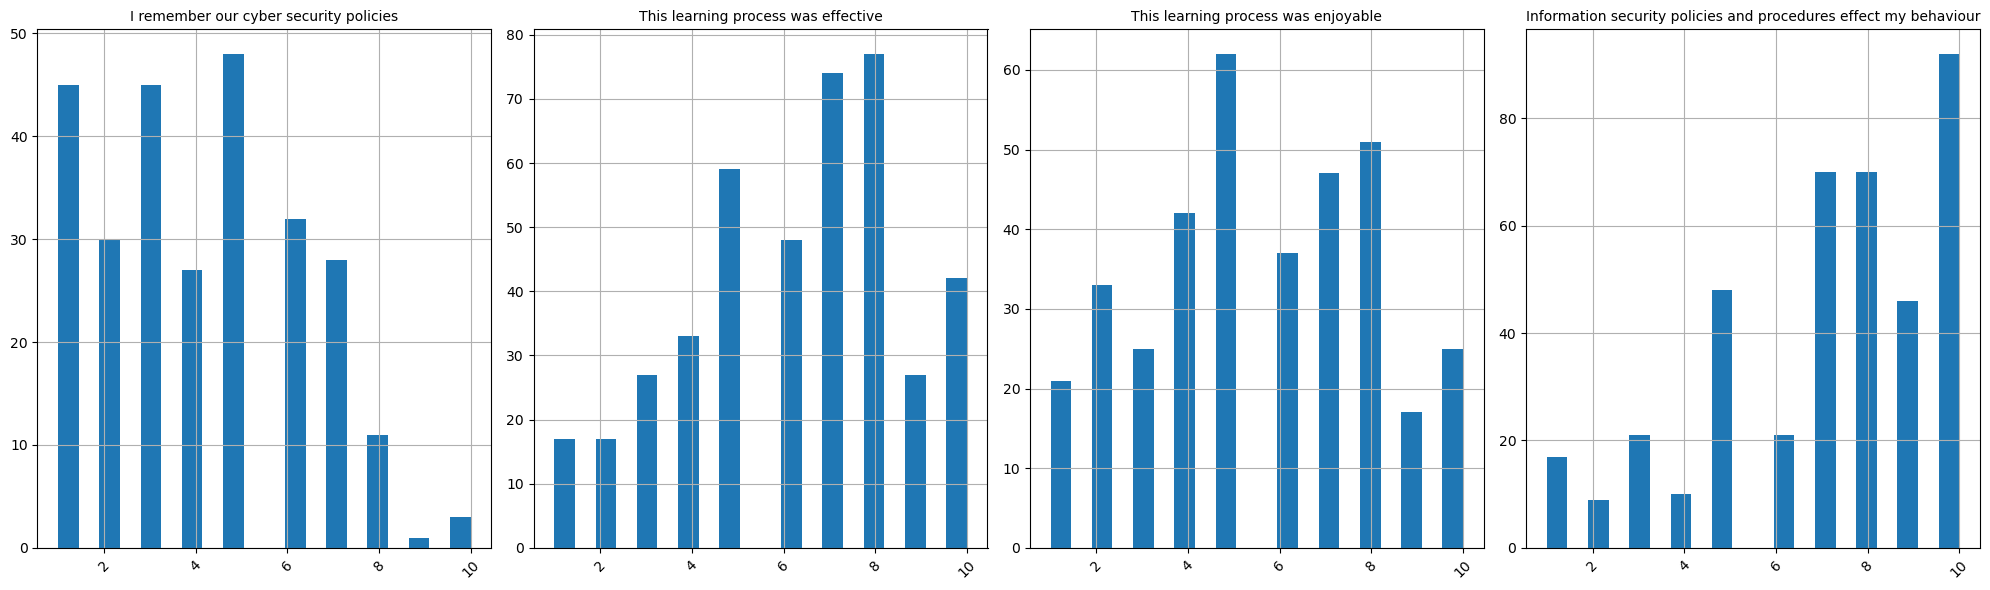

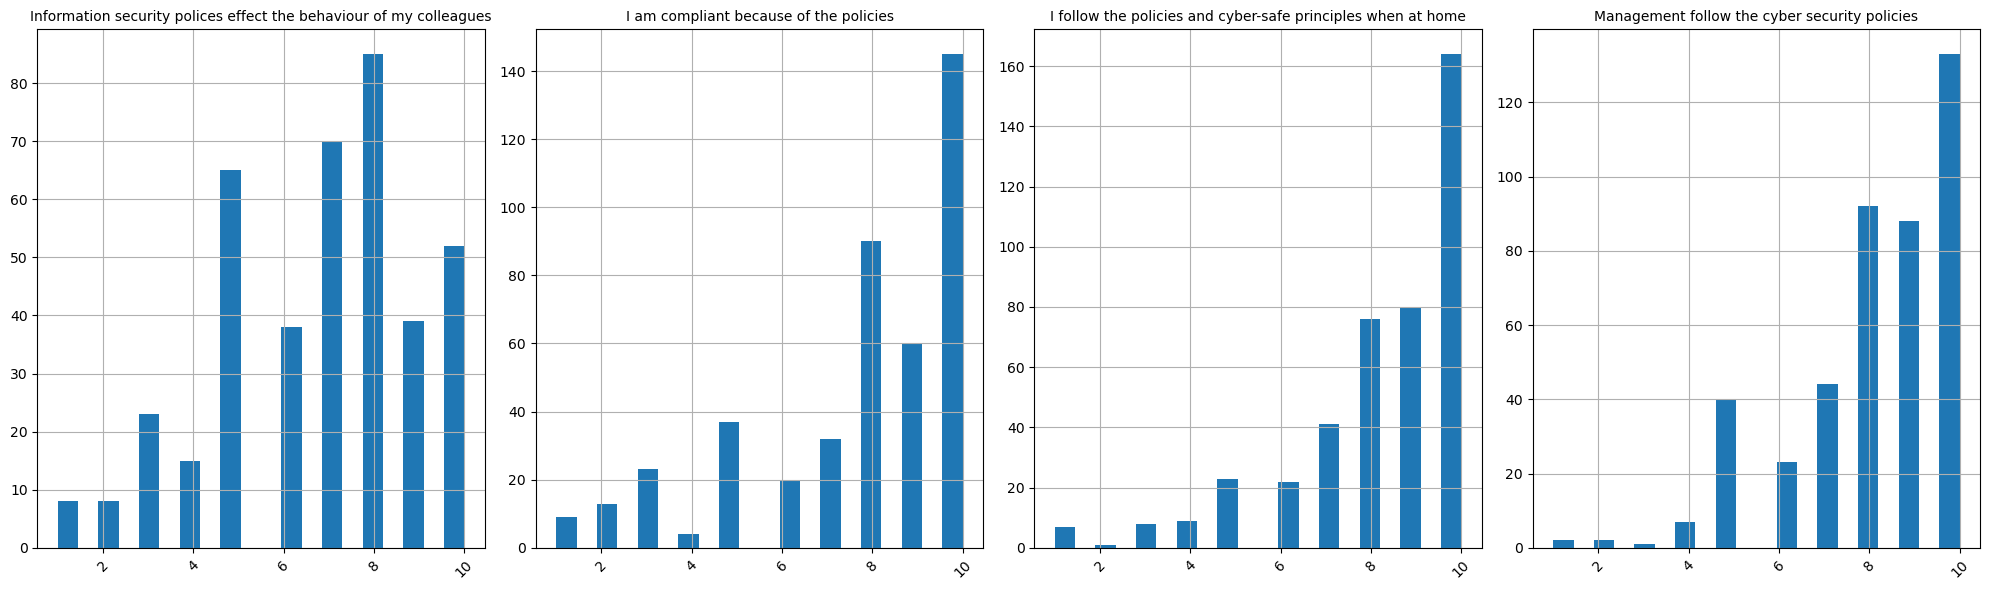

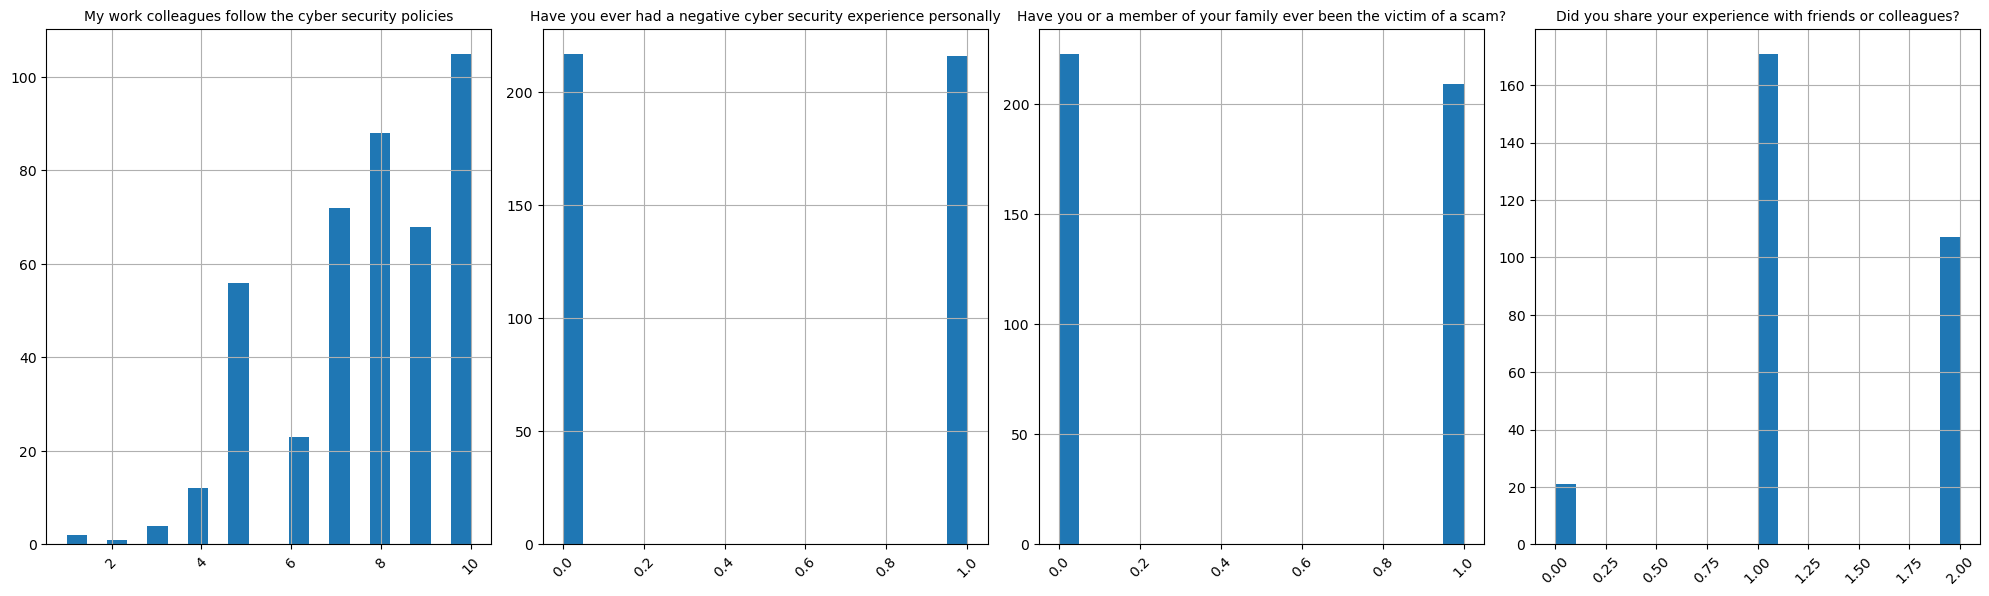

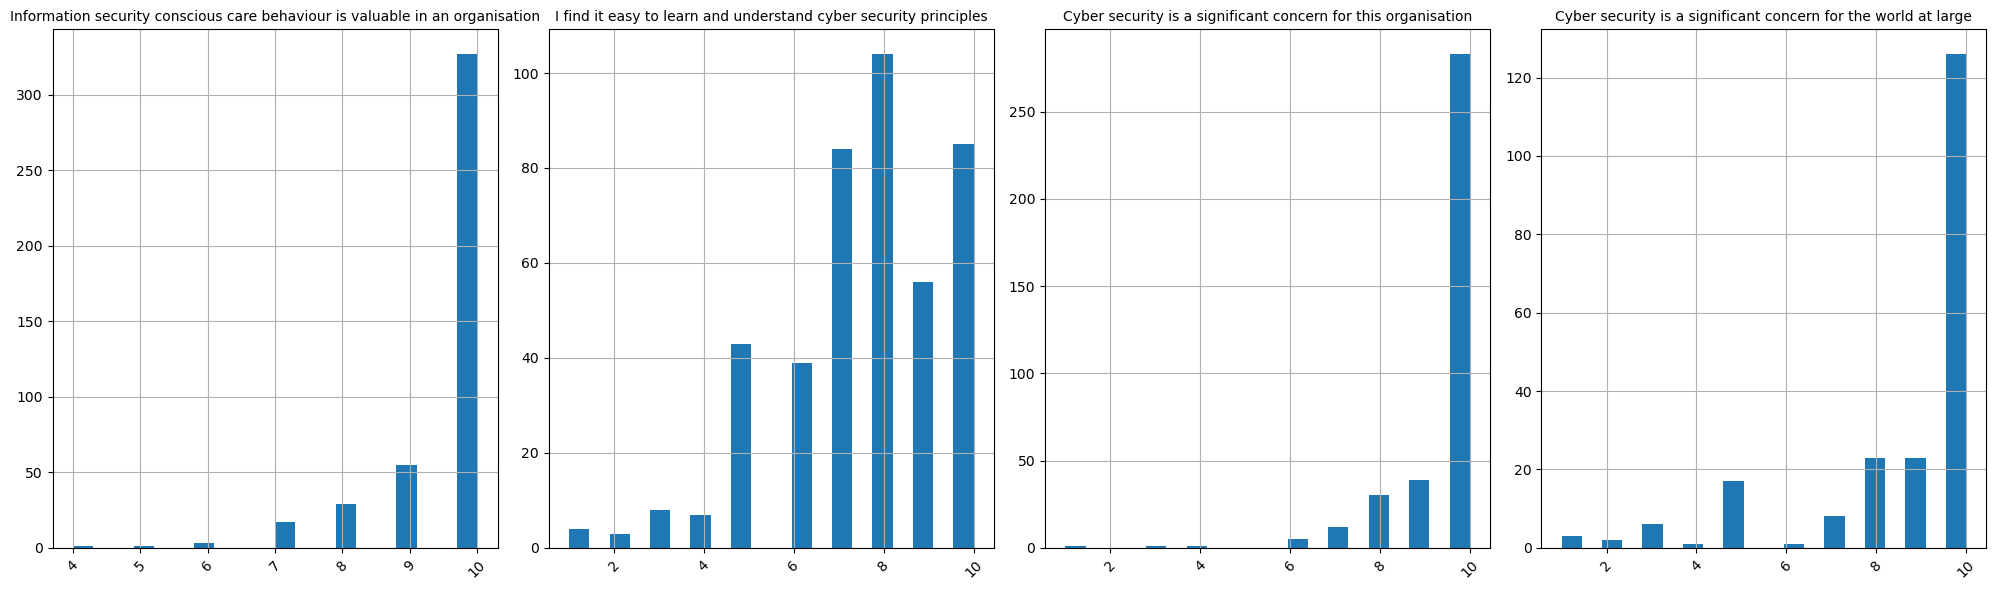

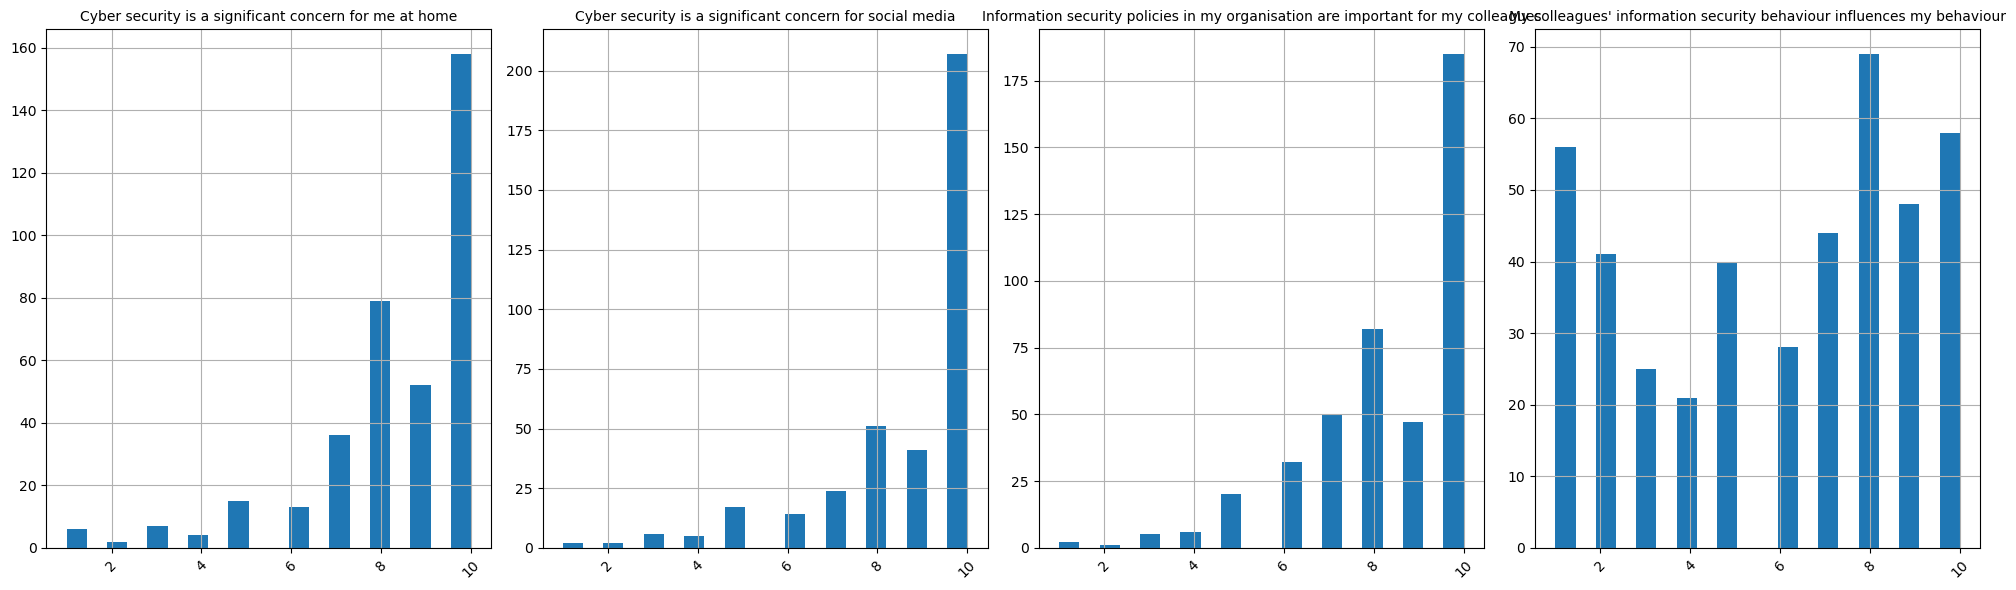

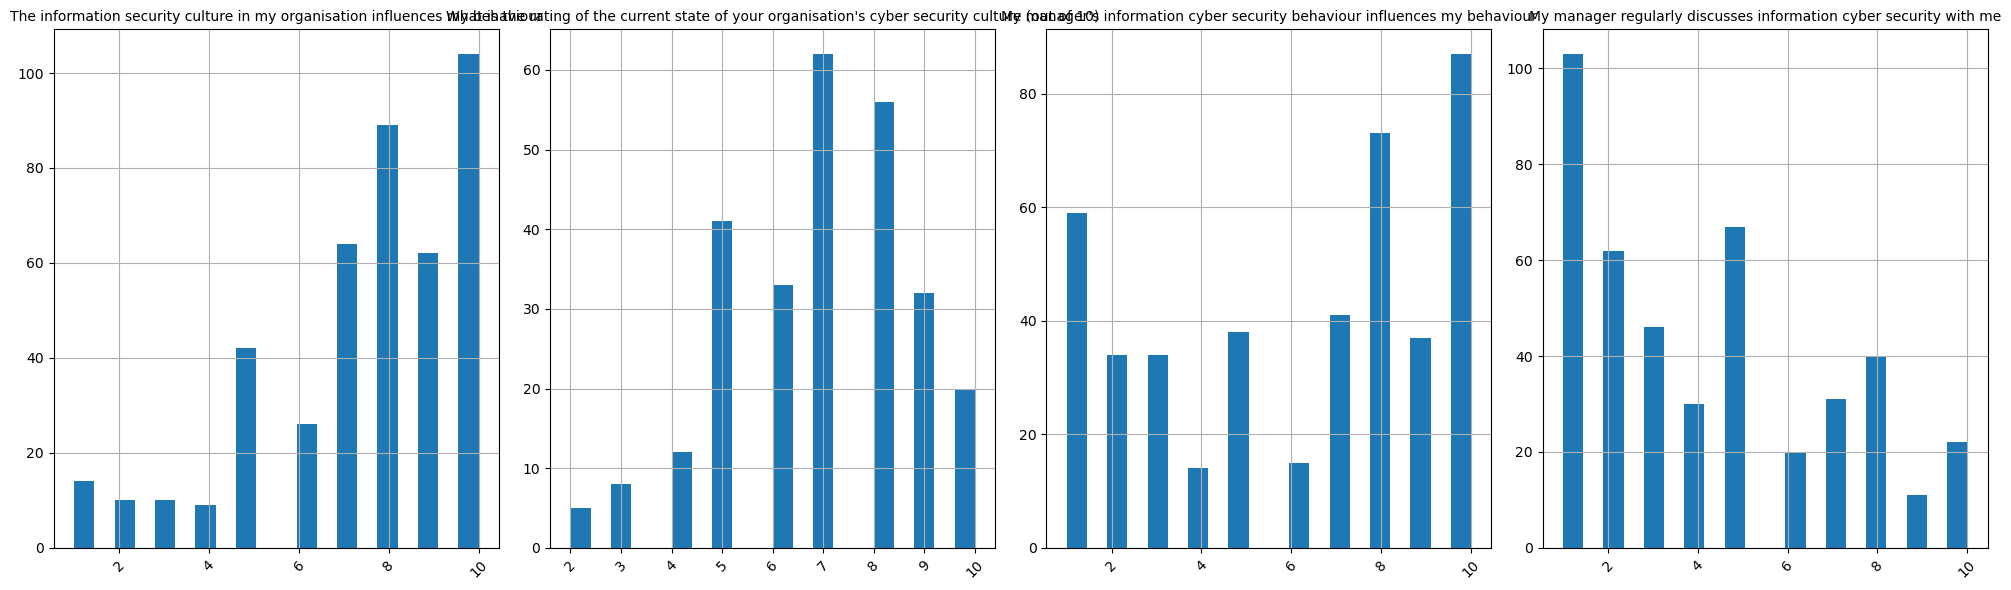

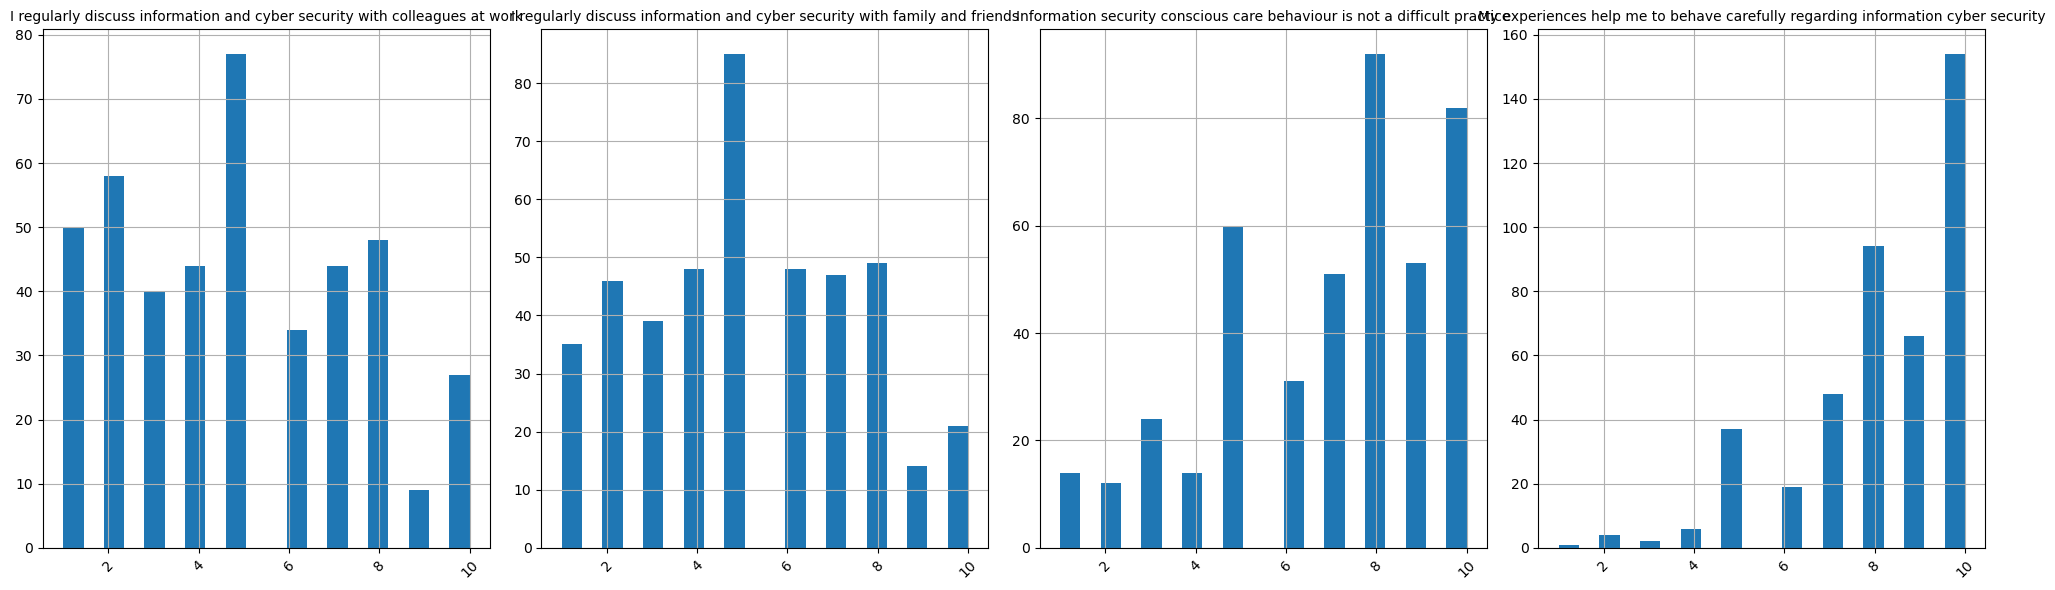

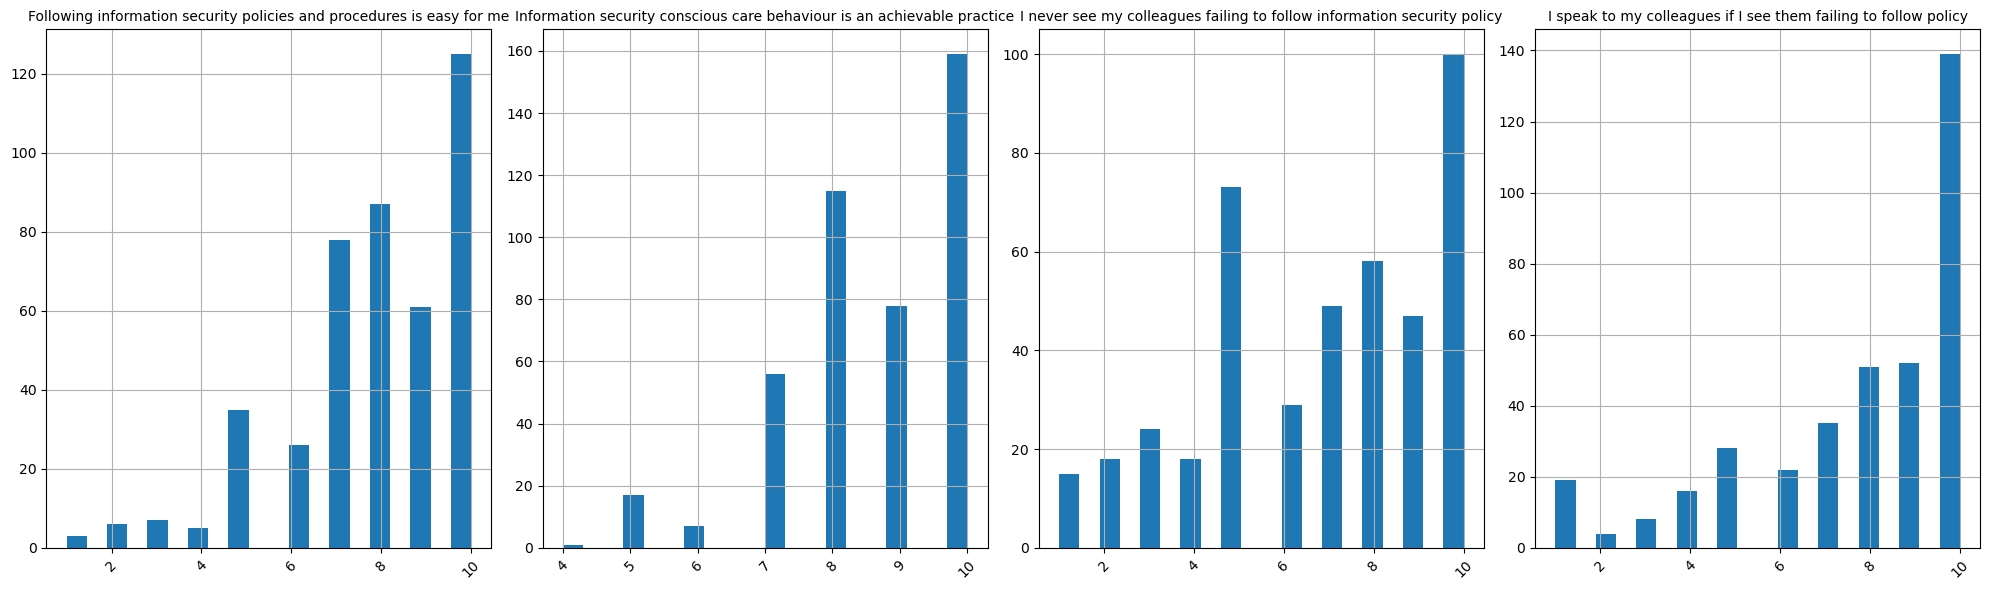

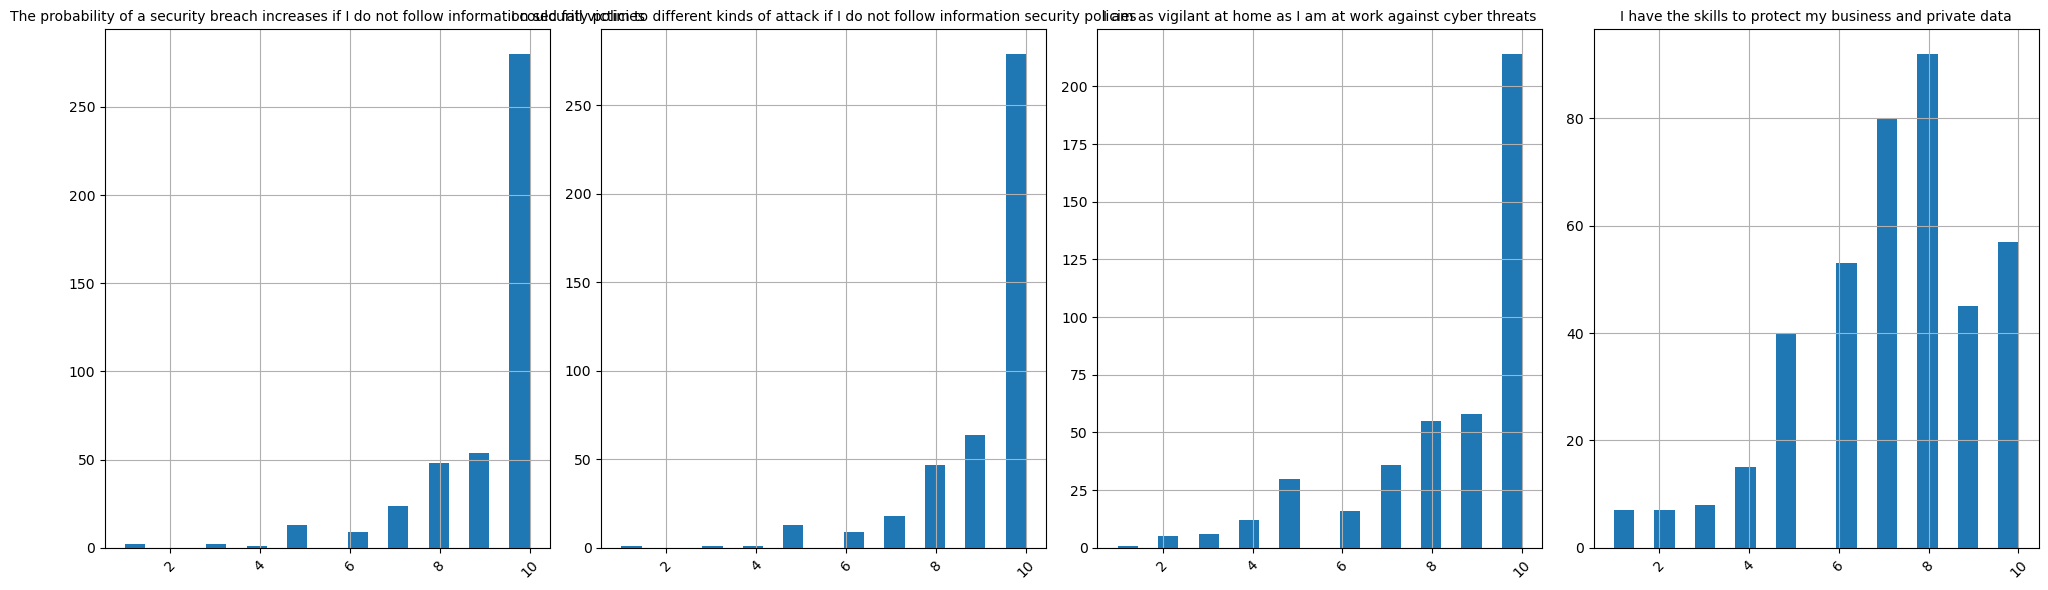

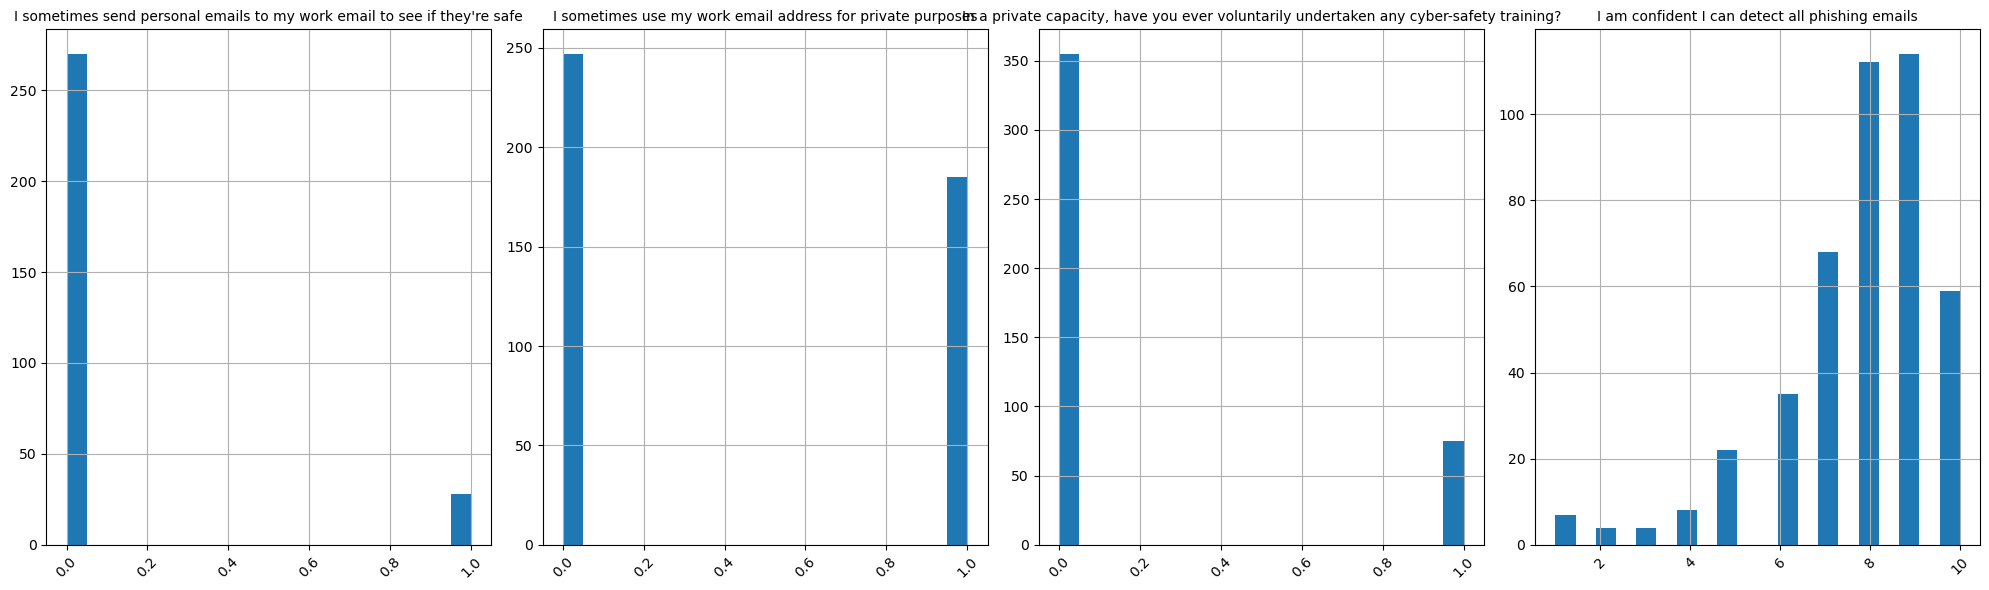

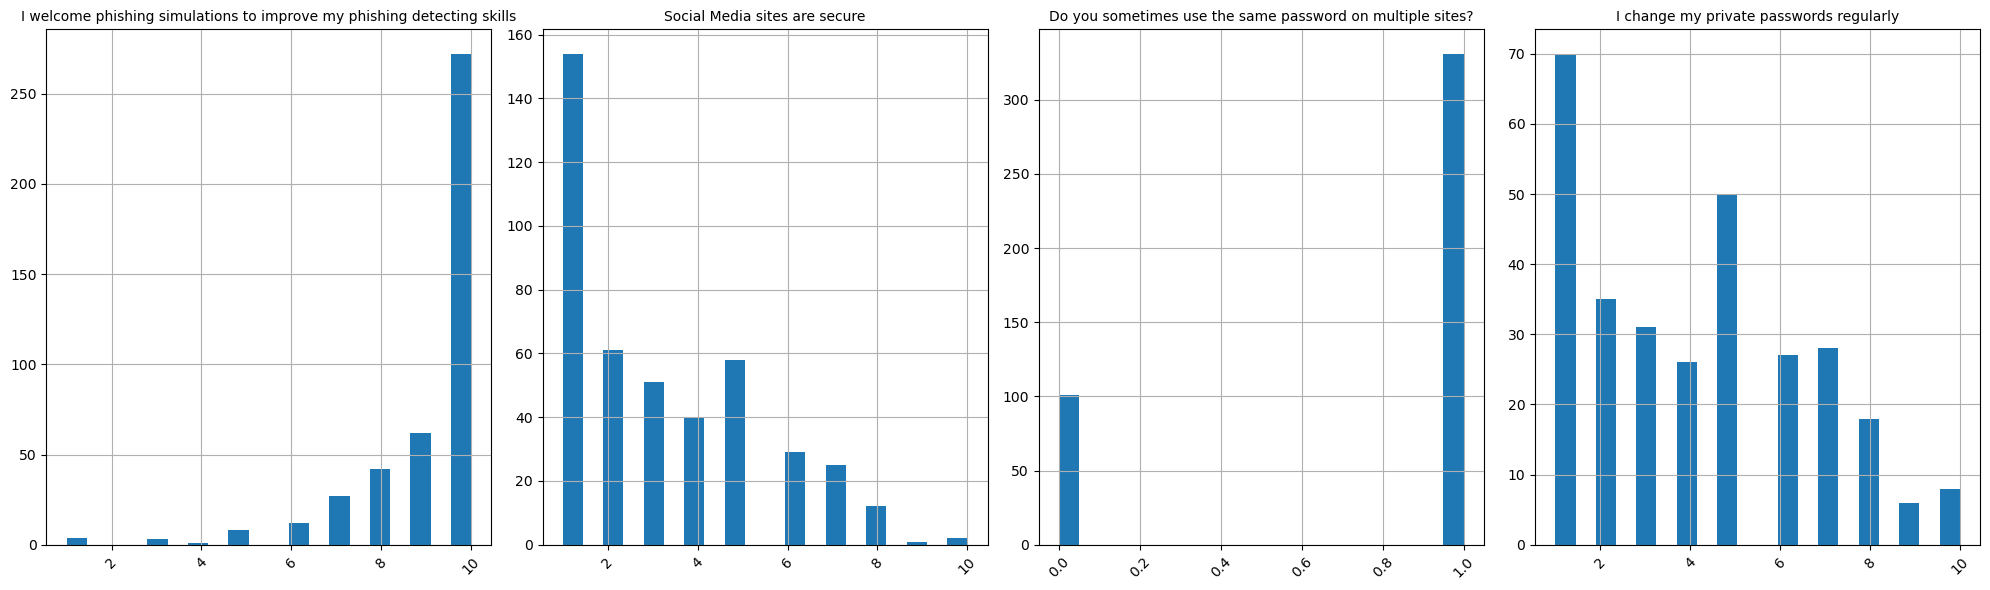

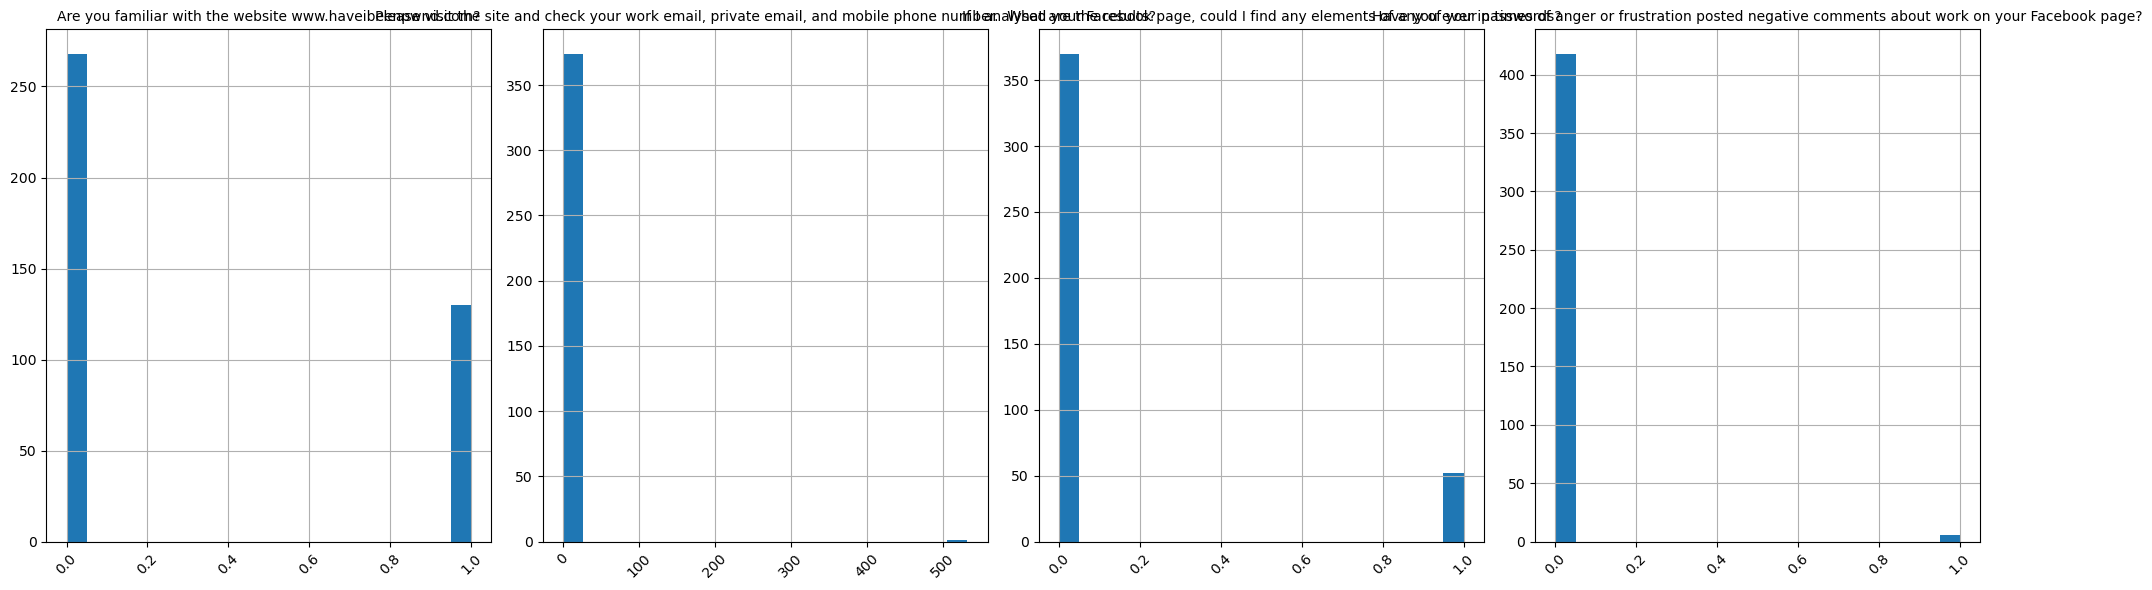

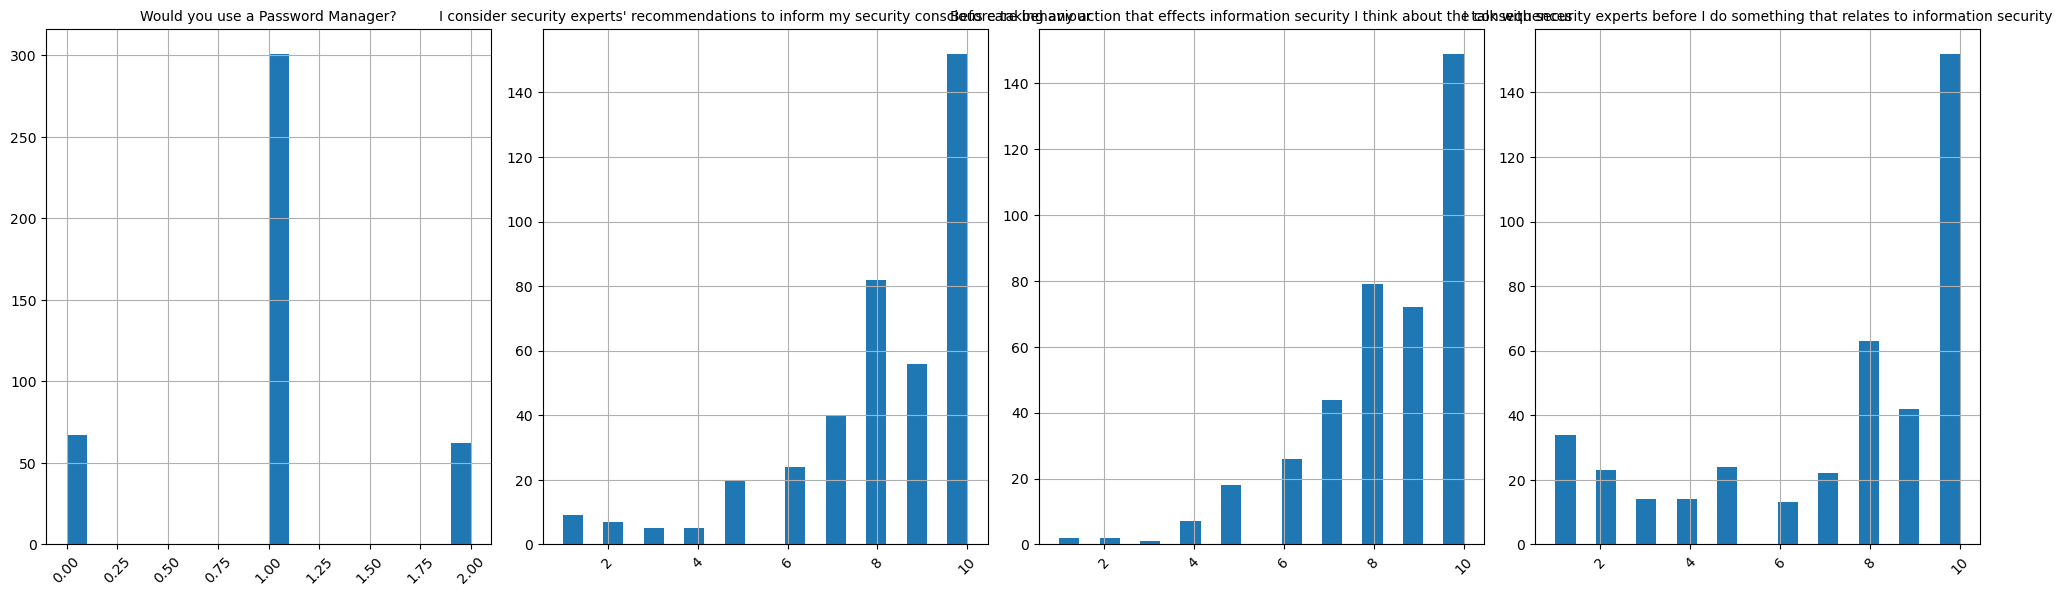

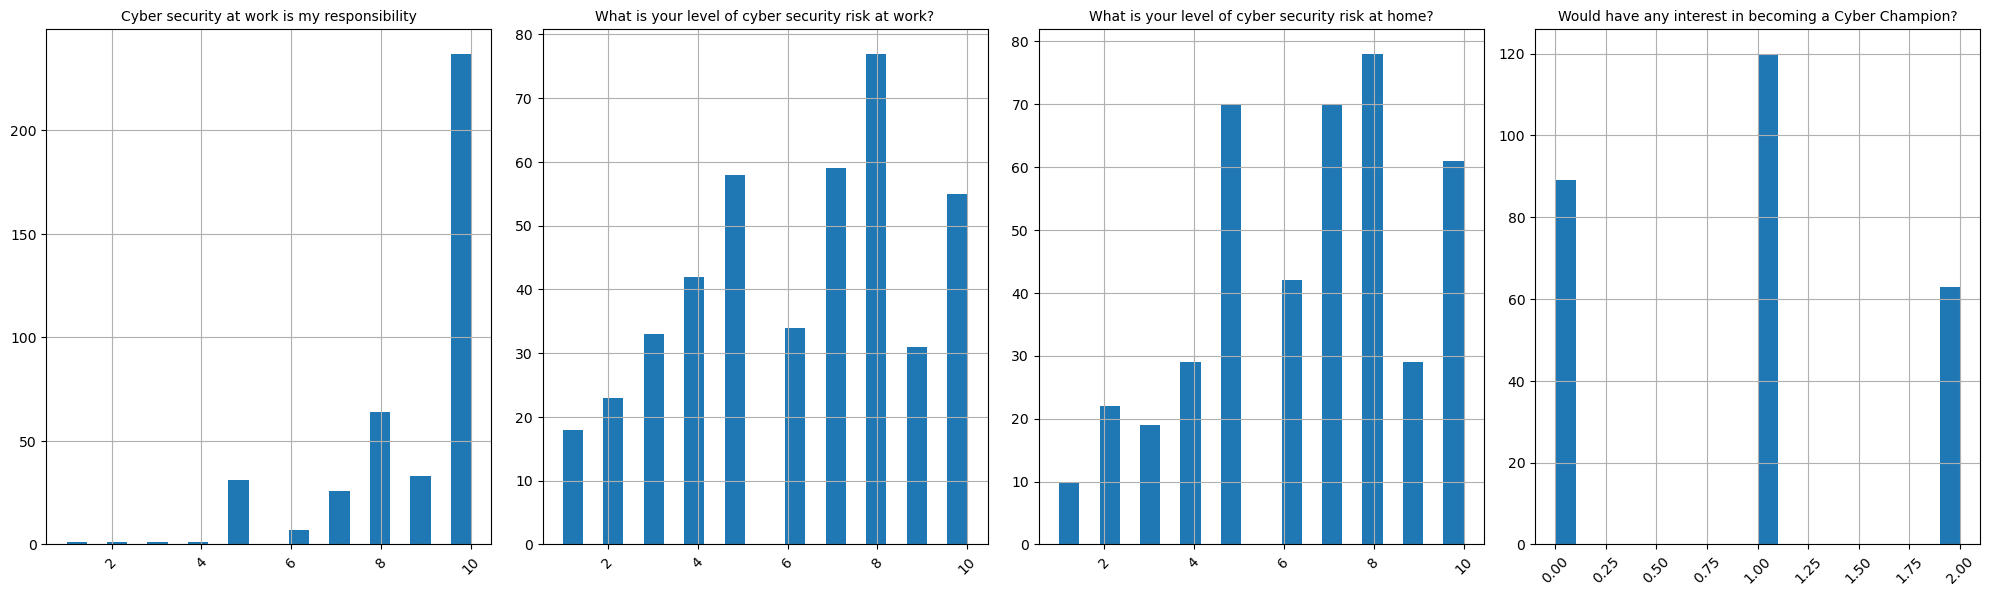

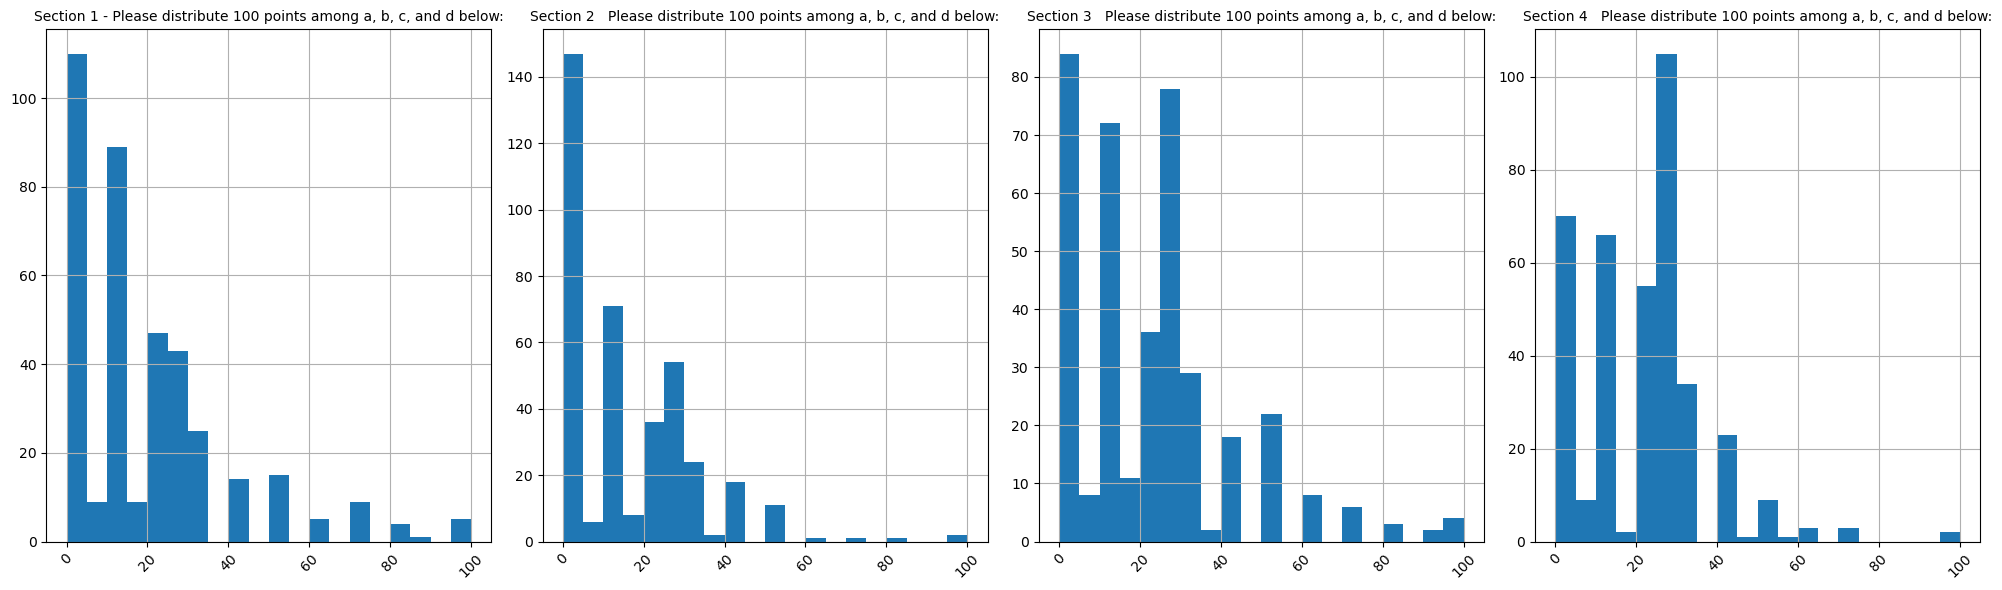

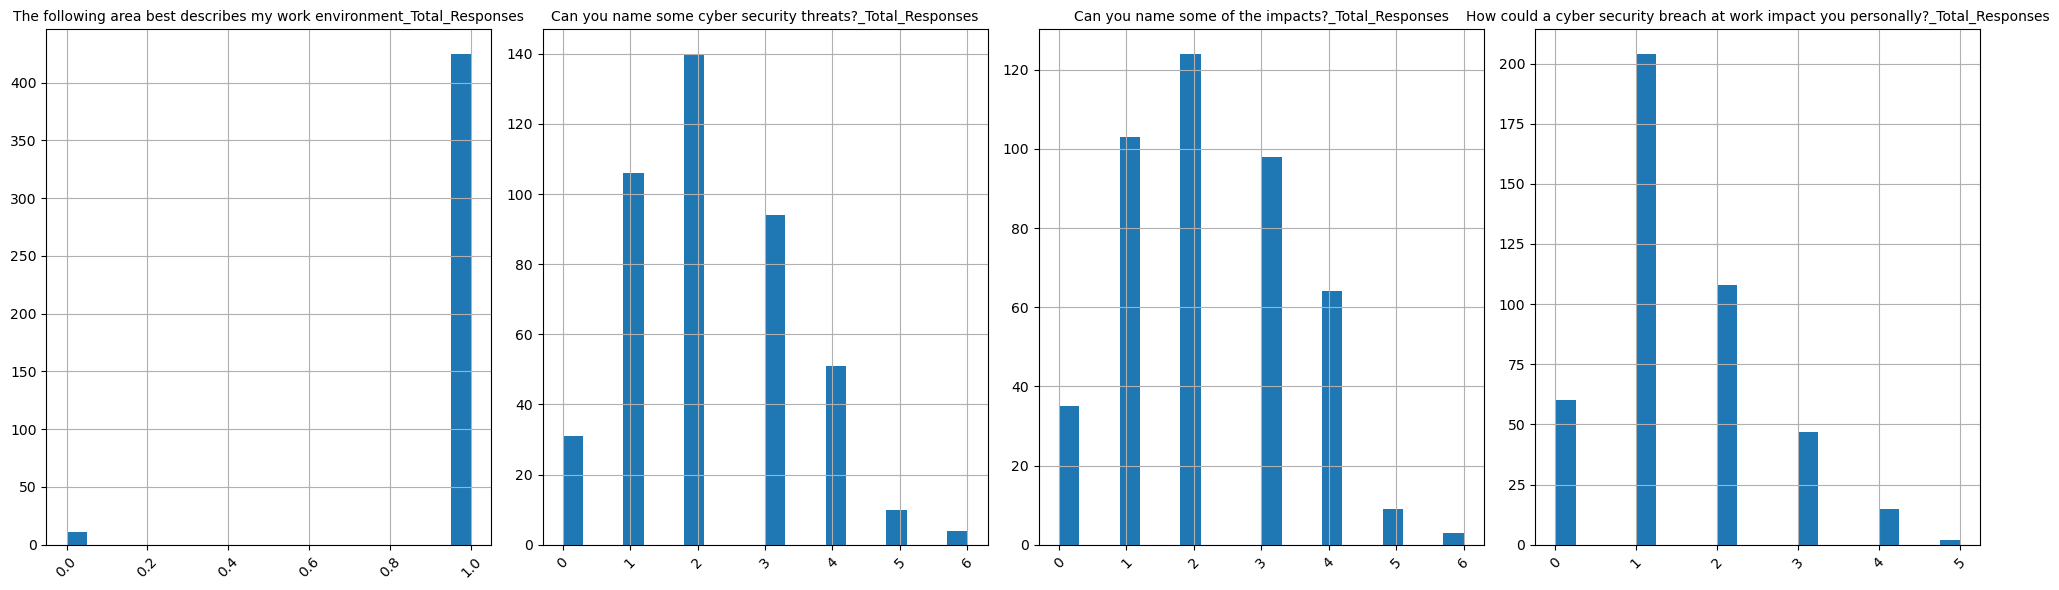

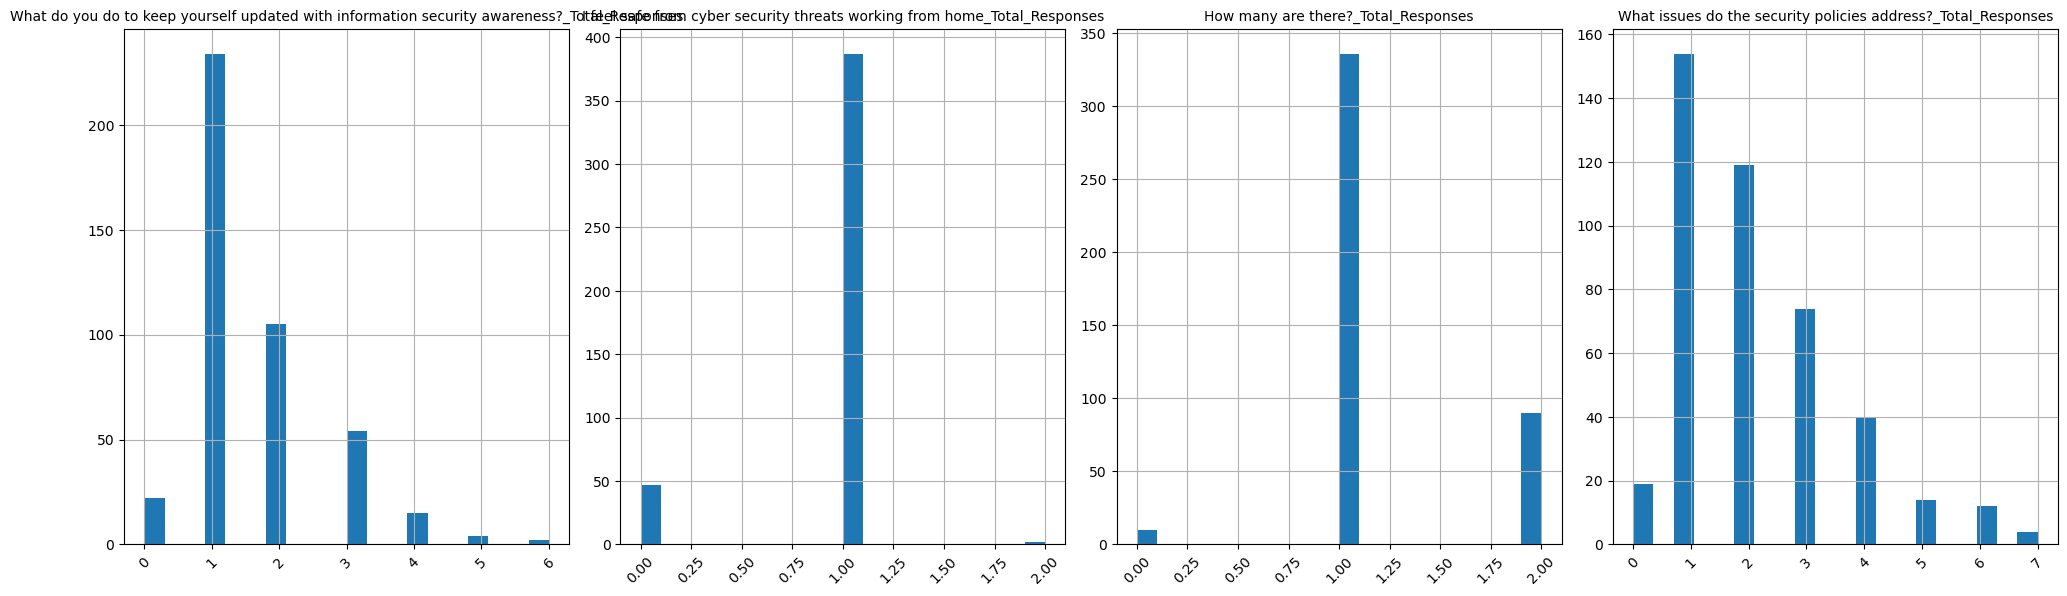

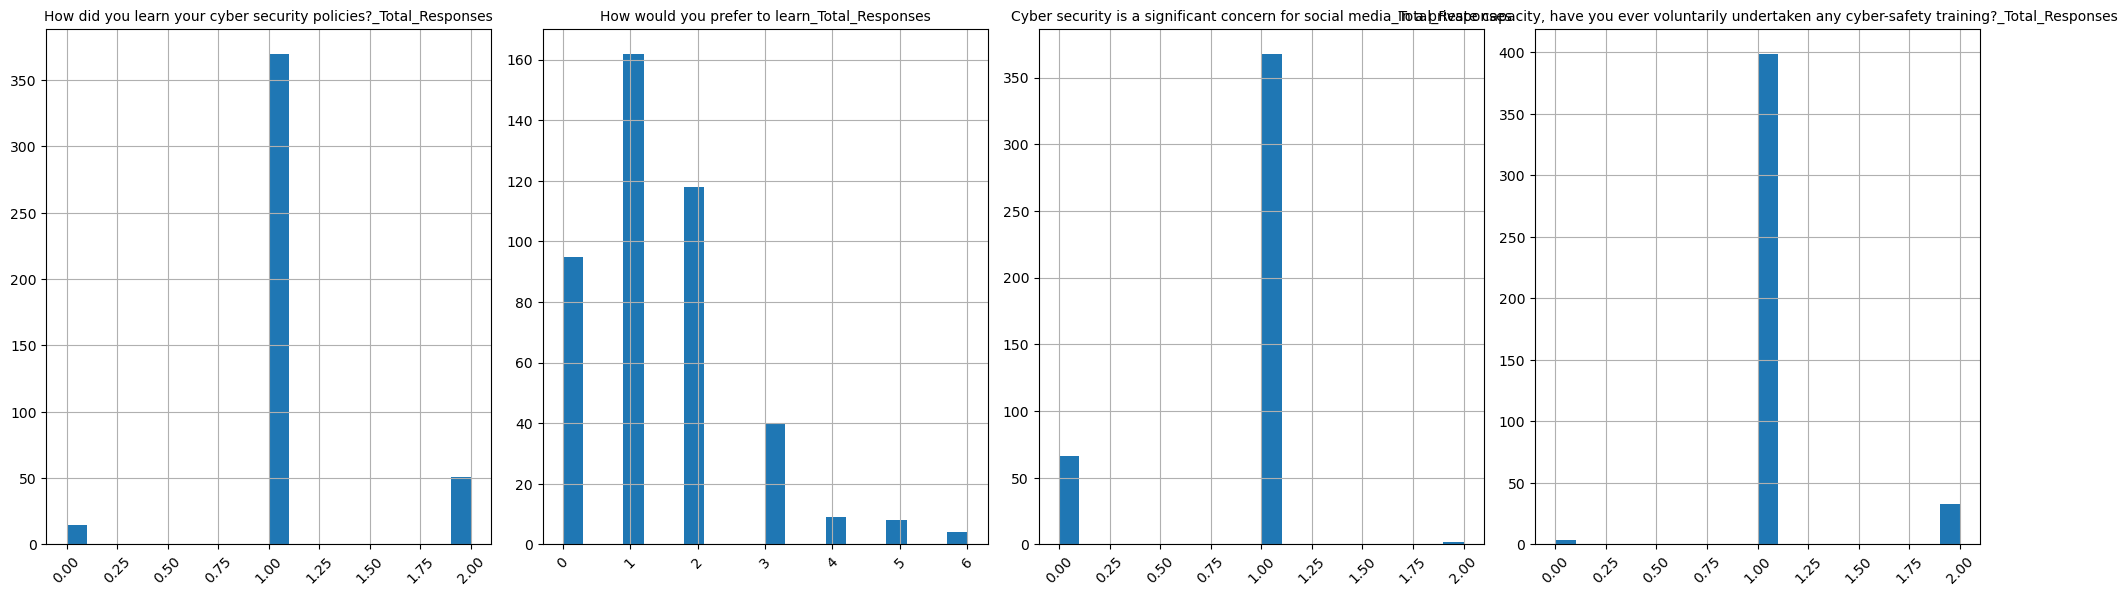

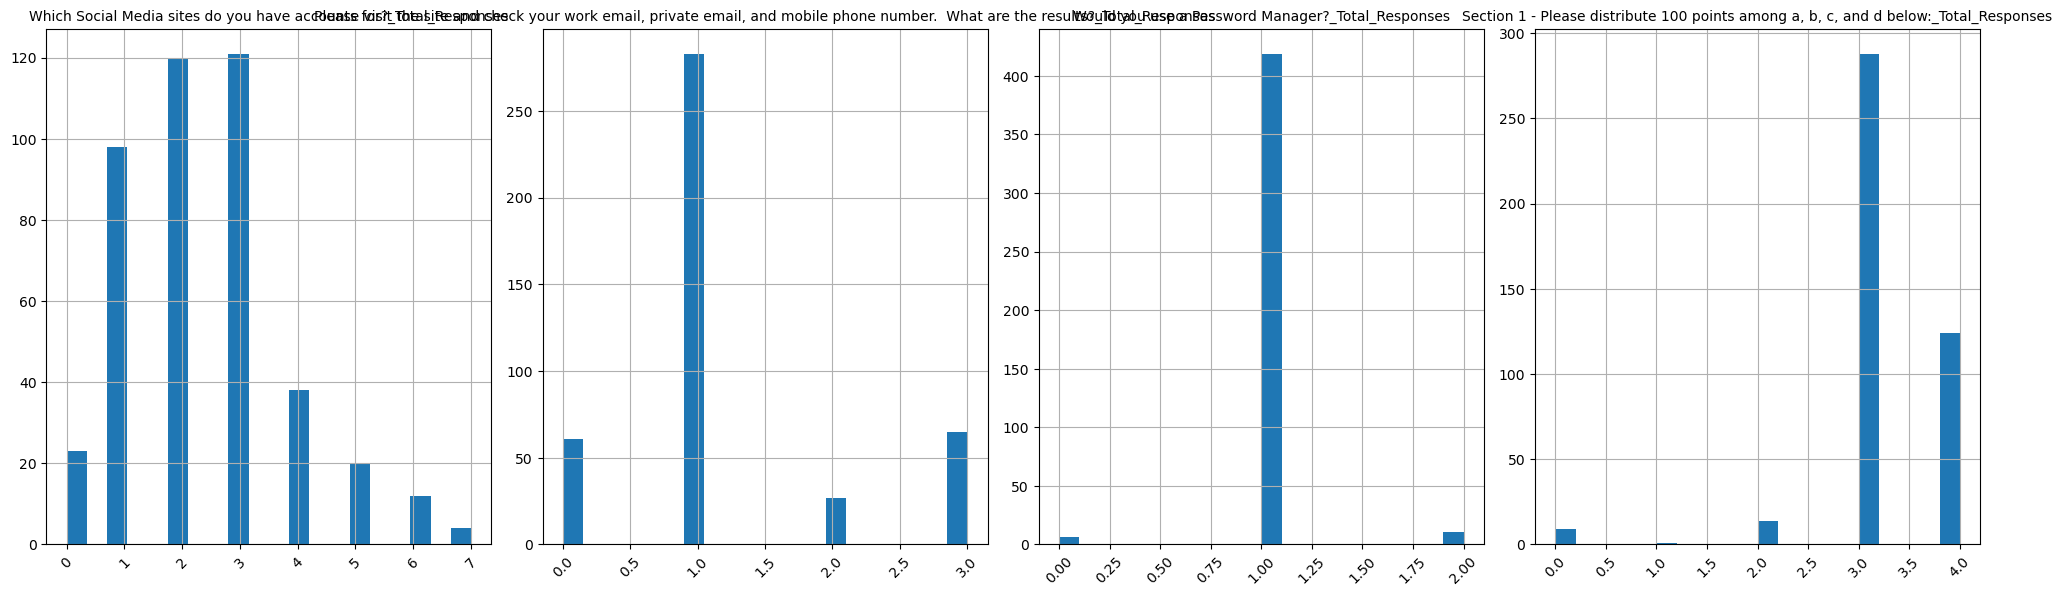

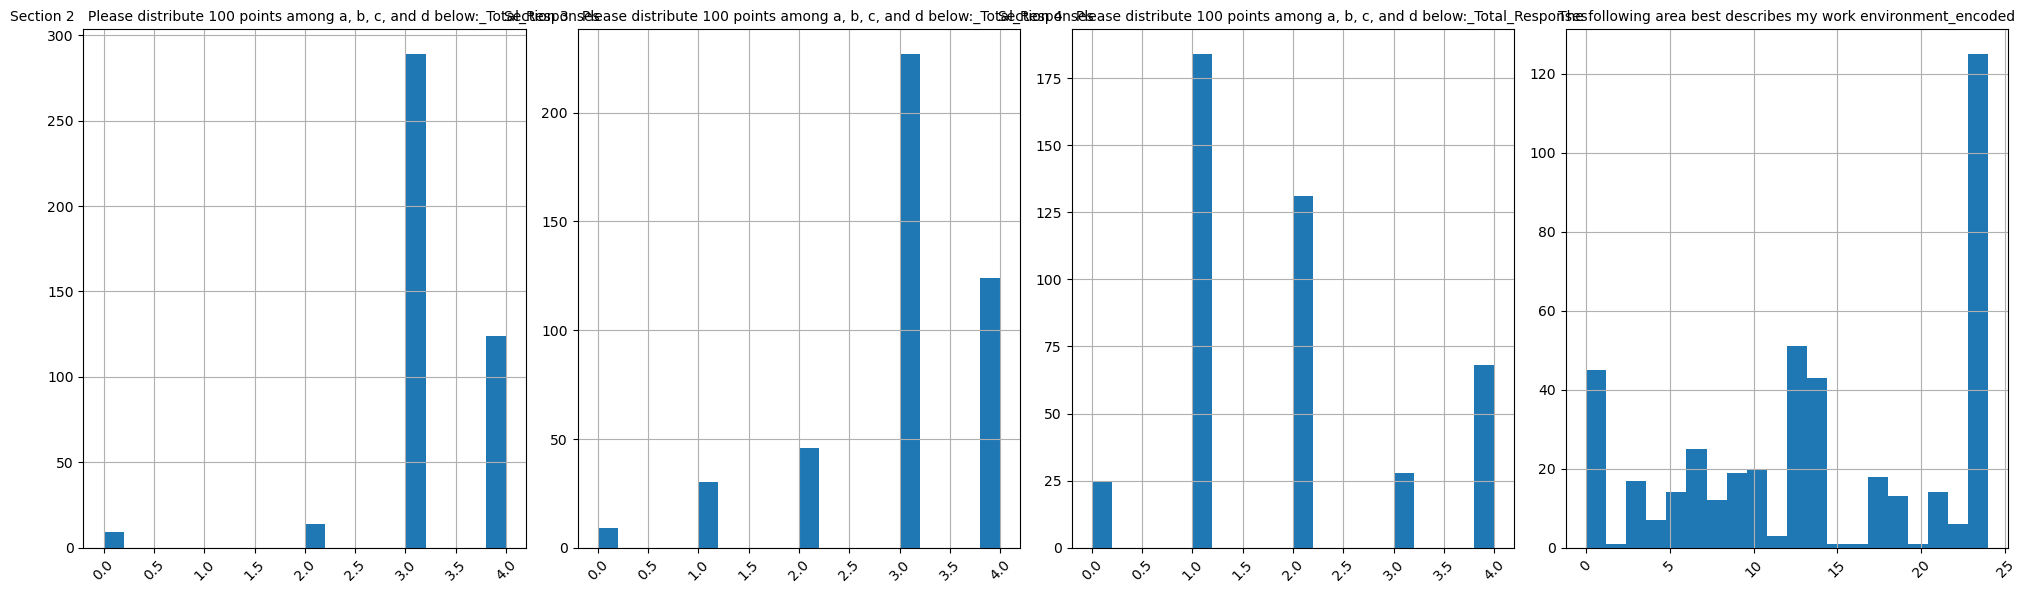

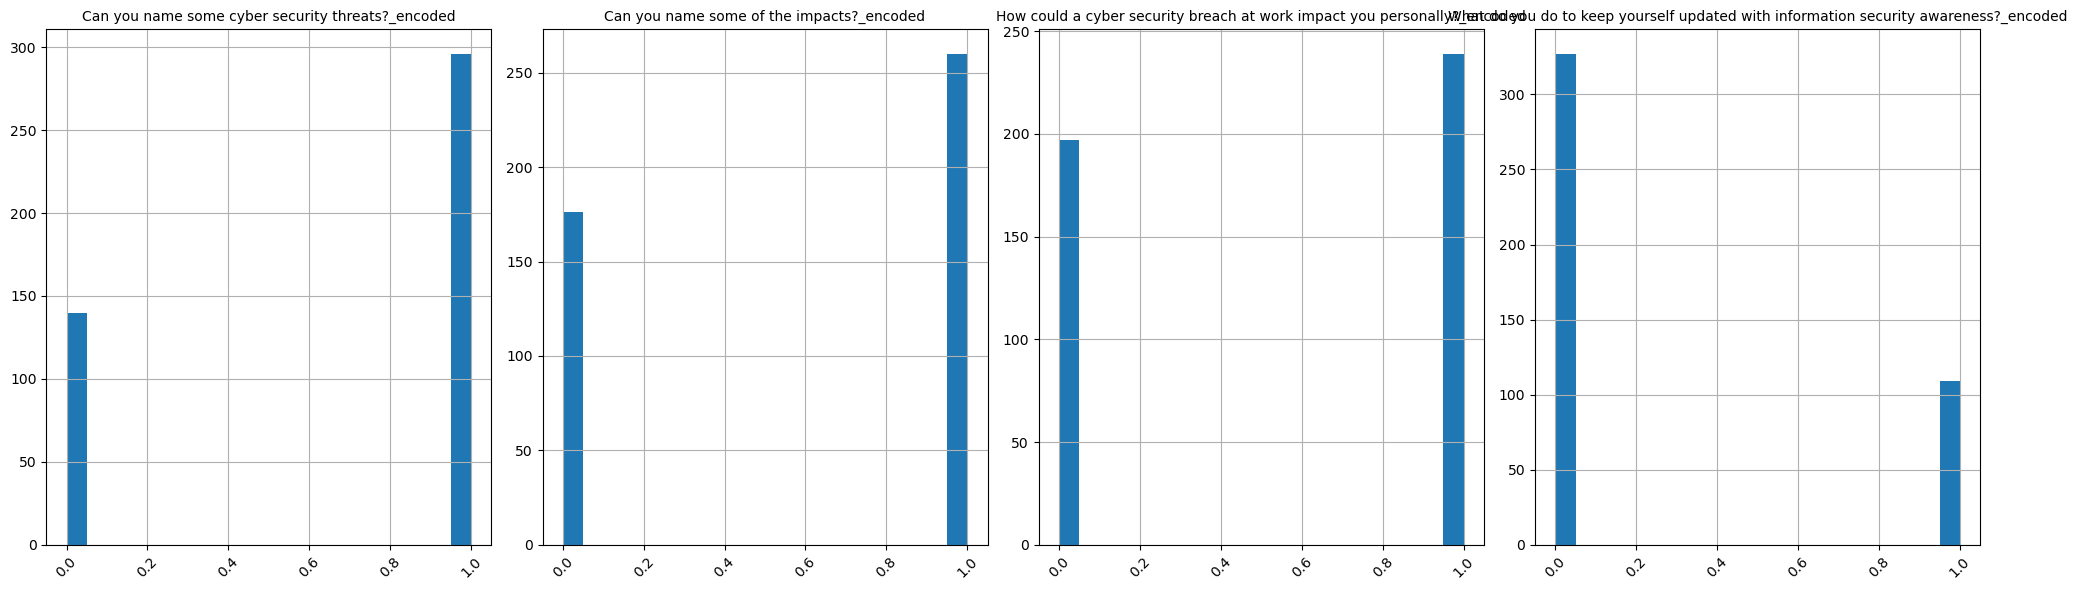

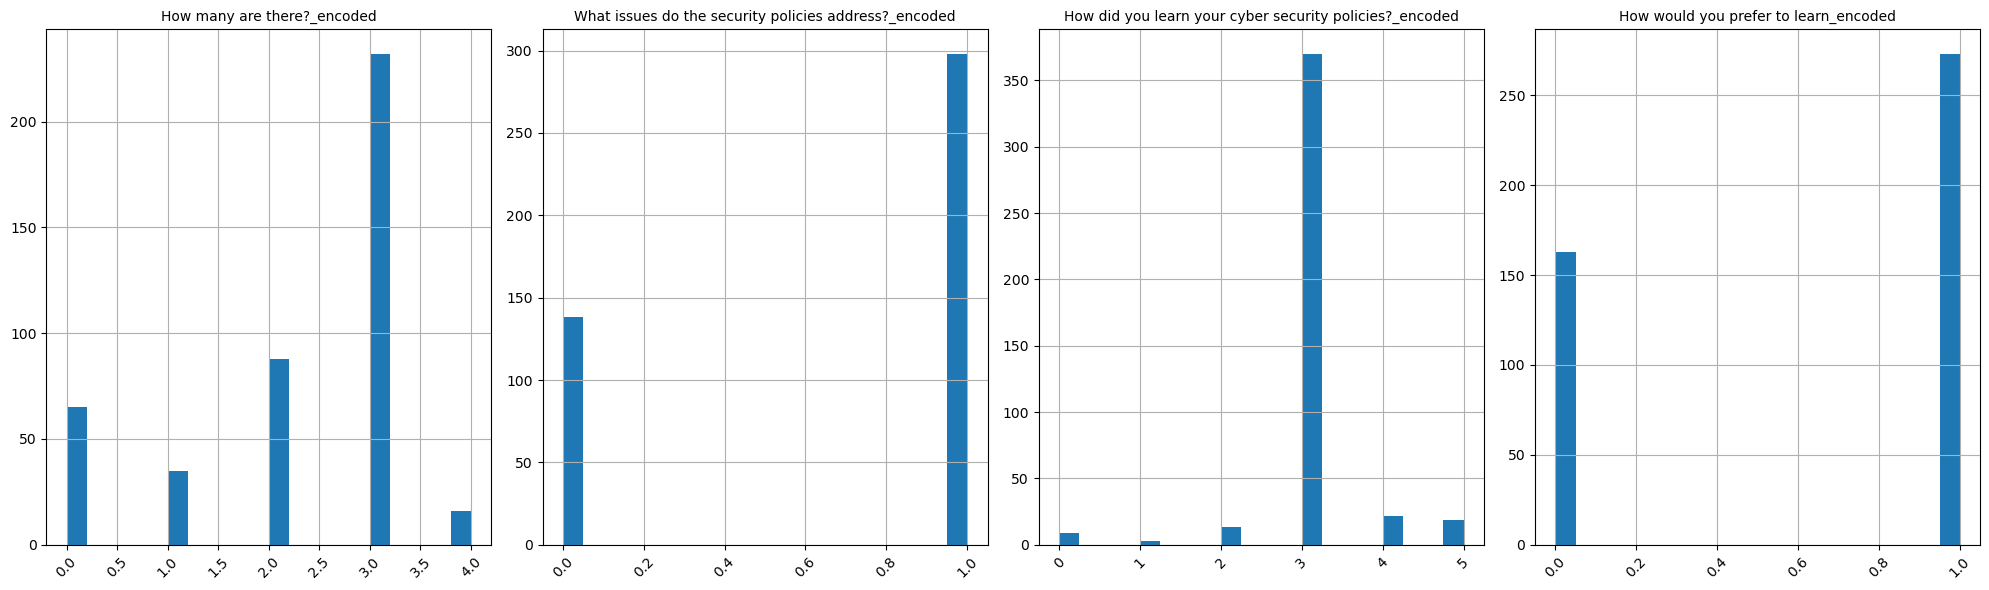

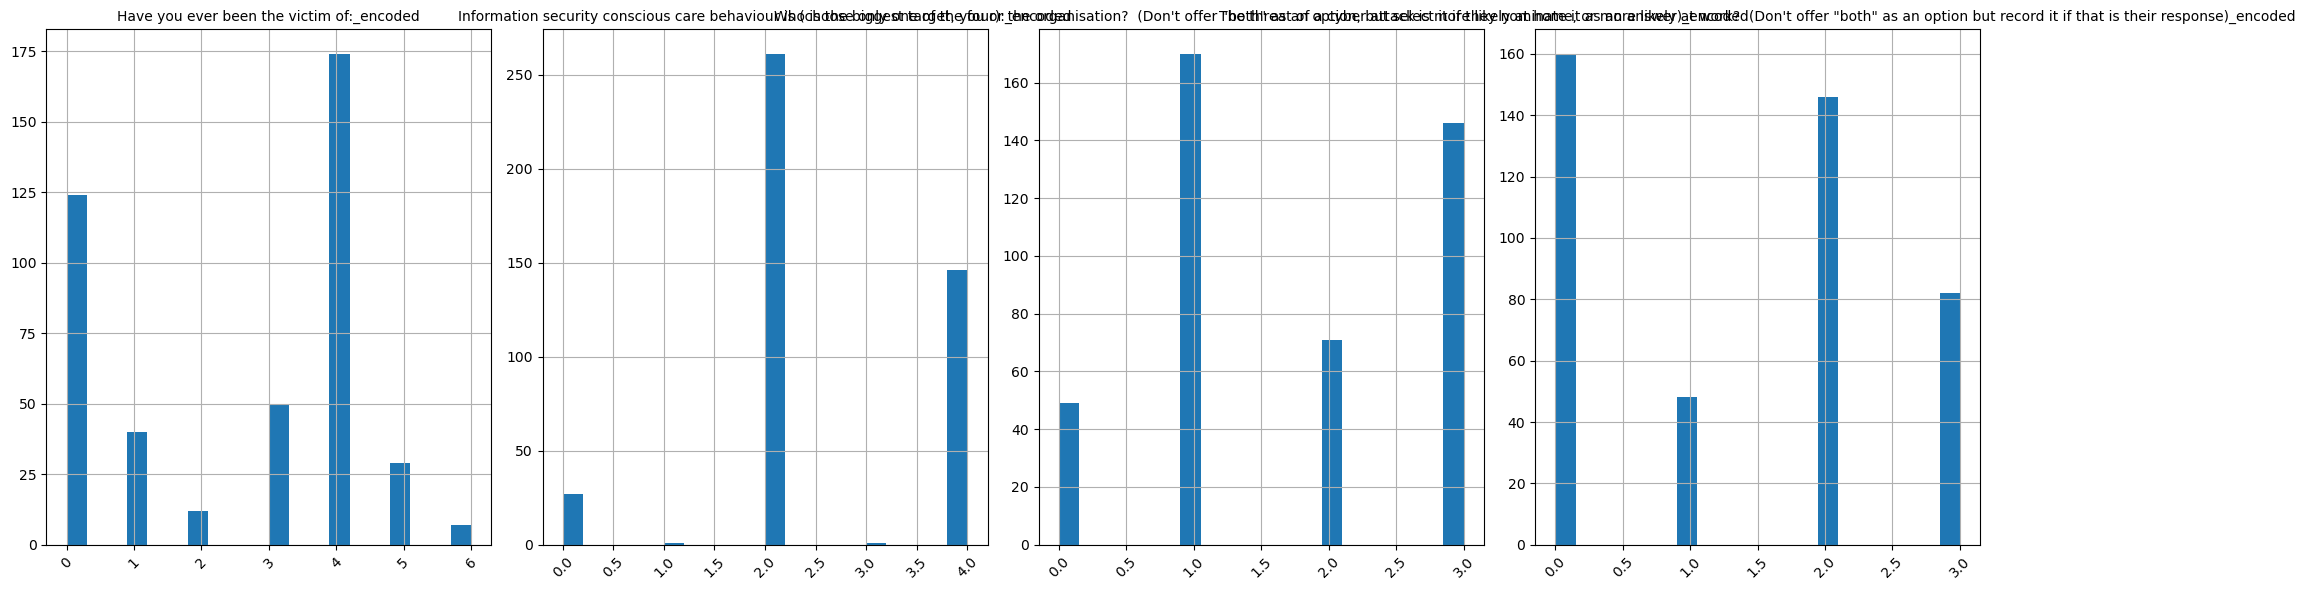

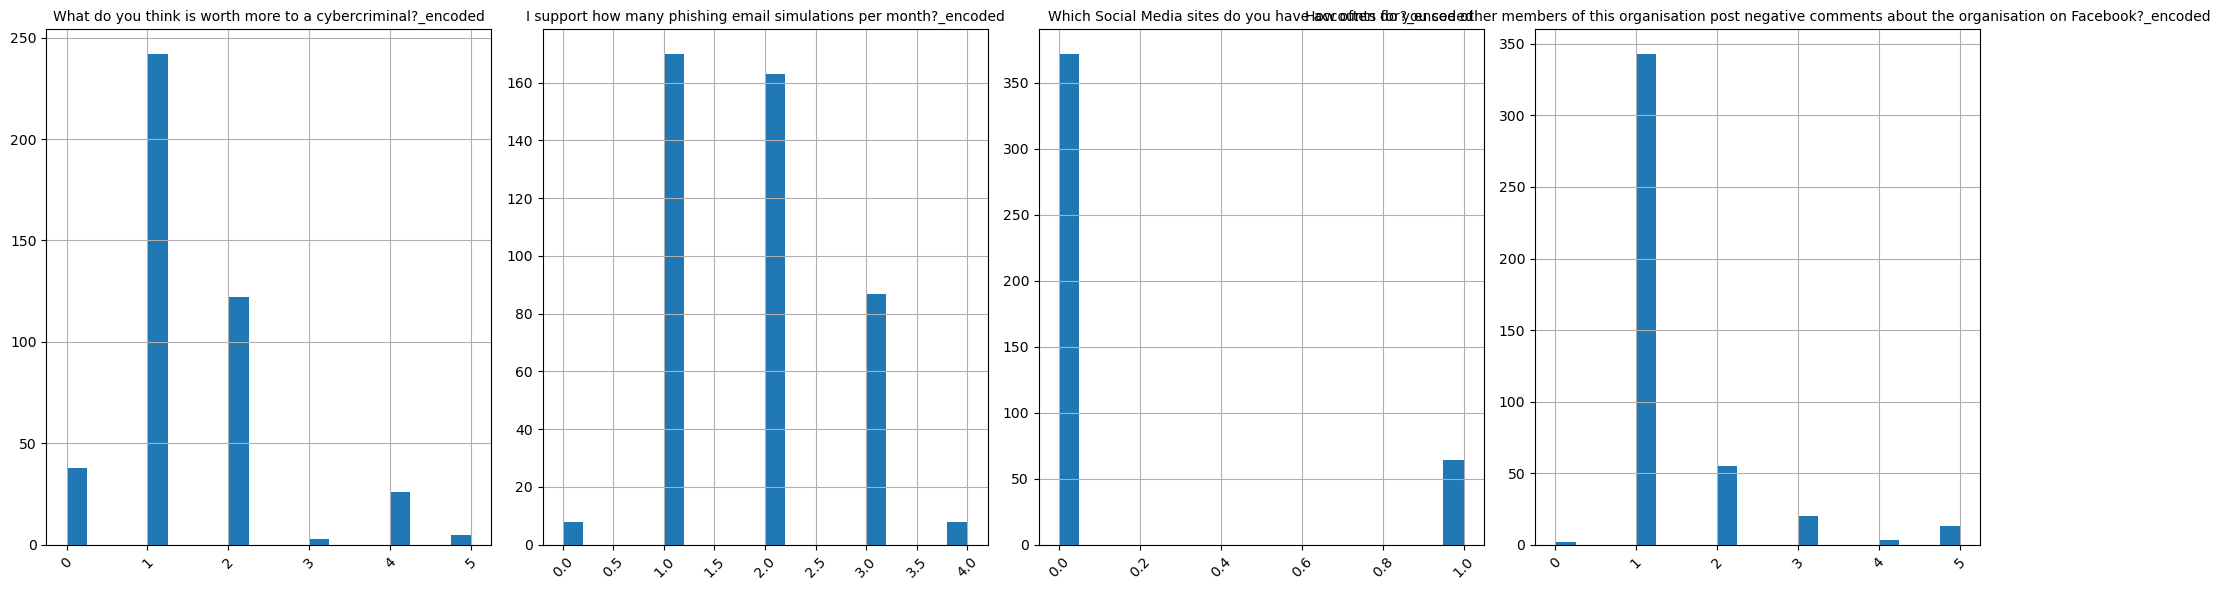

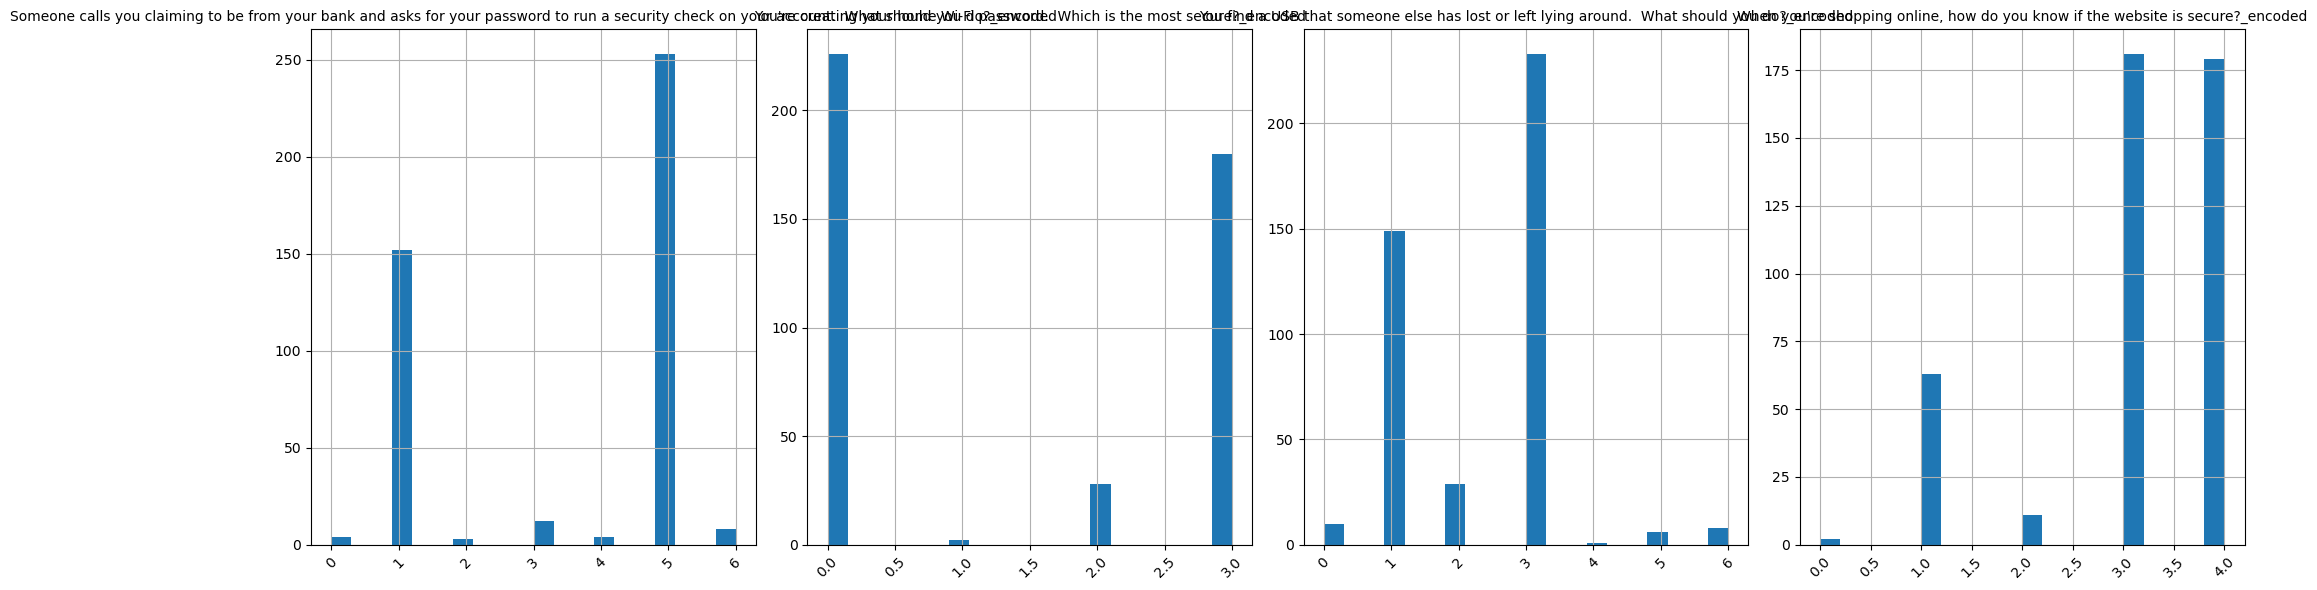

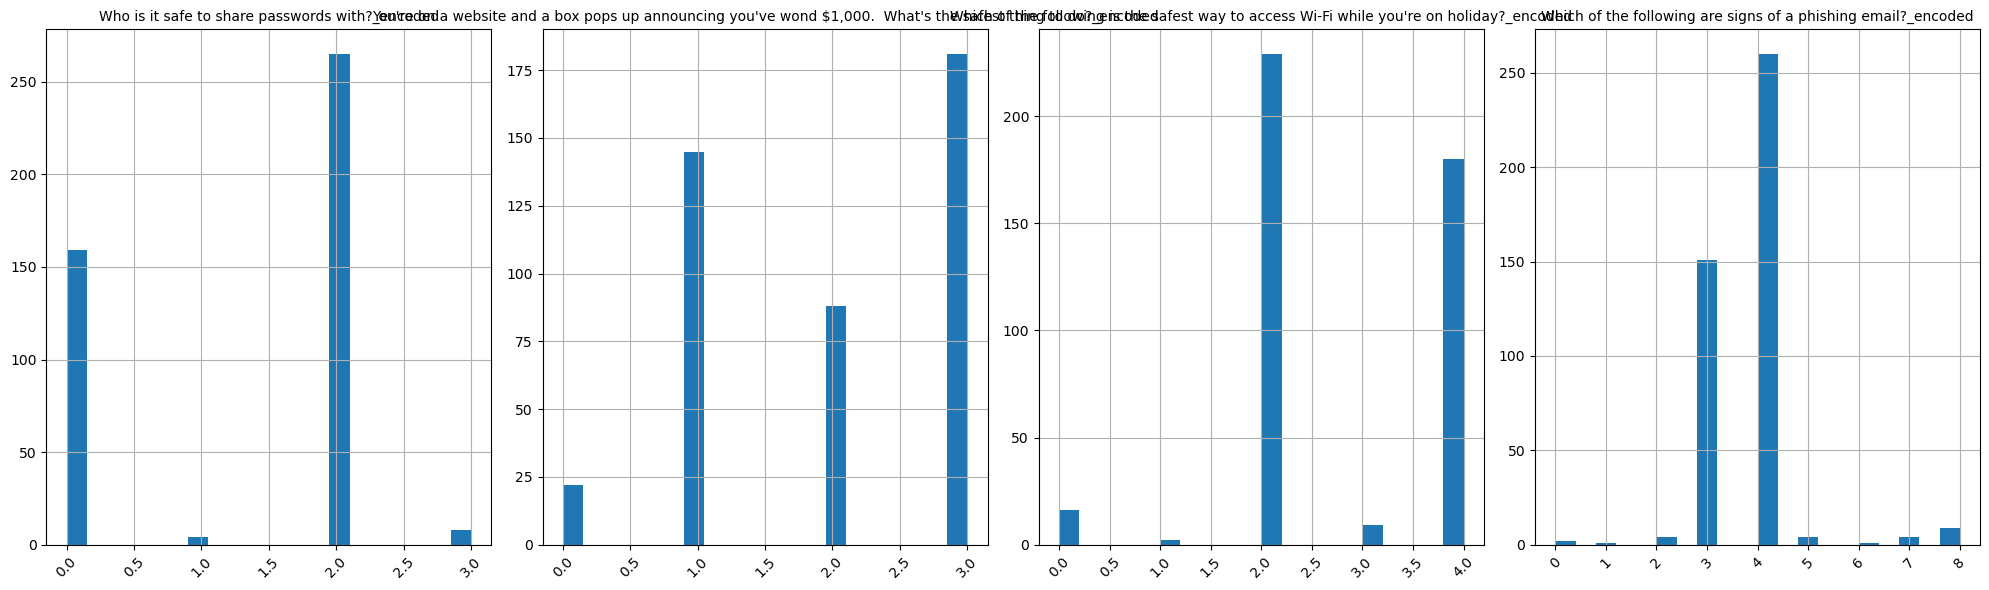

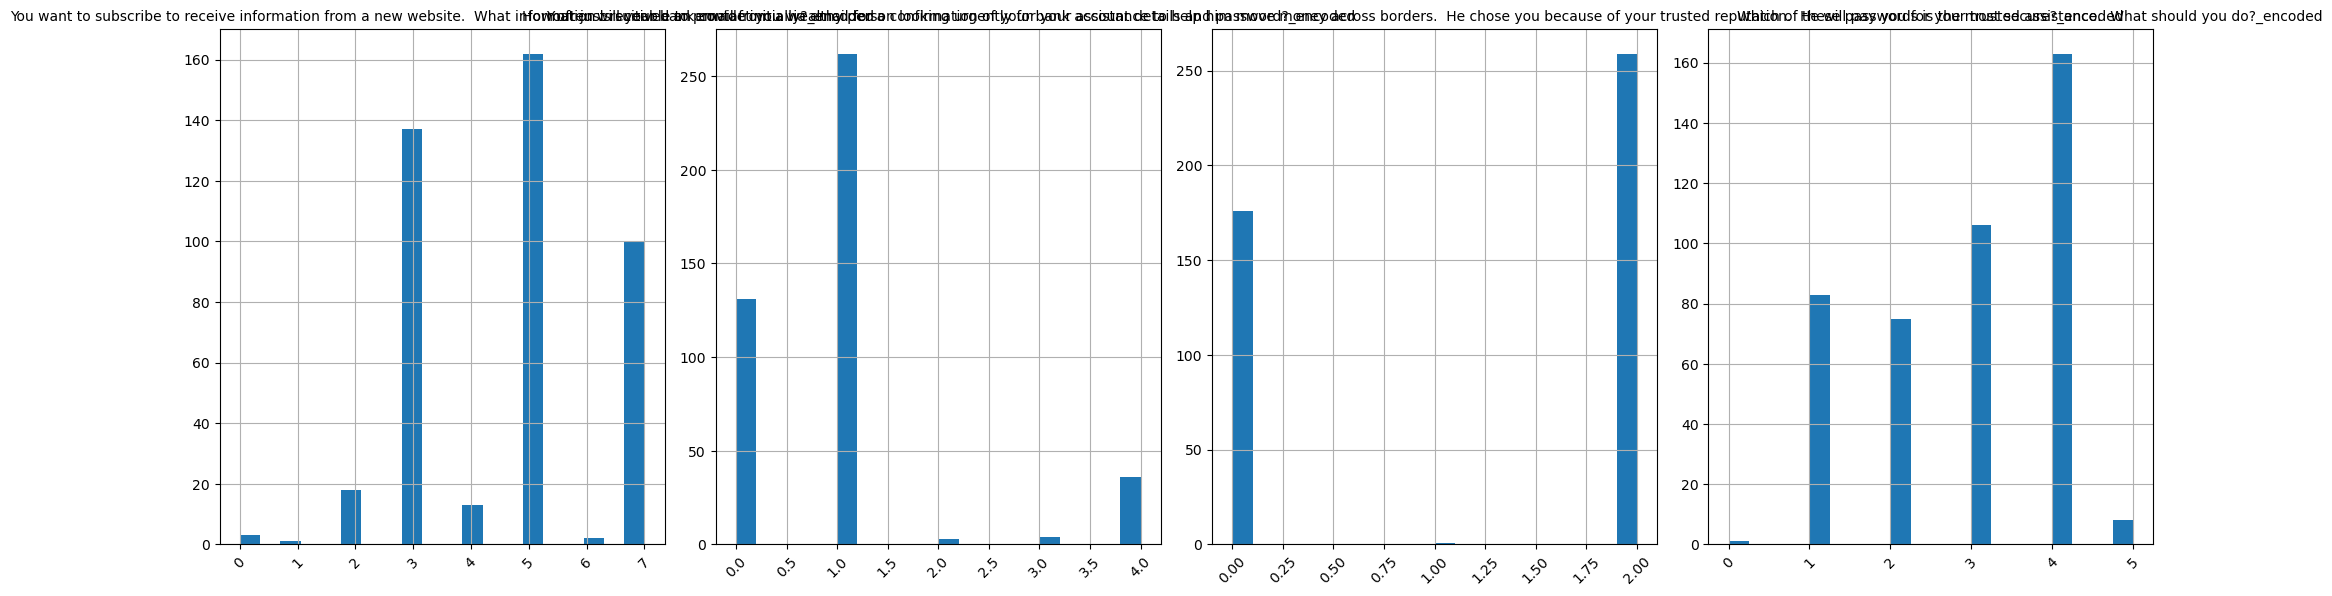

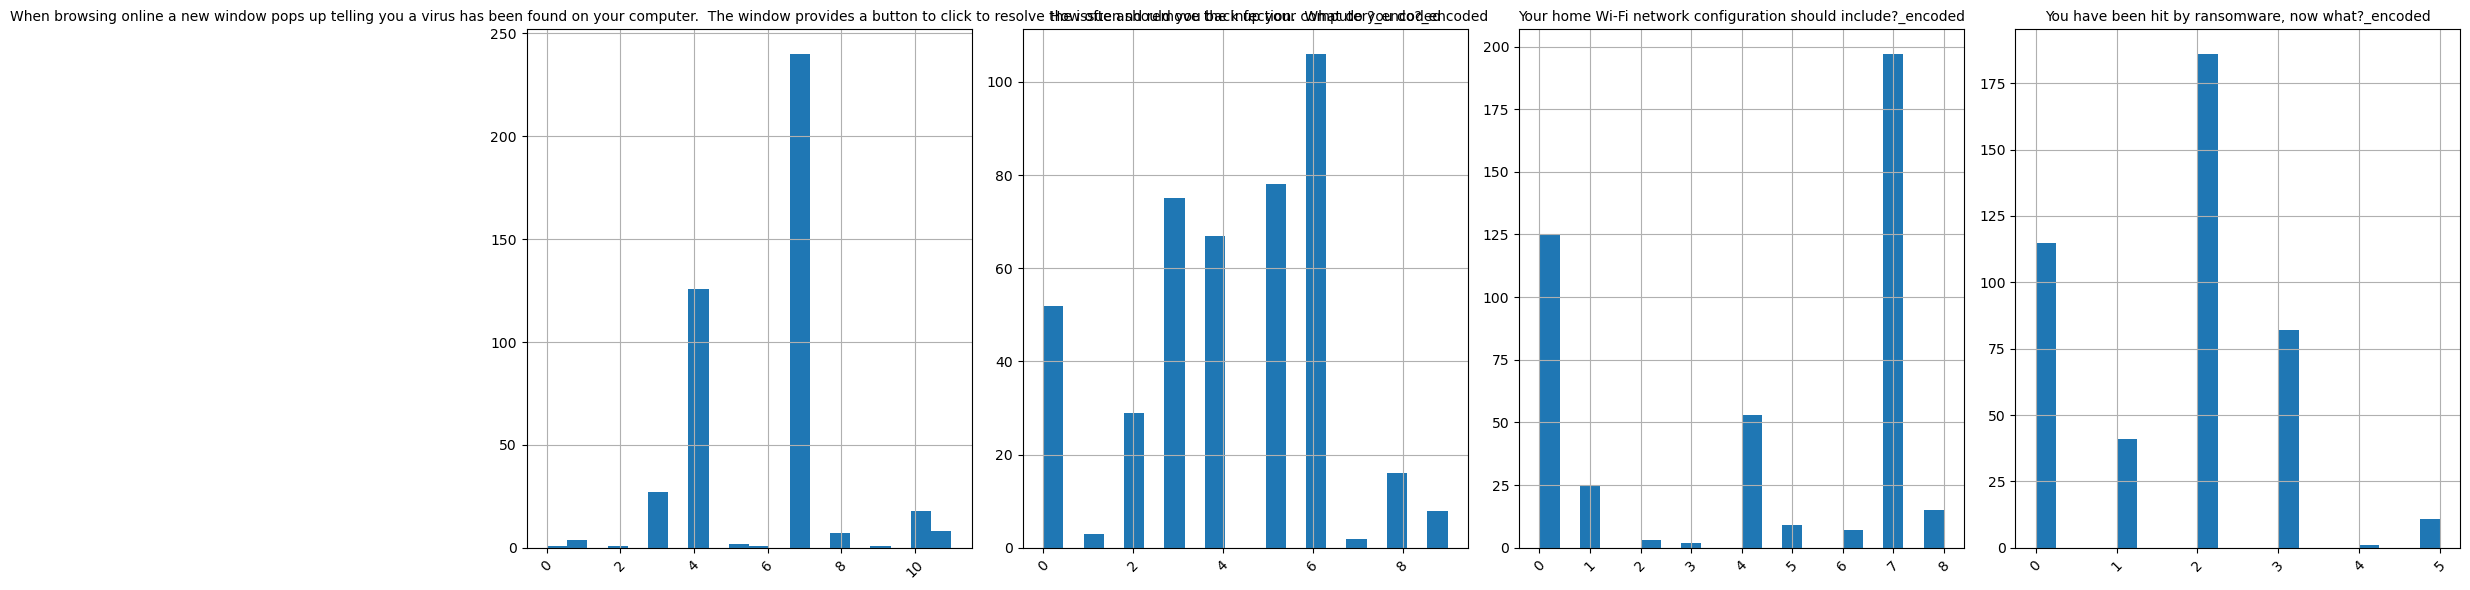

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset (assuming it's already cleaned and pre-processed)
df_cleaned = df_only_encoded.copy()

 
columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns  # Only numerical columns
num_cols = len(columns)

# Loop through the columns in chunks of 4 for 4 histograms in each row
for i in range(0, num_cols, 4):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
    for j, col in enumerate(columns[i:i+4]):
        df_cleaned[col].hist(bins=20, ax=axes[j])
        axes[j].set_title(col, fontsize=10)
        axes[j].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability
    # Hide any empty subplots
    for k in range(j + 1, 4):
        axes[k].set_visible(False)
    plt.tight_layout()
    plt.show()





### Correlation to check the relationship between Target variable(Maturity level) and other variables

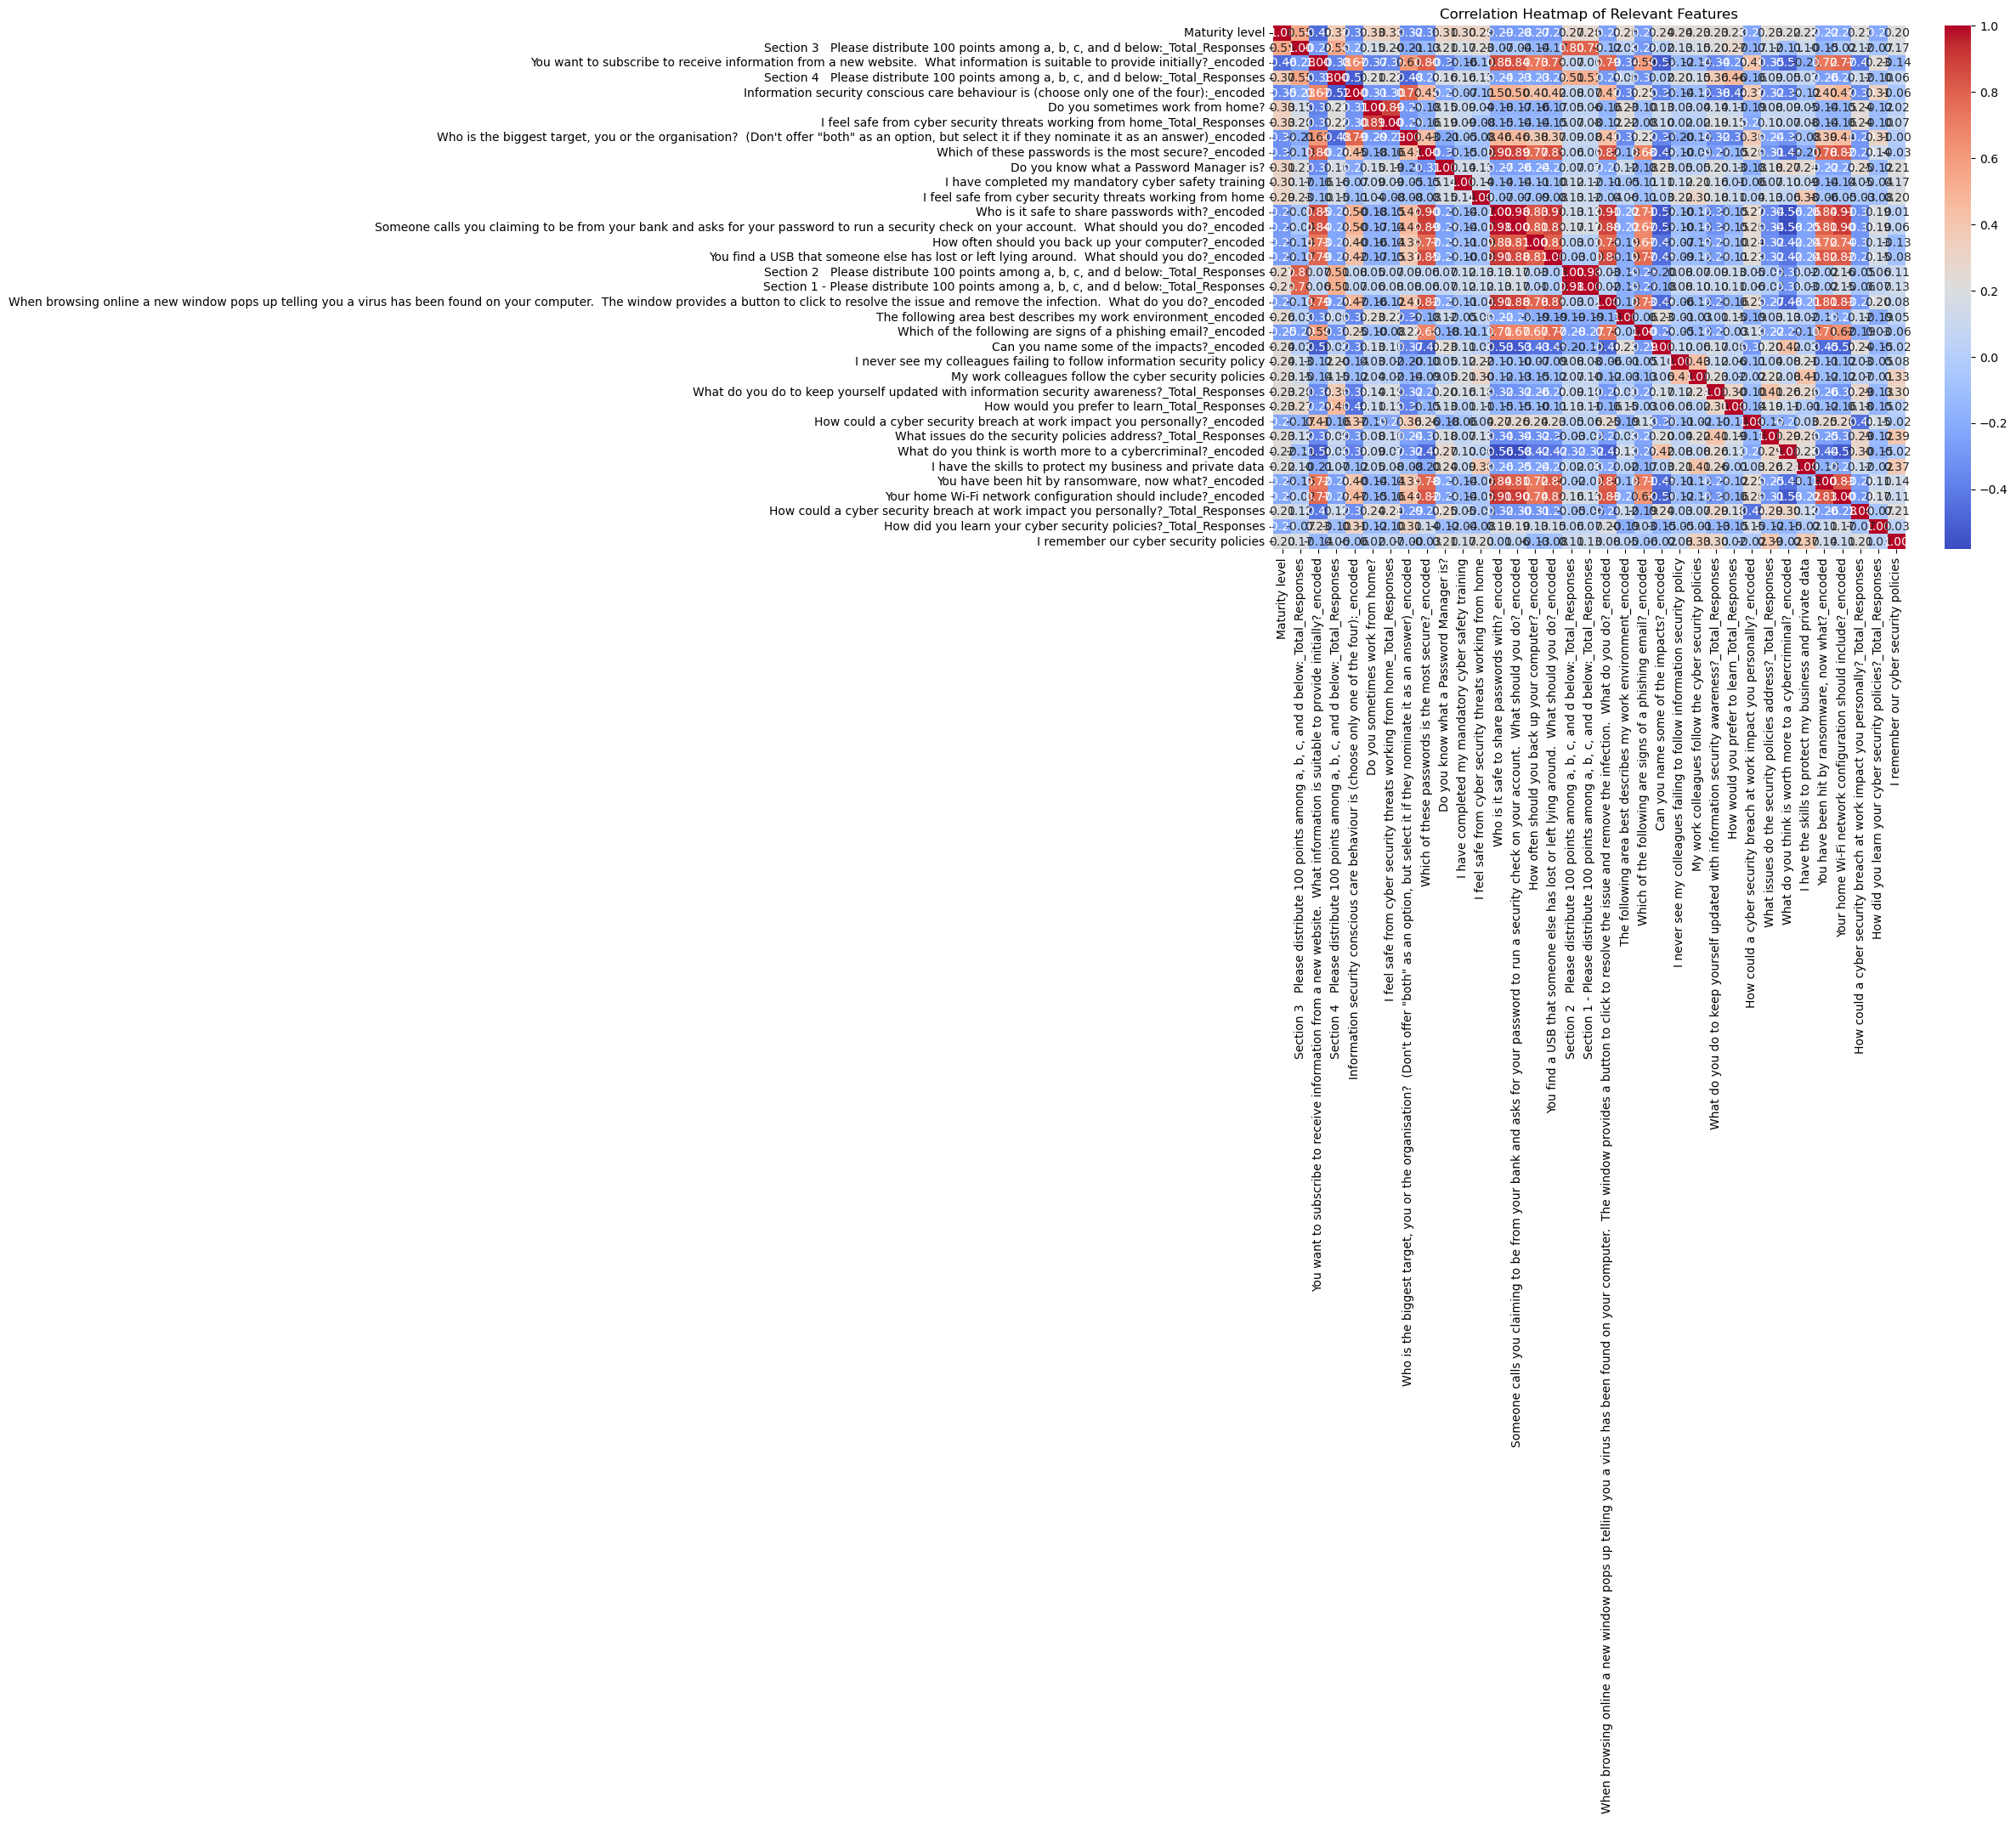

In [61]:
# Calculate the correlation matrix for all features
correlation_matrix = df_cleaned.corr()
 
# Get correlation values for all features with the target variable 'maturity_level'
target_corr = correlation_matrix['Maturity level'].abs().sort_values(ascending=False)
 
# Define a threshold to keep only the features with correlation above the threshold (e.g., 0.2)
threshold = 0.2
relevant_features = target_corr[target_corr > threshold].index
 
# Filter the DataFrame to keep only the relevant features
df_relevant = df_cleaned[relevant_features]
 
# Display the correlation values for the selected features
relevant_features_corr = target_corr[target_corr > threshold]
relevant_features_corr
 
relevant_correlation_matrix = df_relevant.corr()
 
# Plot the heatmap for relevant features
plt.figure(figsize=(12, 8))
sns.heatmap(df_relevant.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Relevant Features')
plt.show()





### Box Plot 

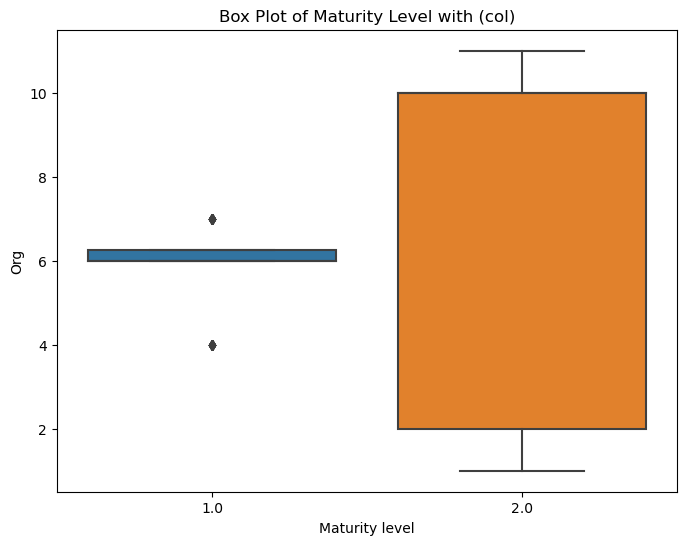

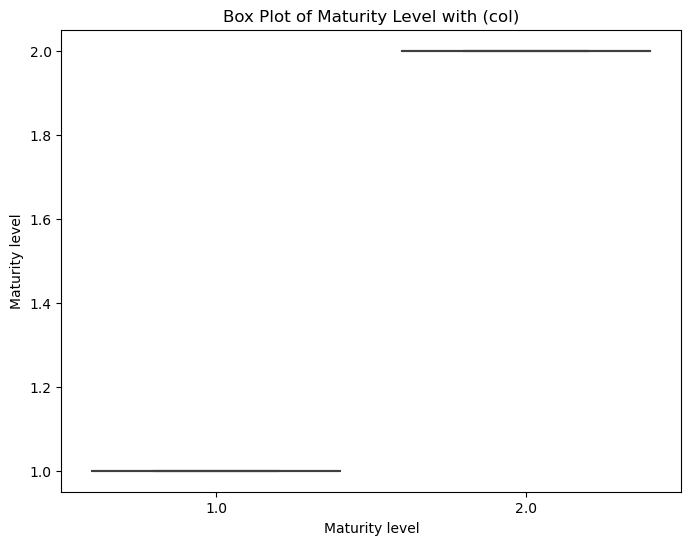

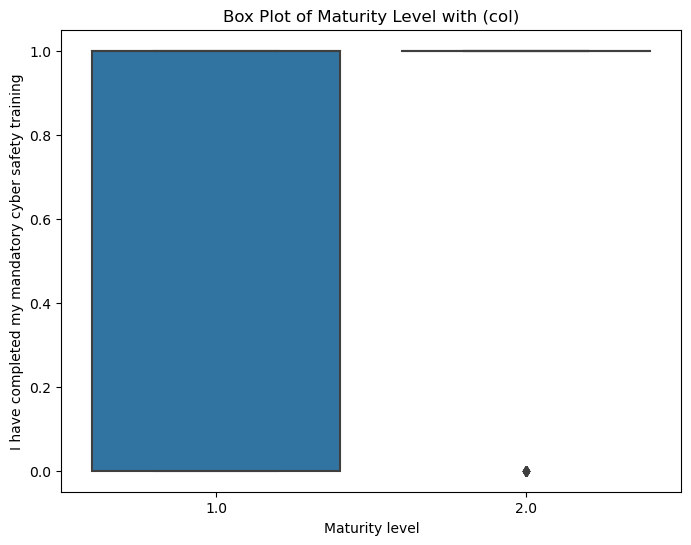

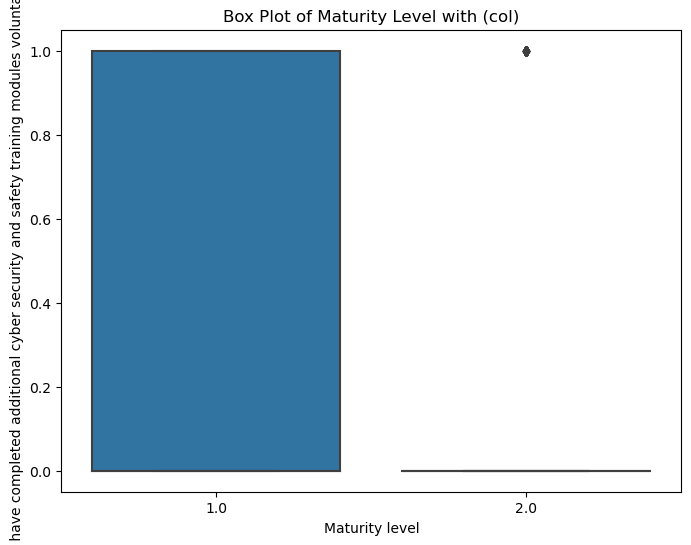

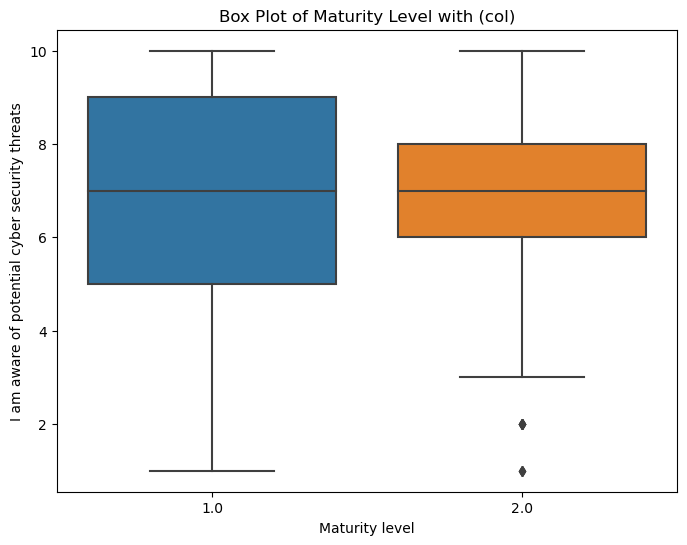

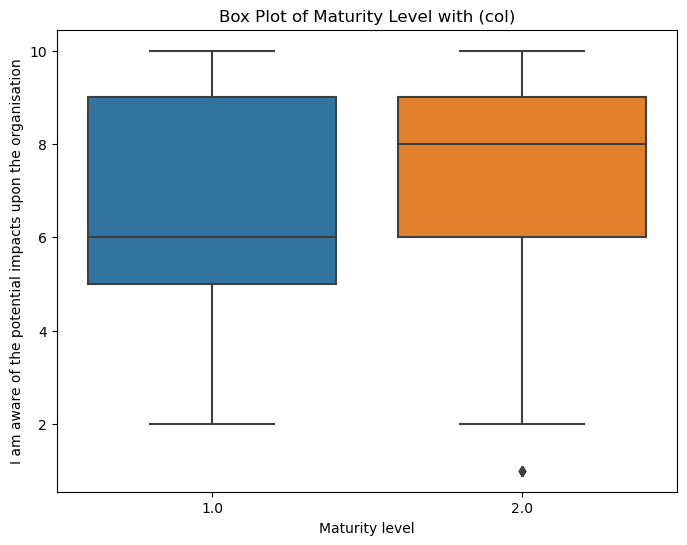

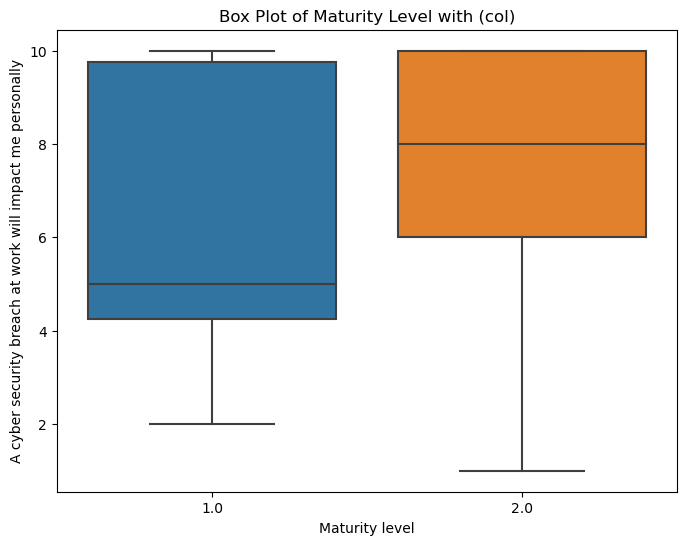

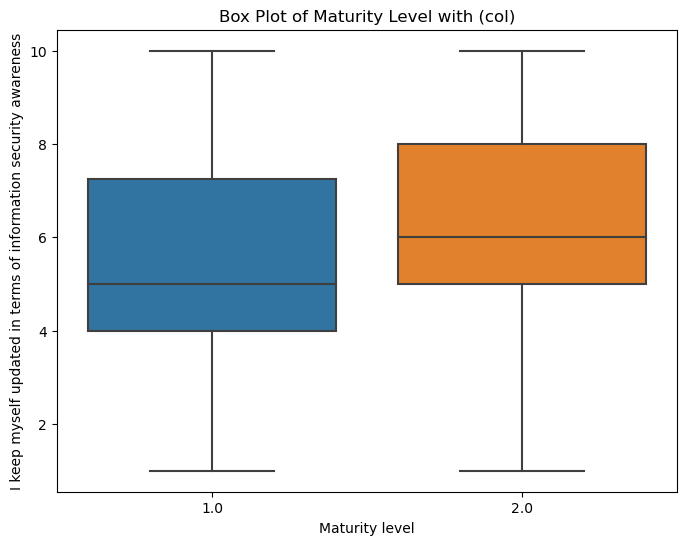

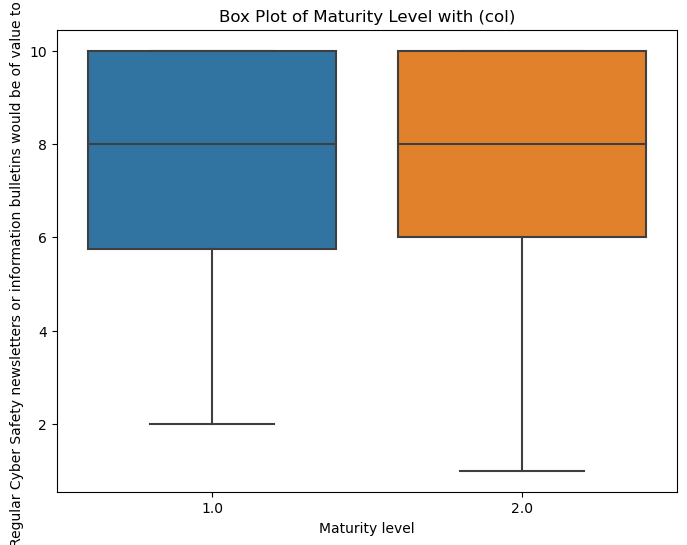

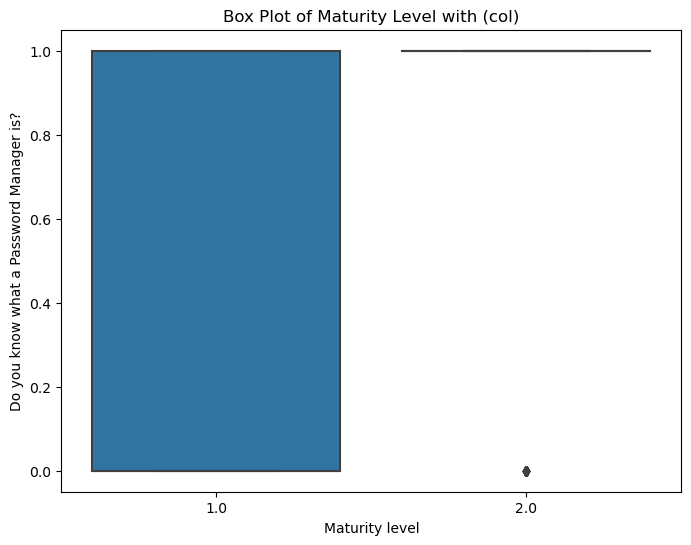

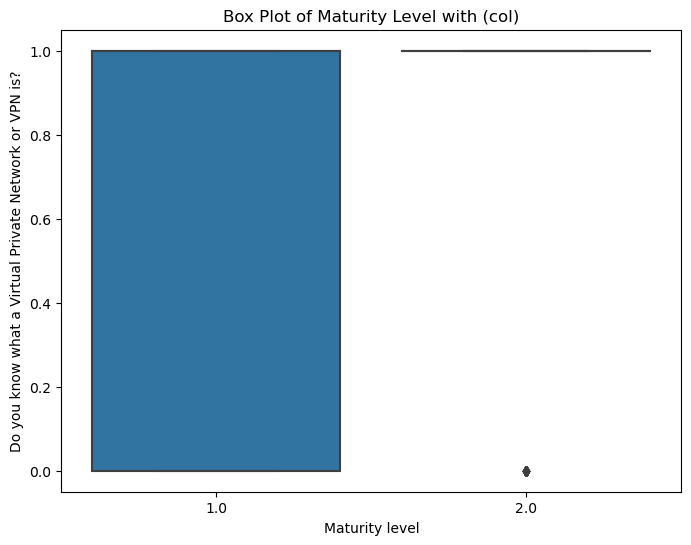

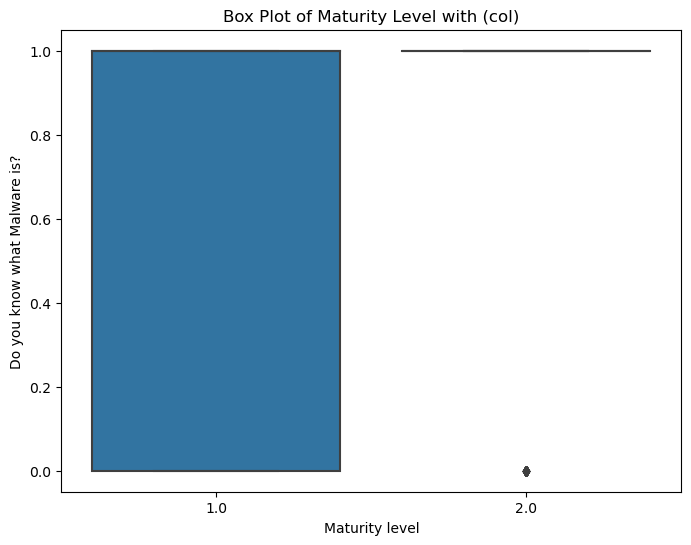

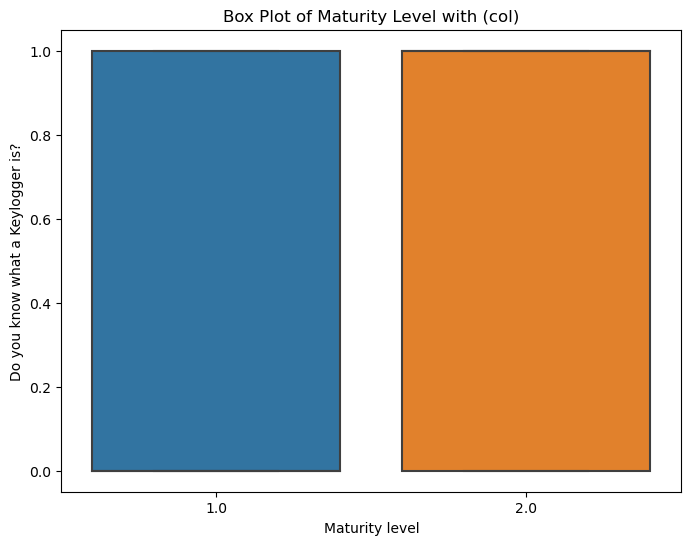

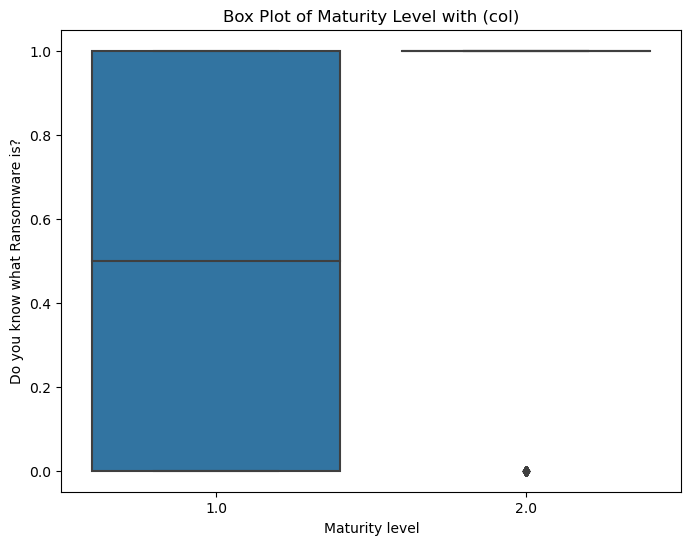

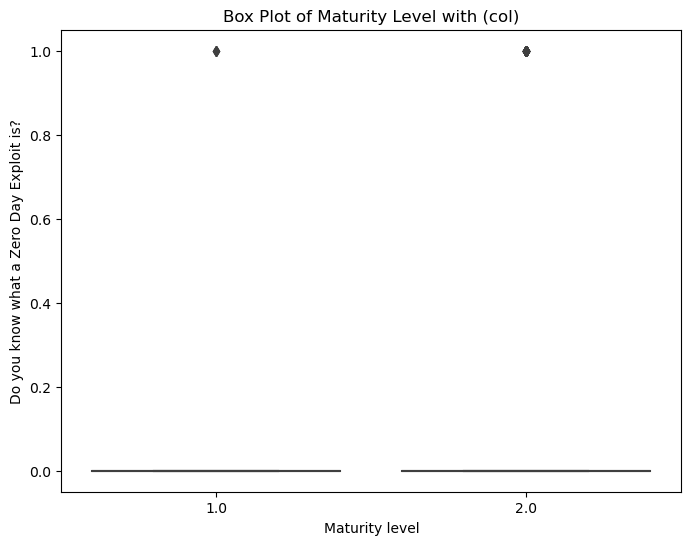

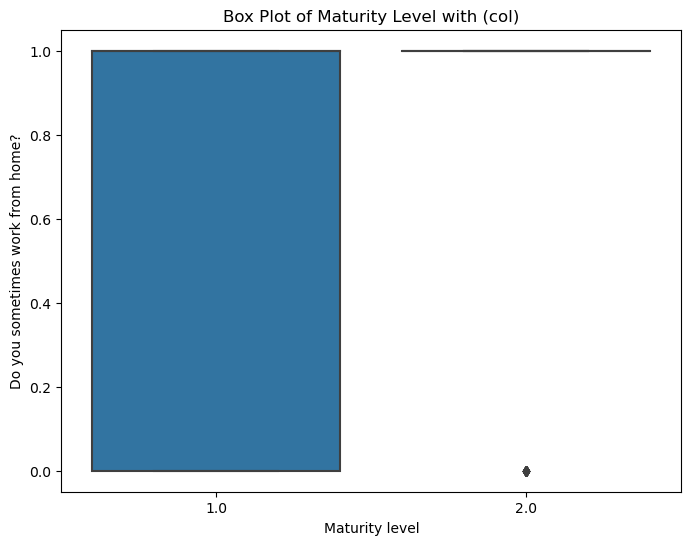

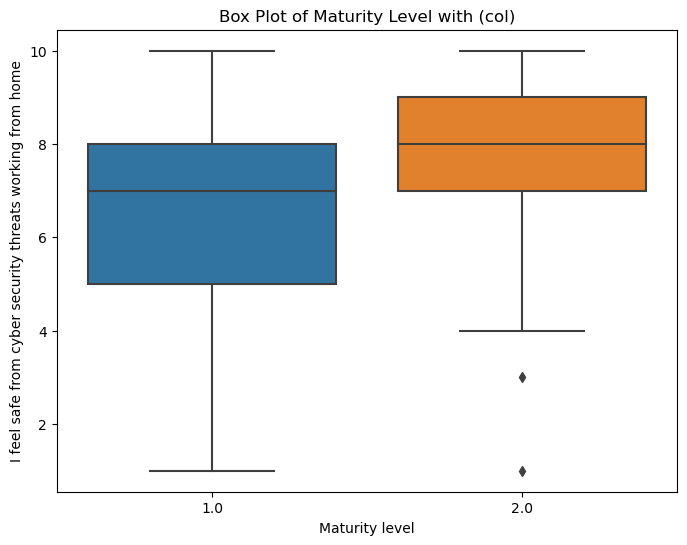

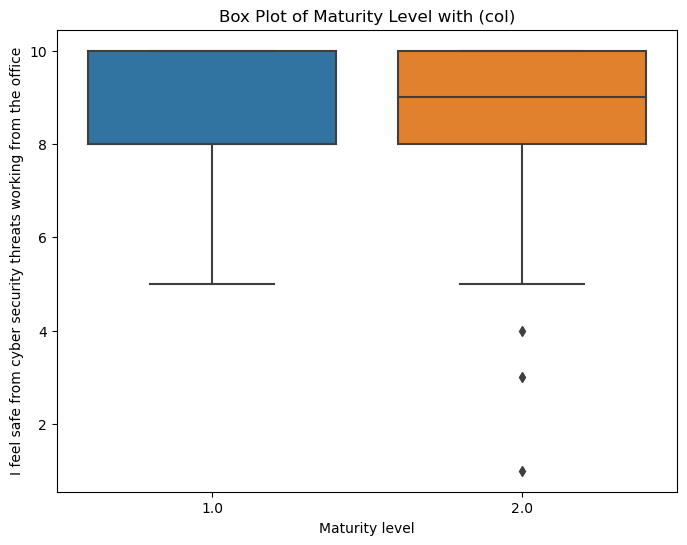

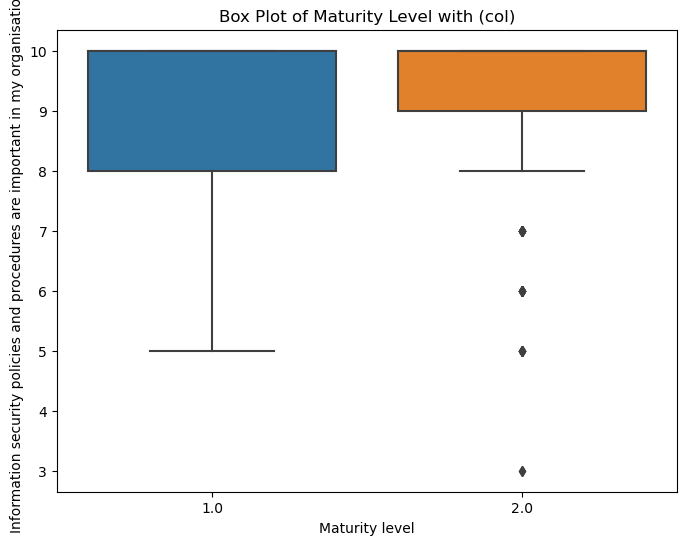

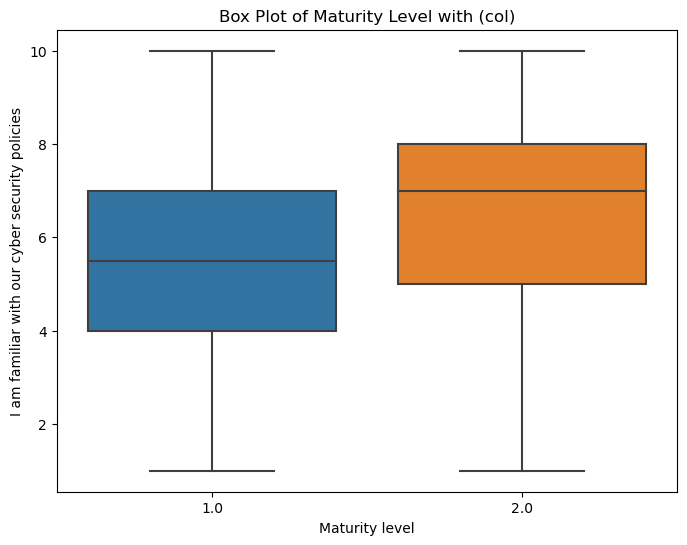

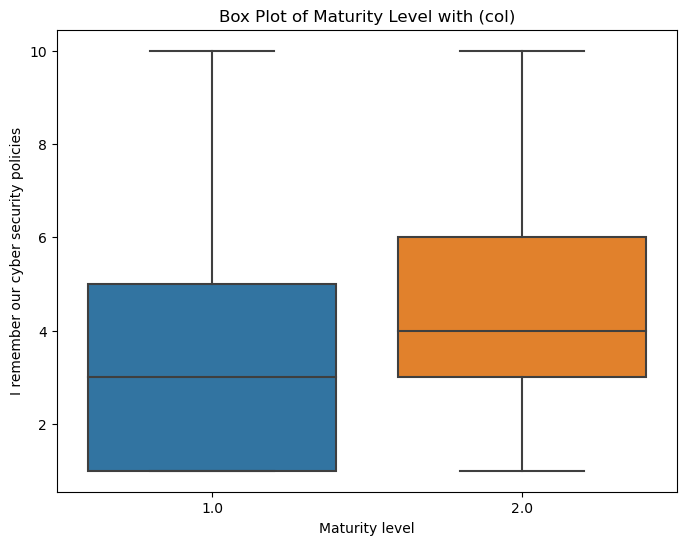

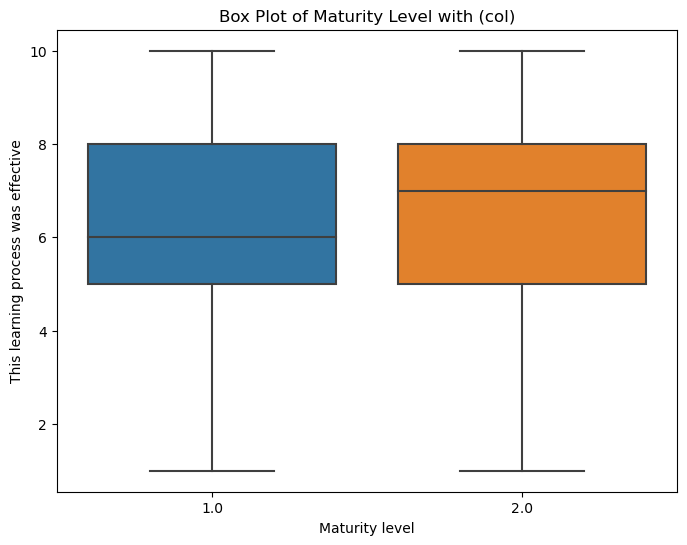

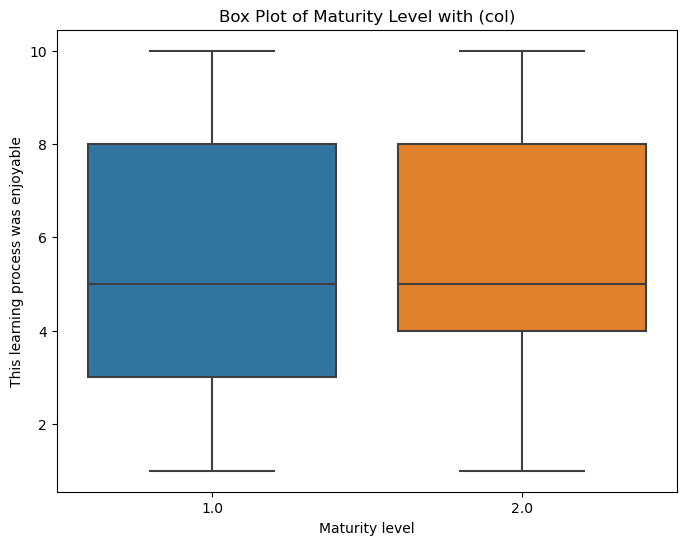

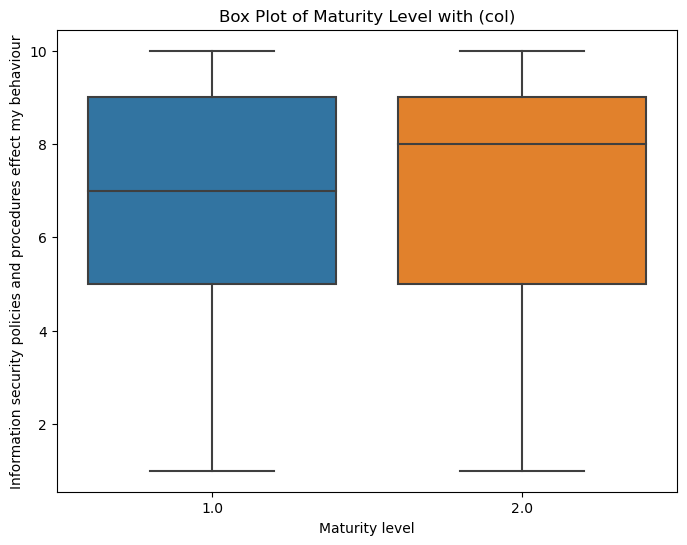

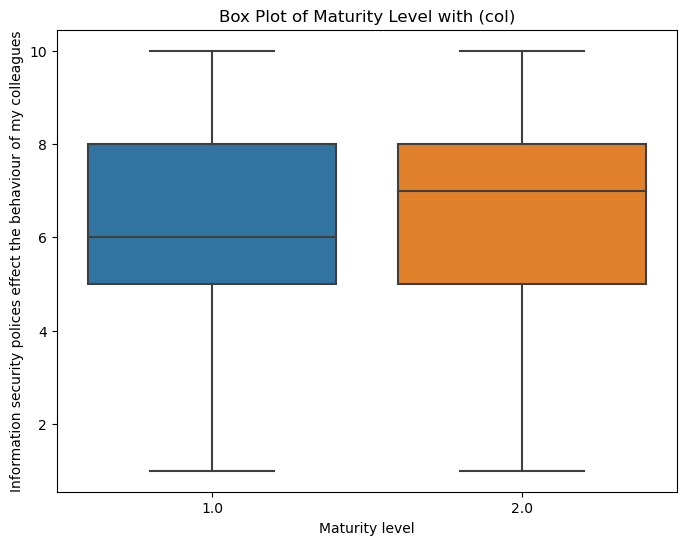

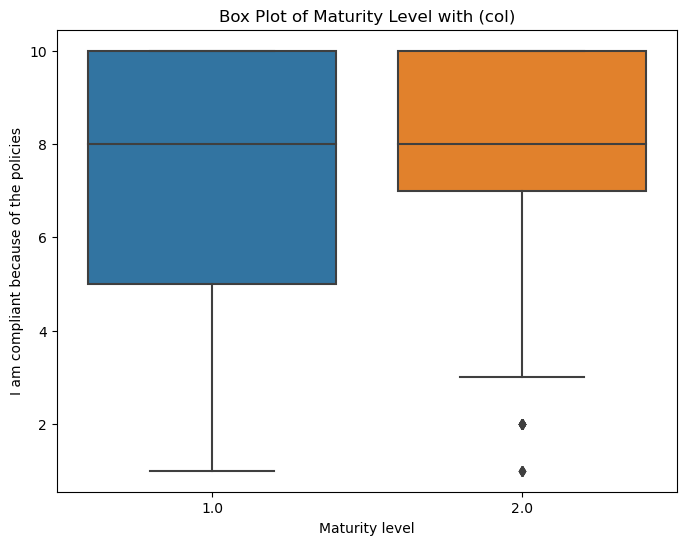

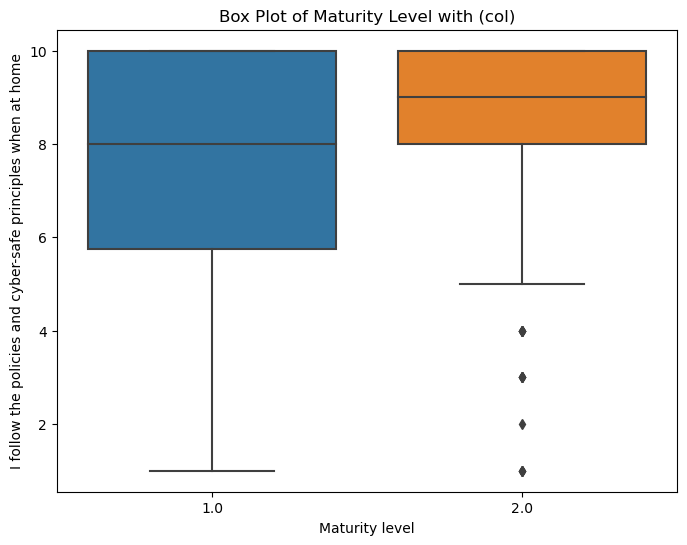

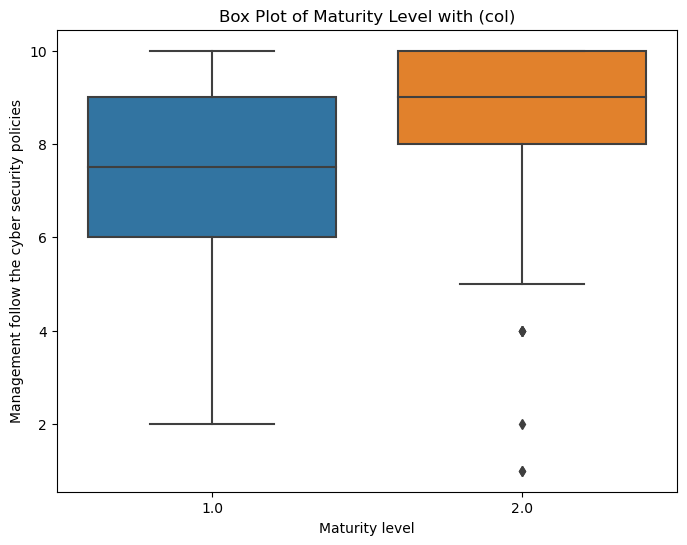

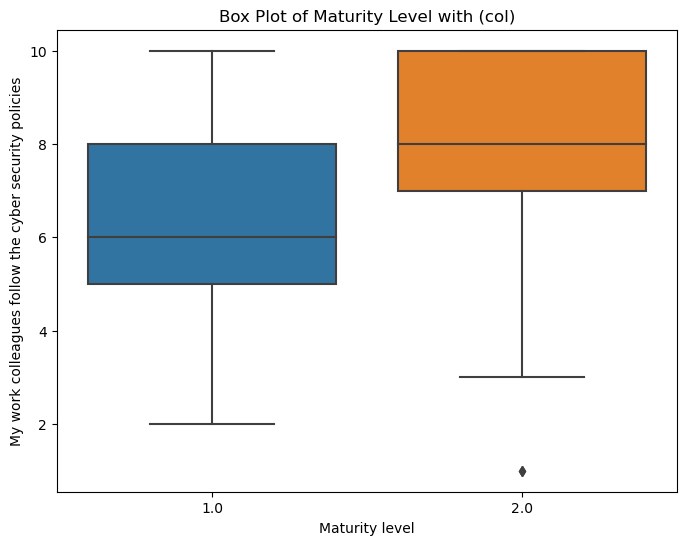

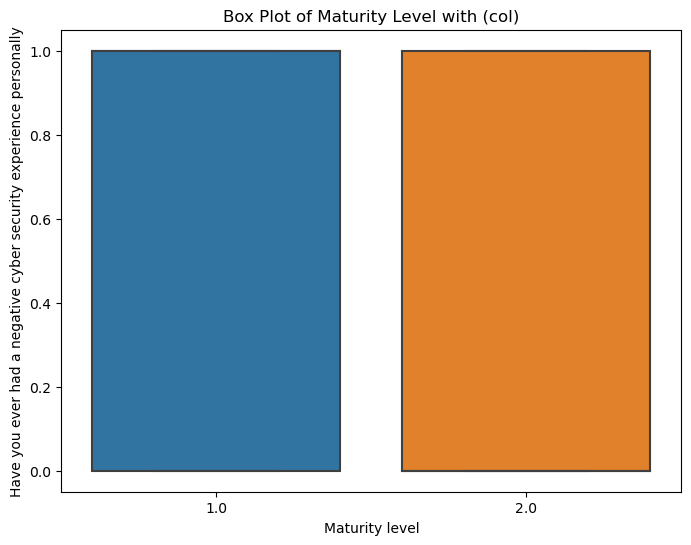

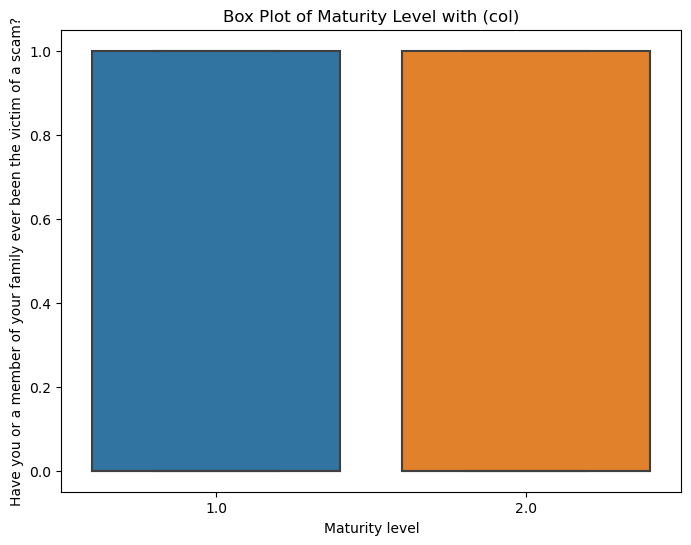

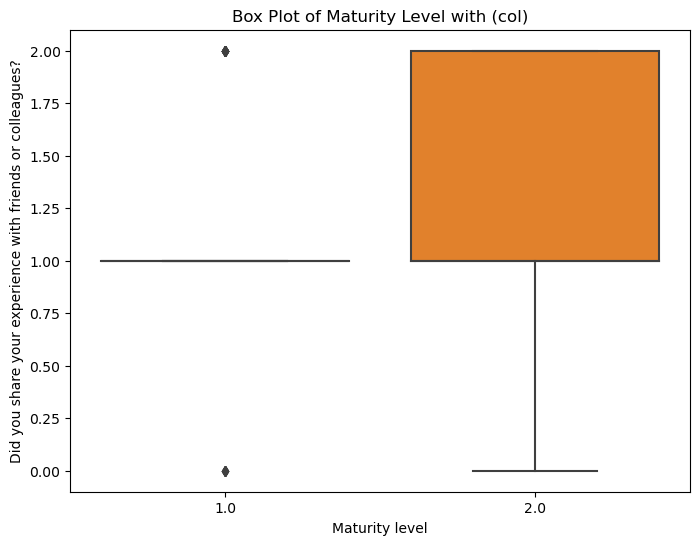

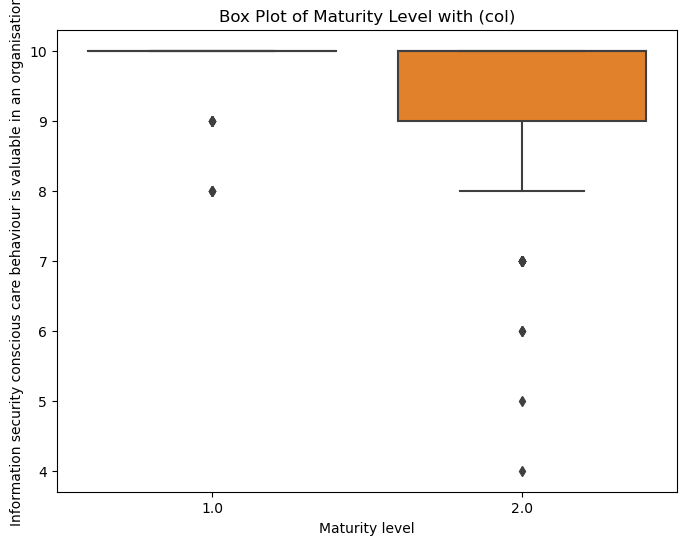

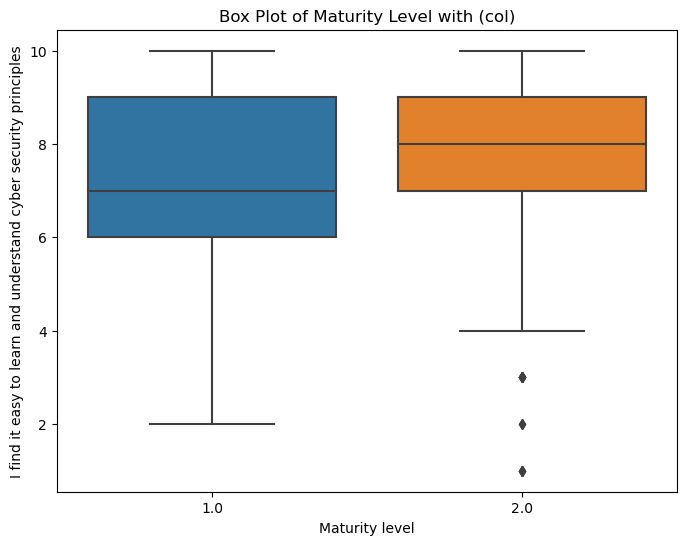

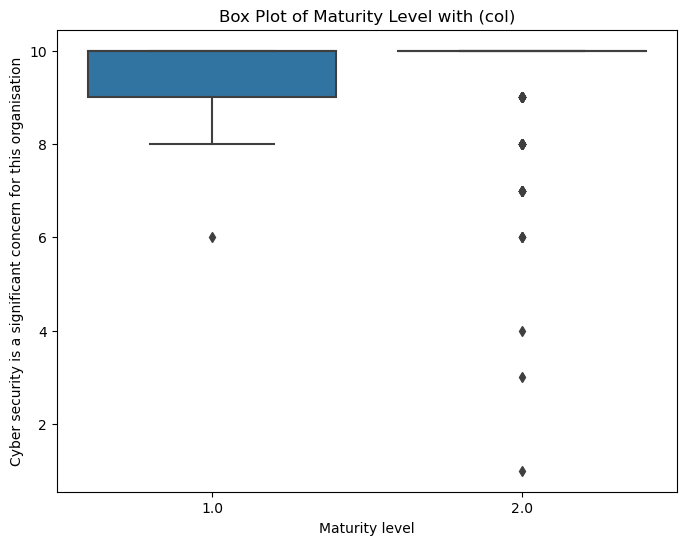

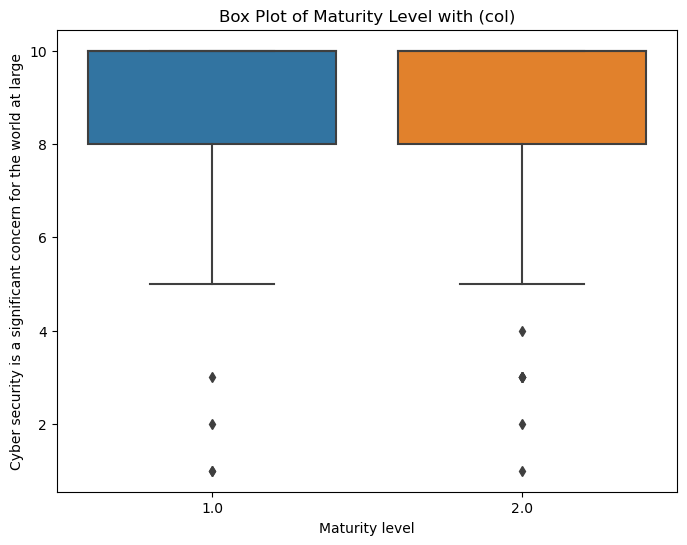

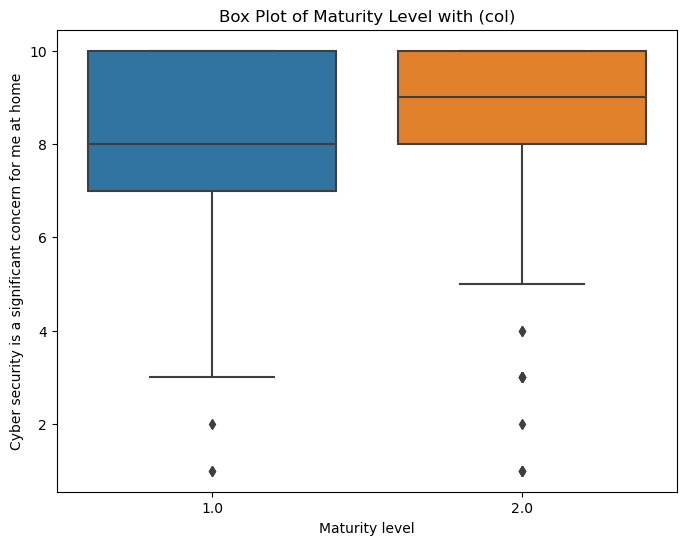

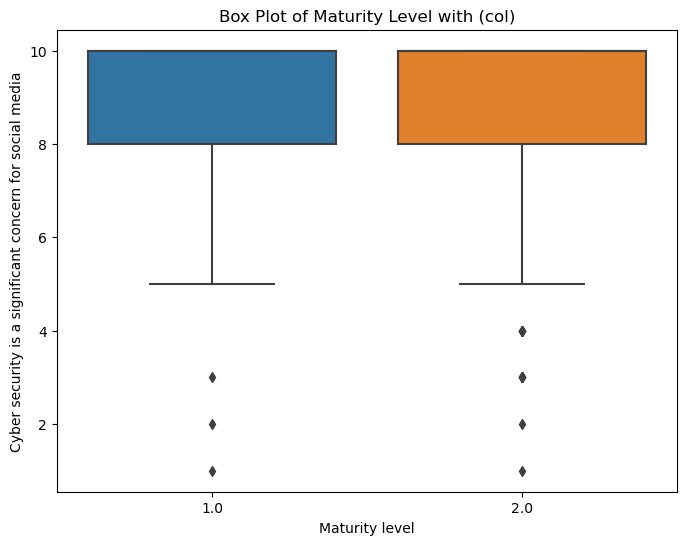

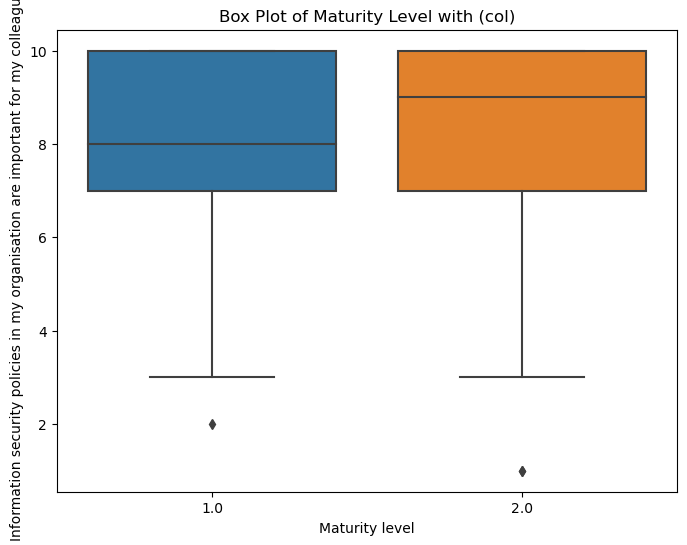

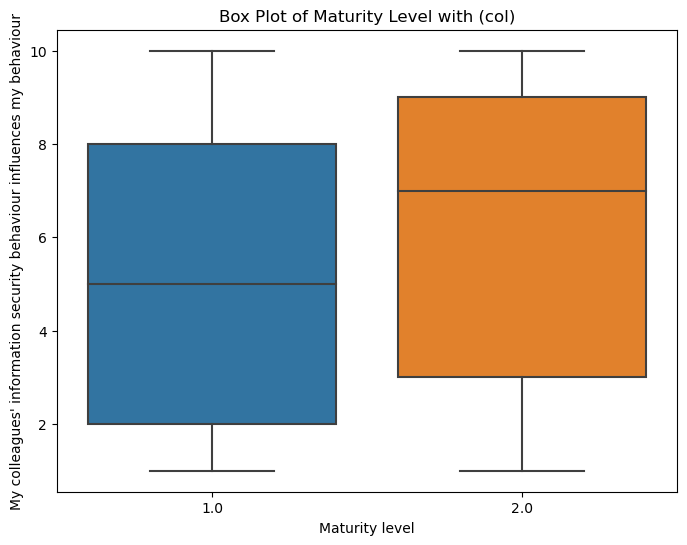

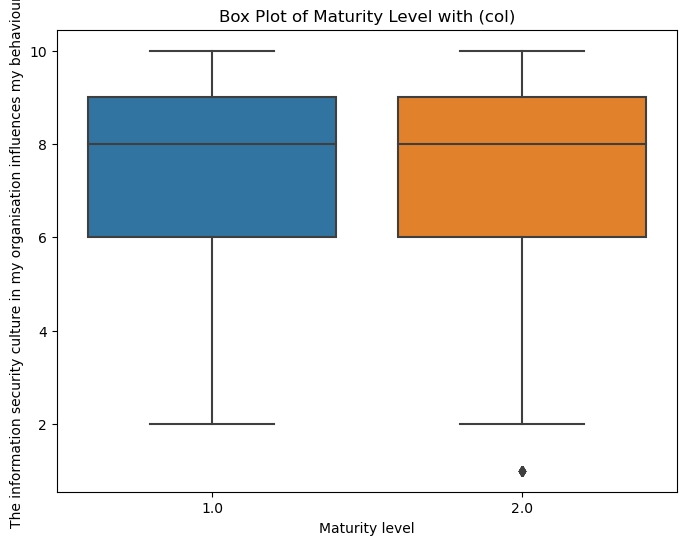

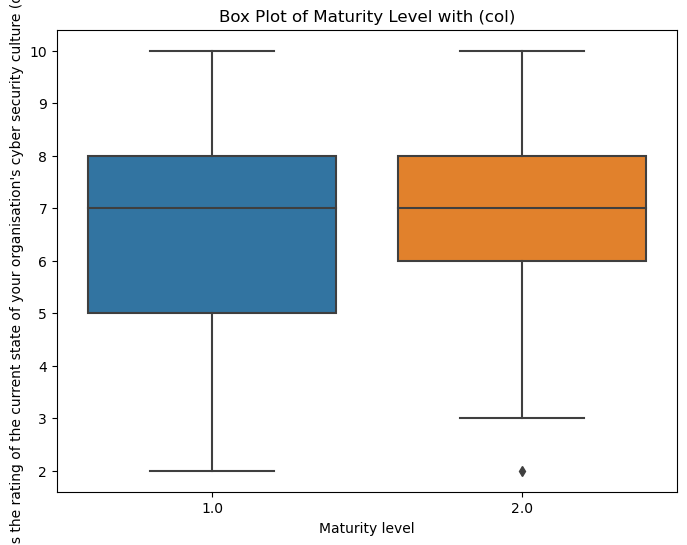

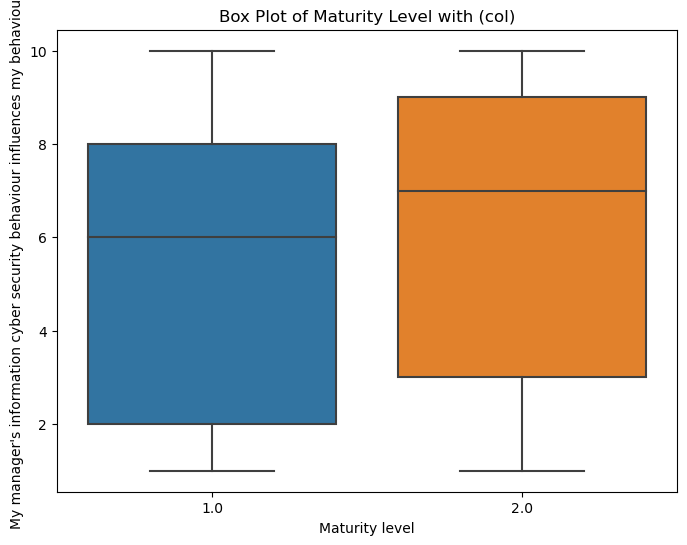

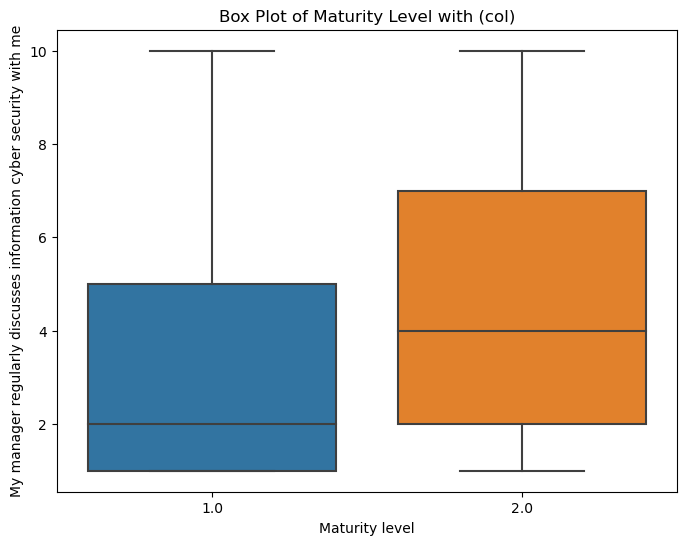

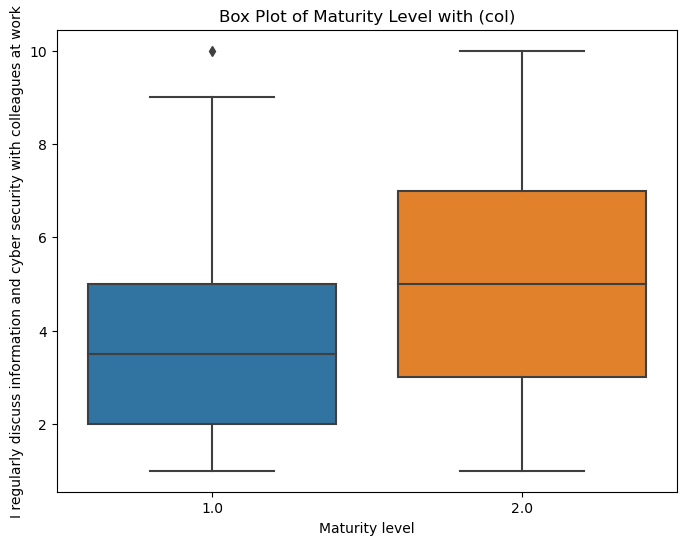

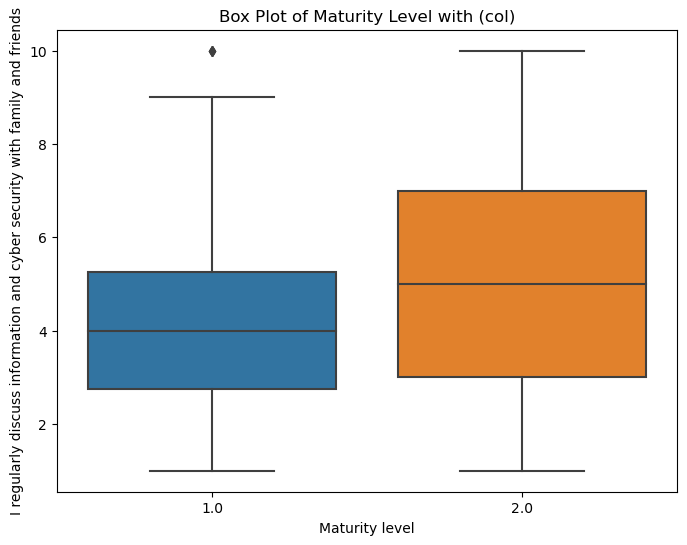

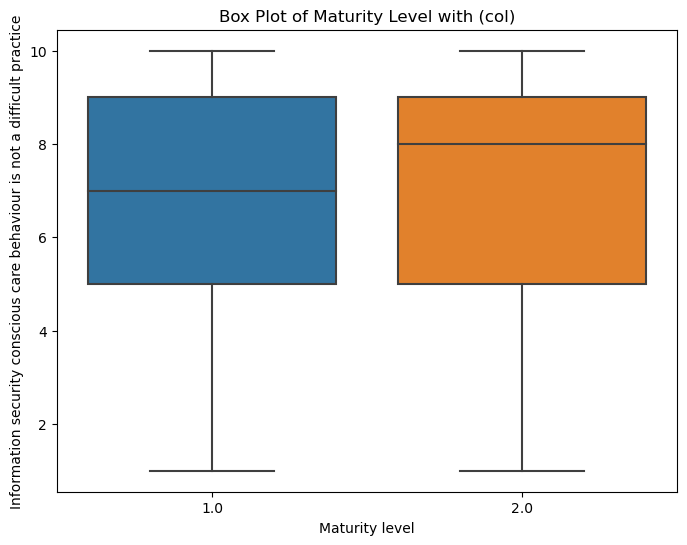

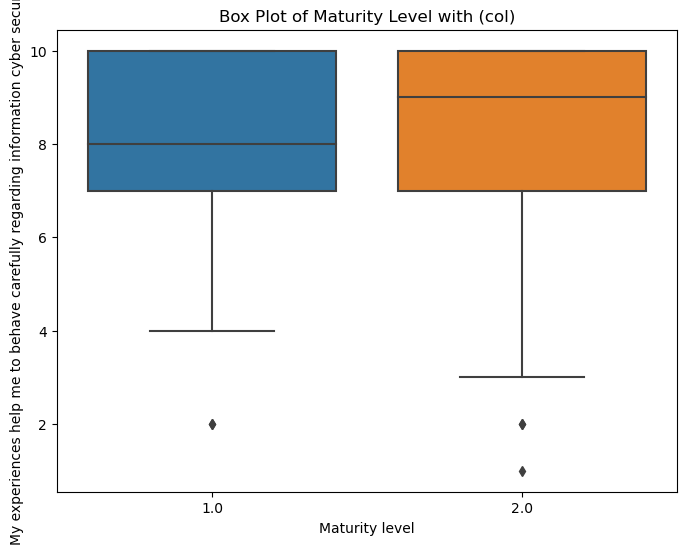

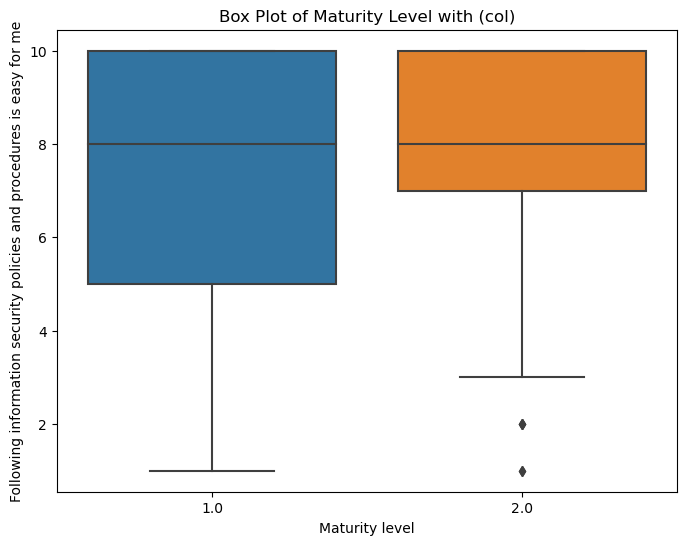

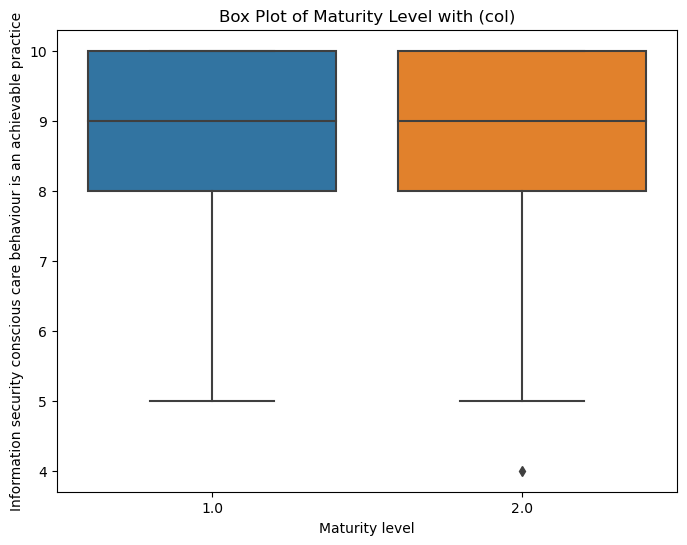

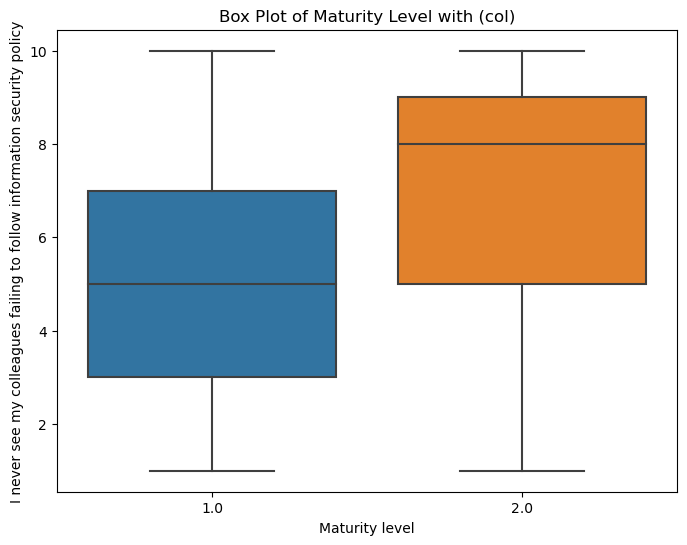

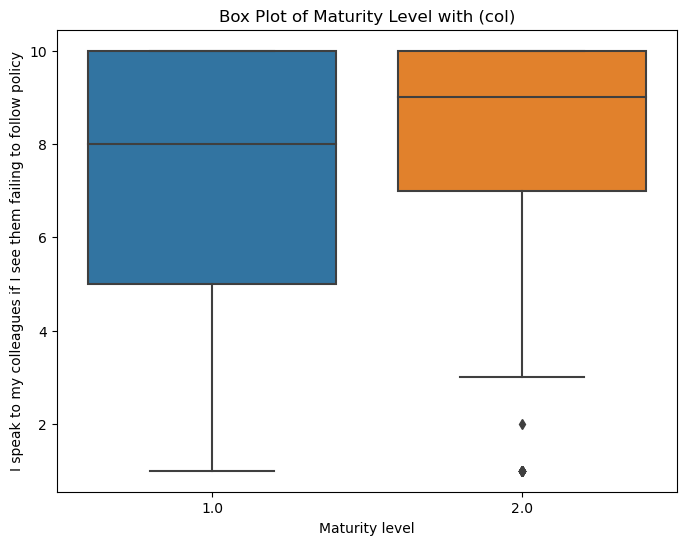

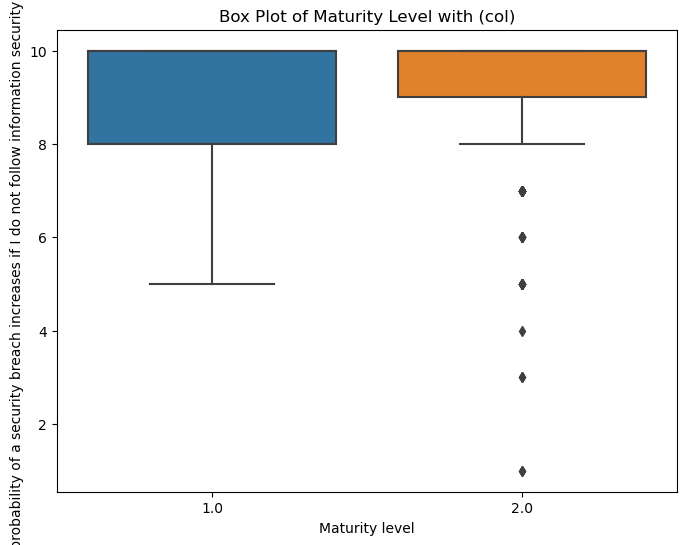

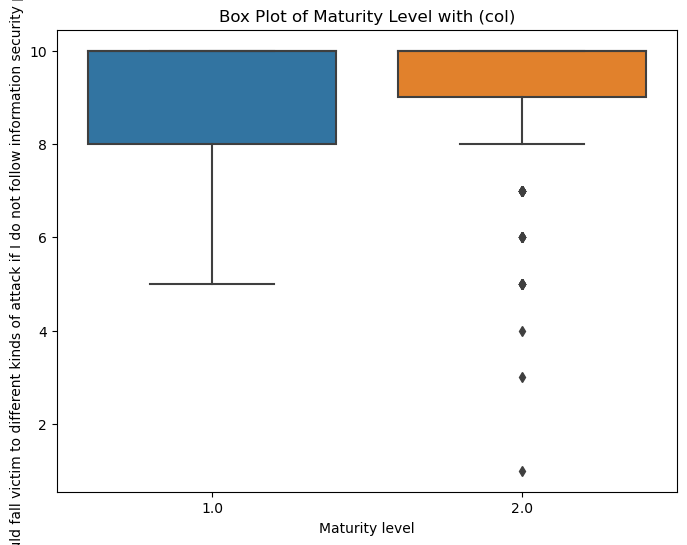

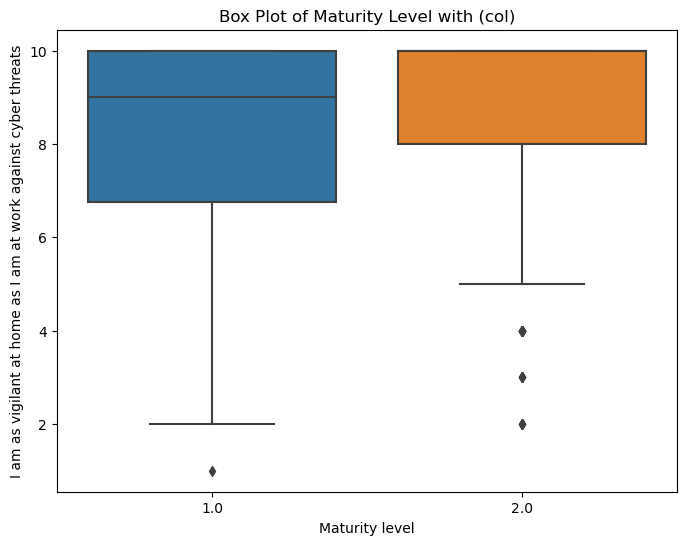

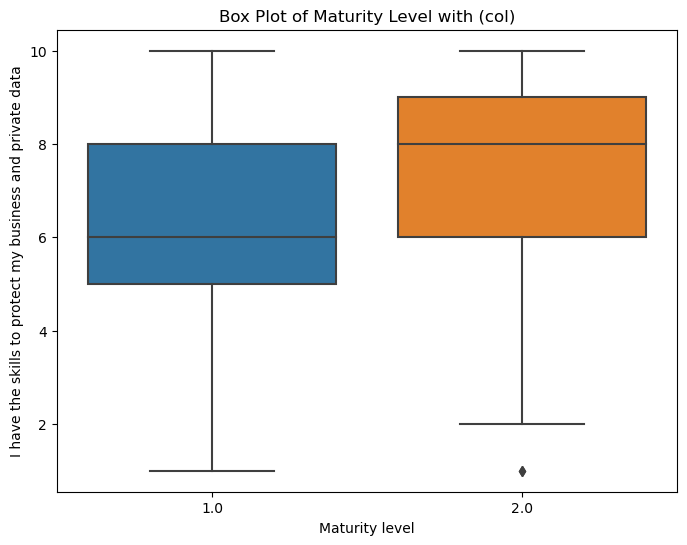

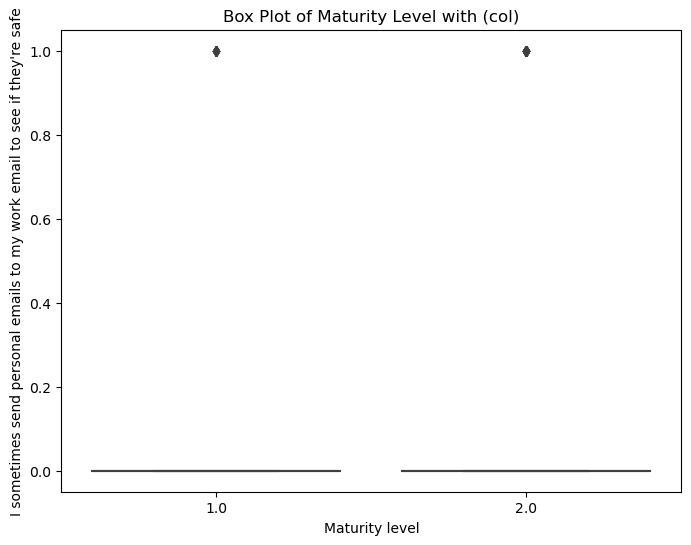

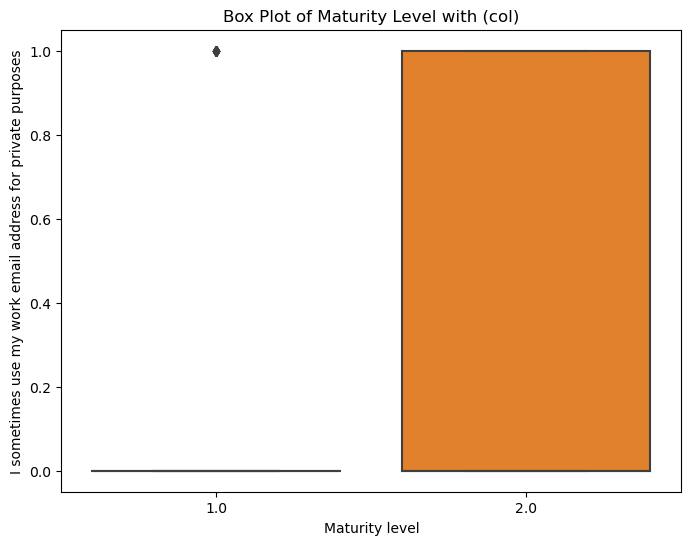

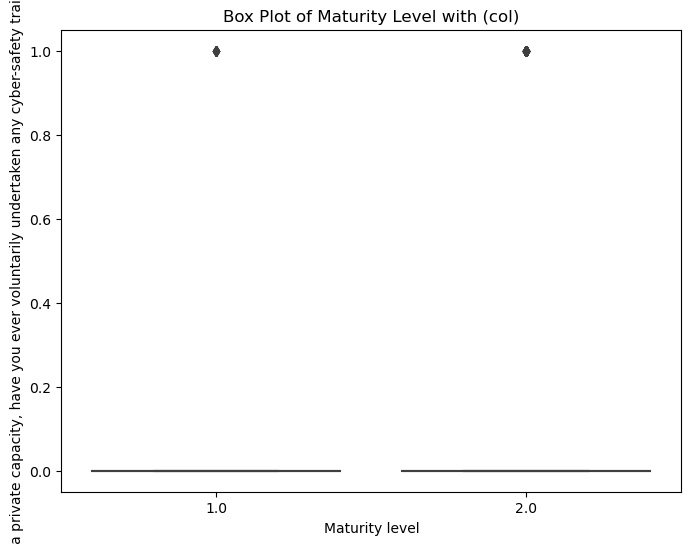

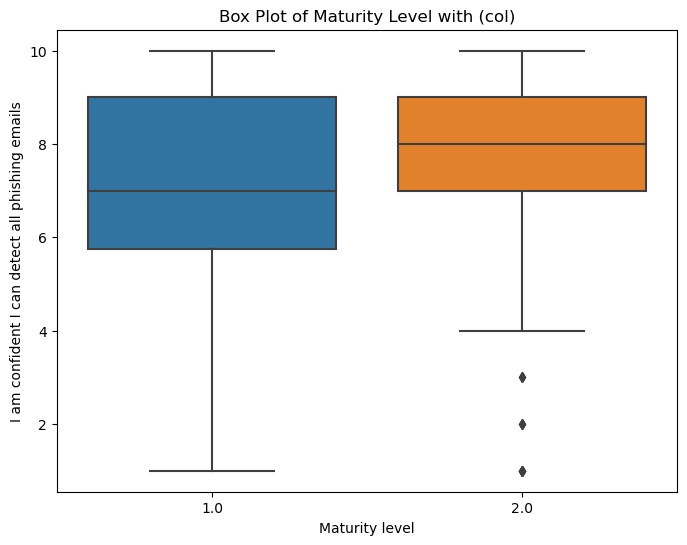

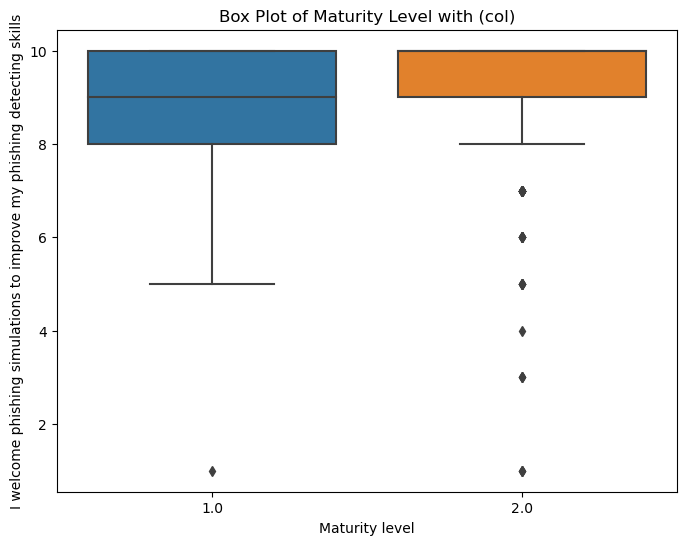

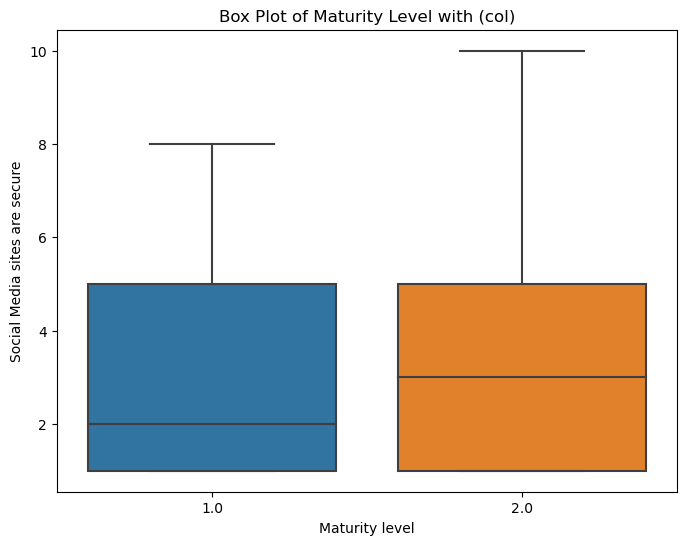

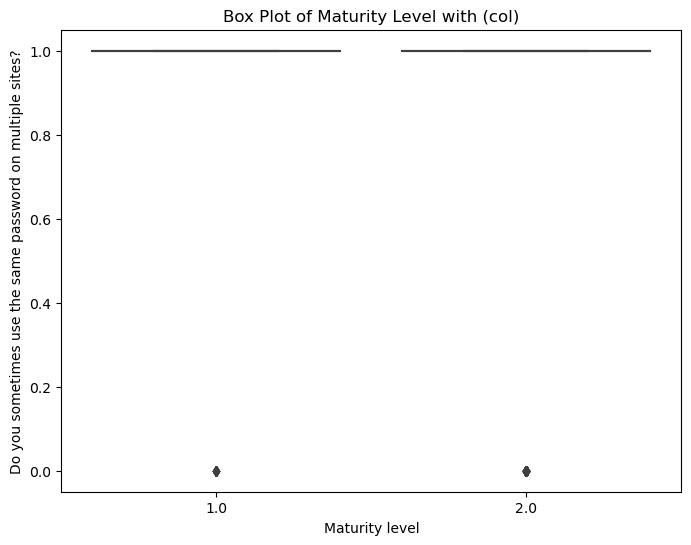

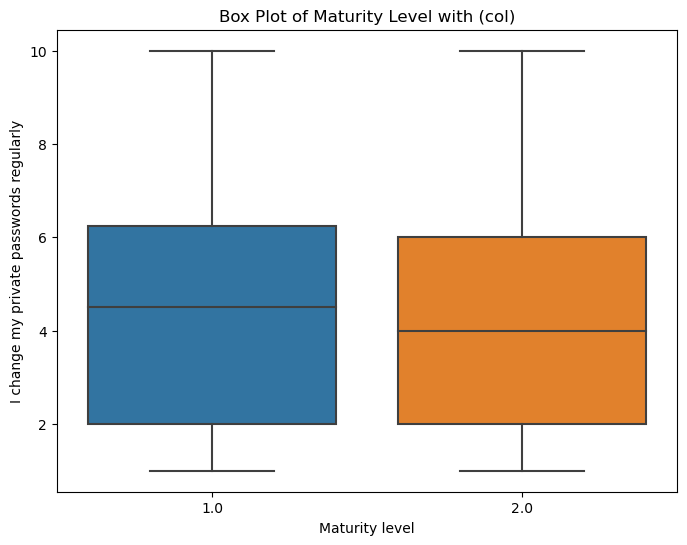

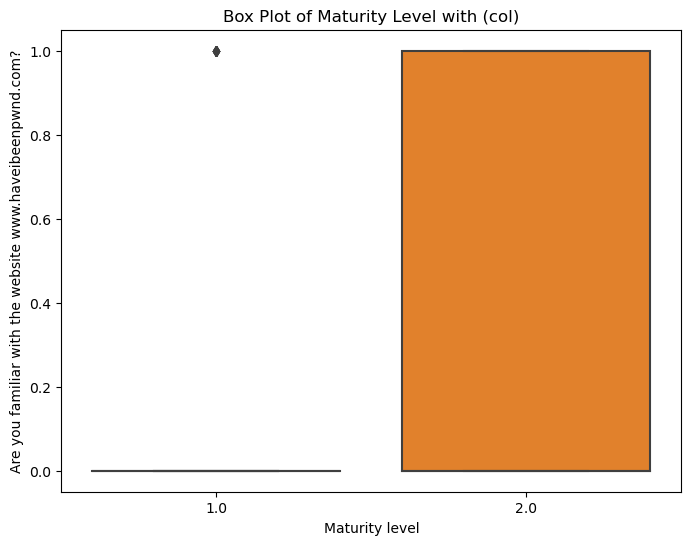

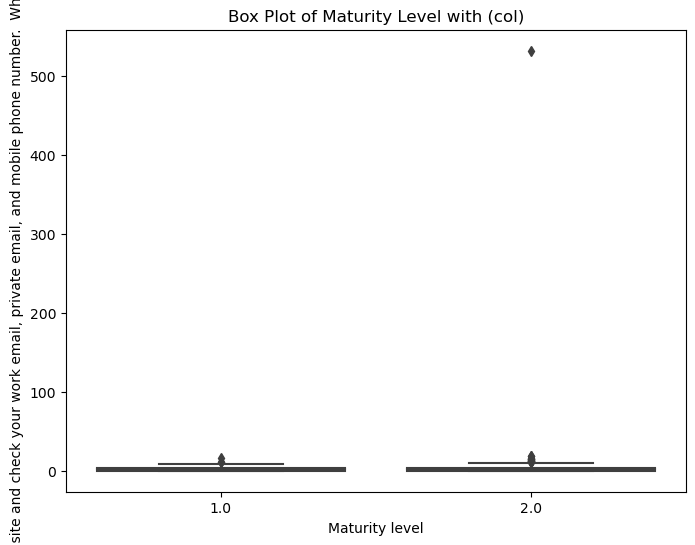

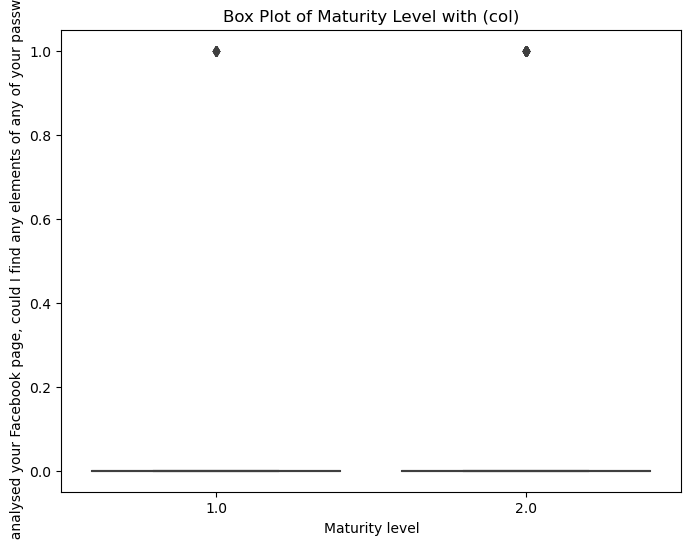

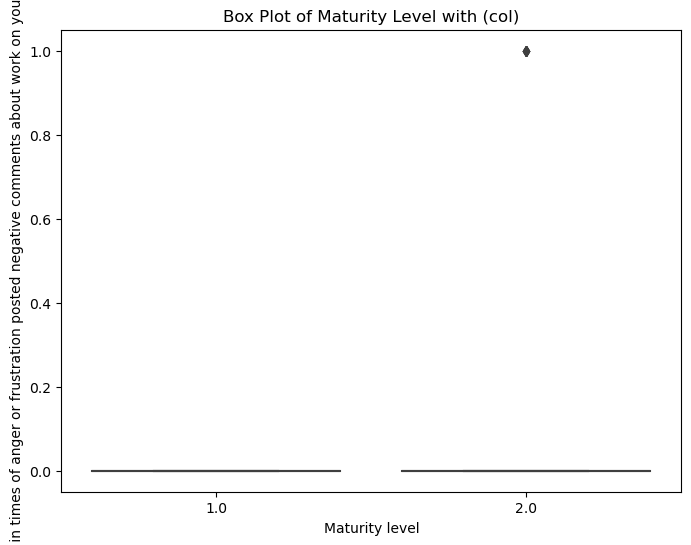

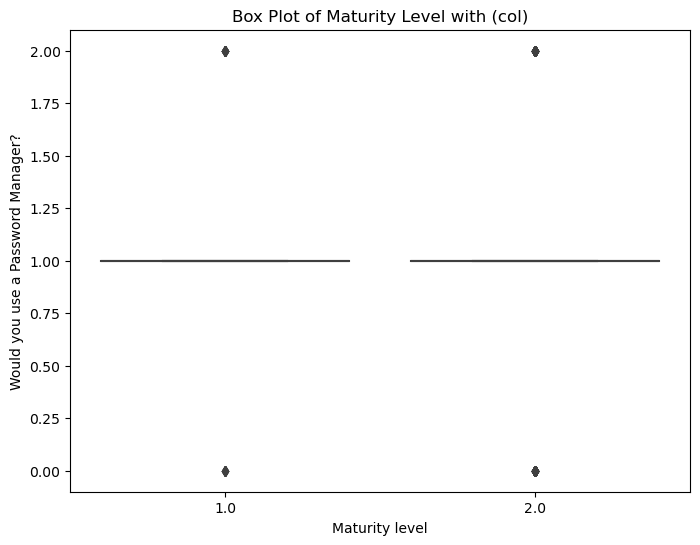

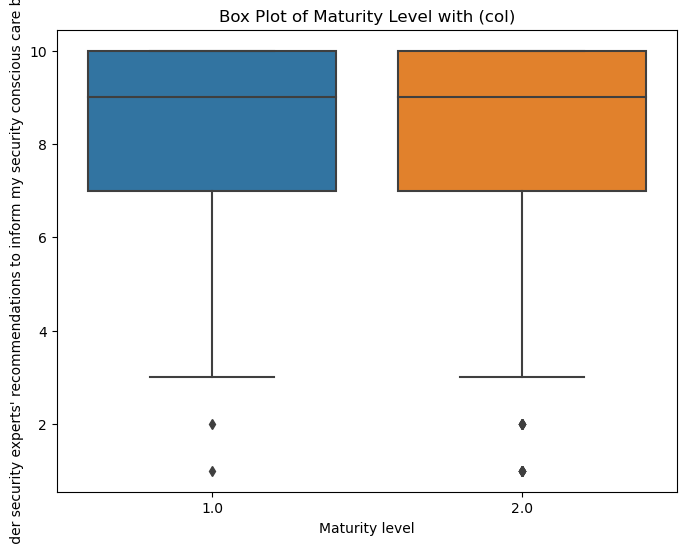

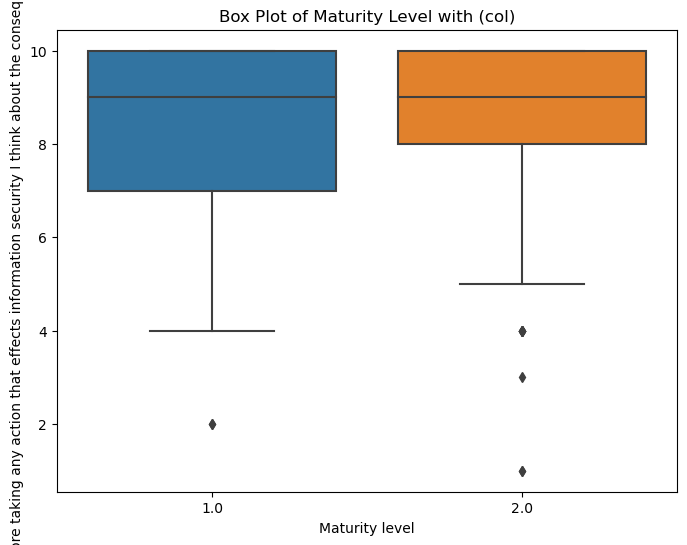

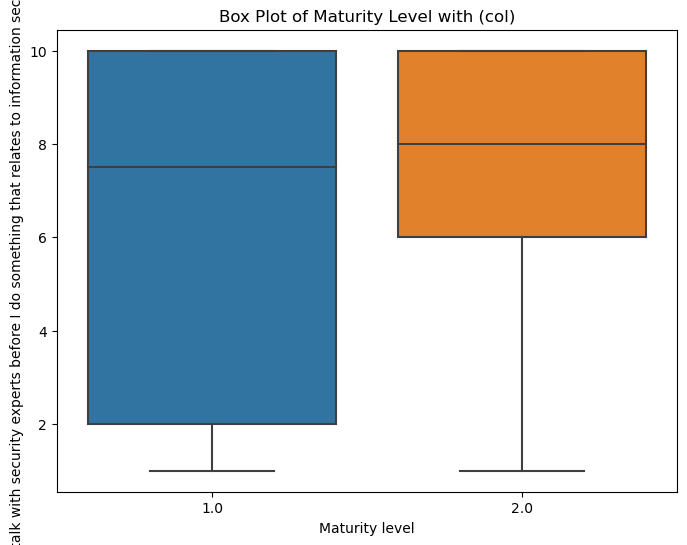

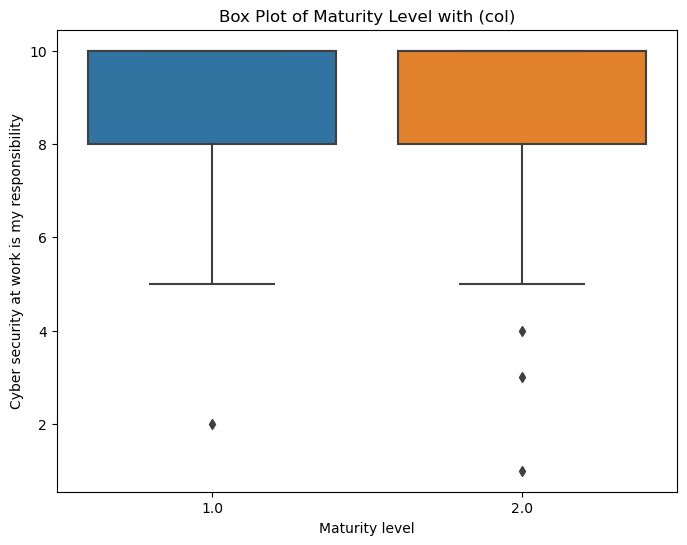

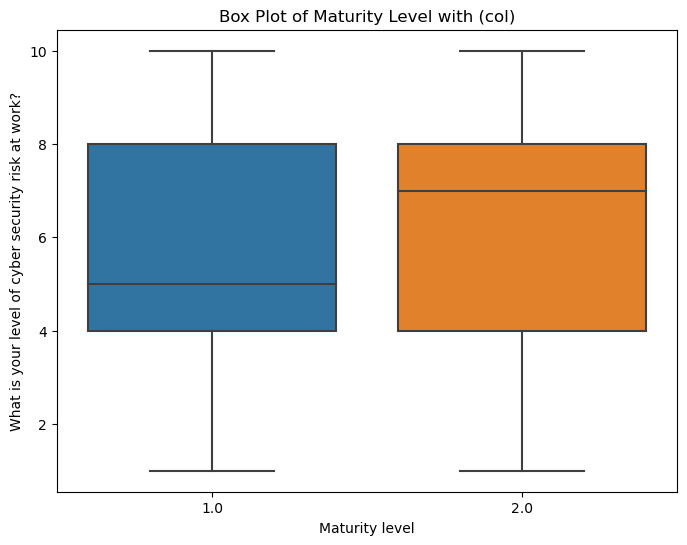

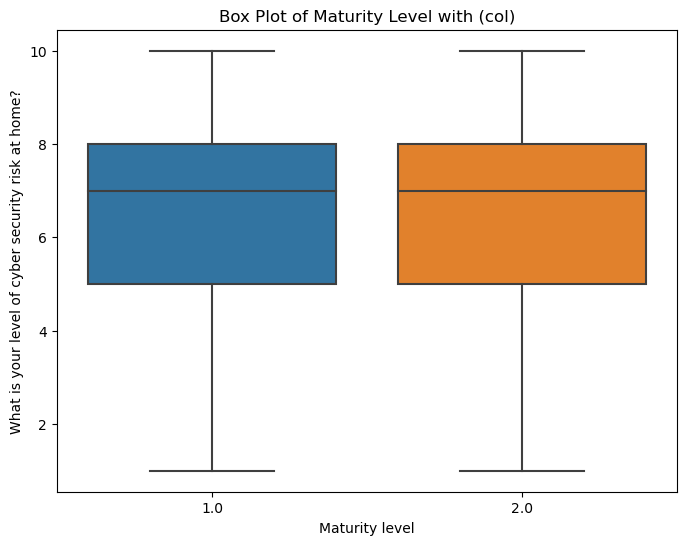

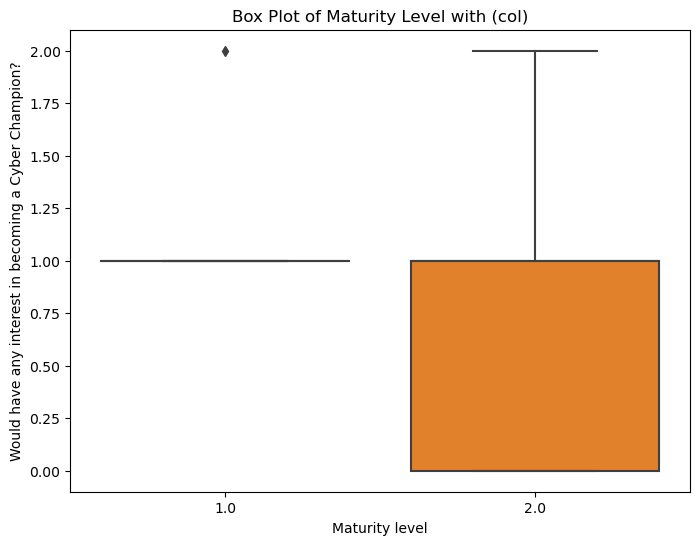

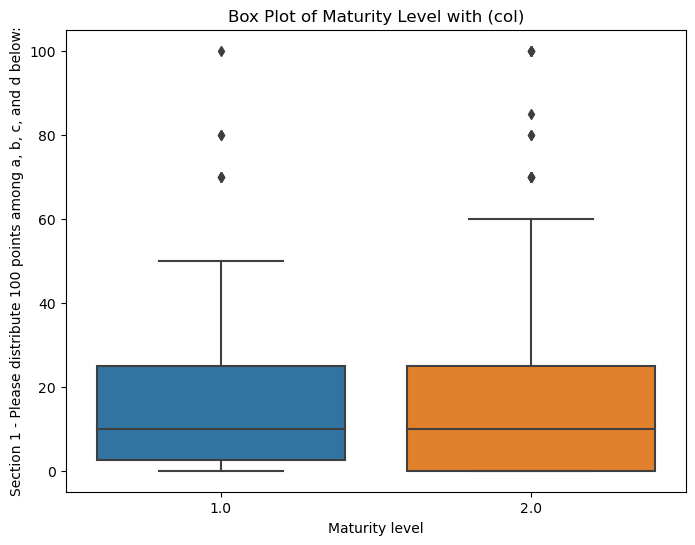

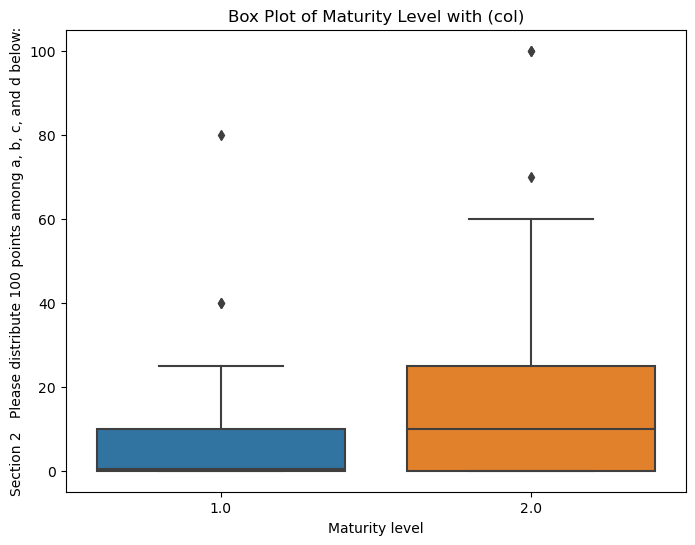

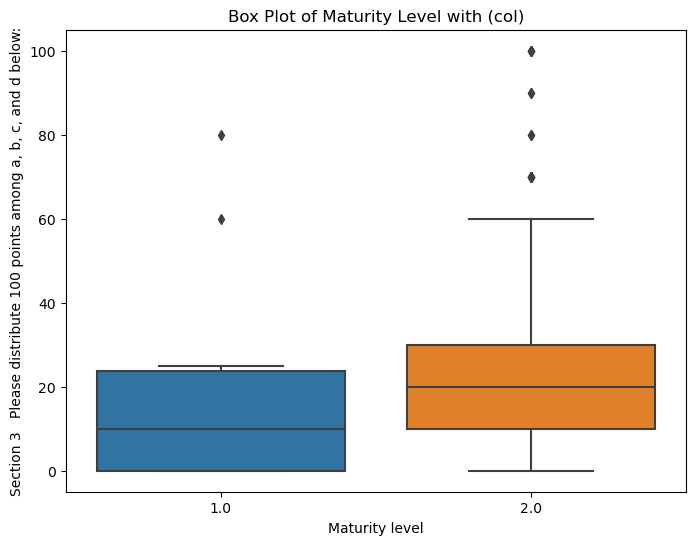

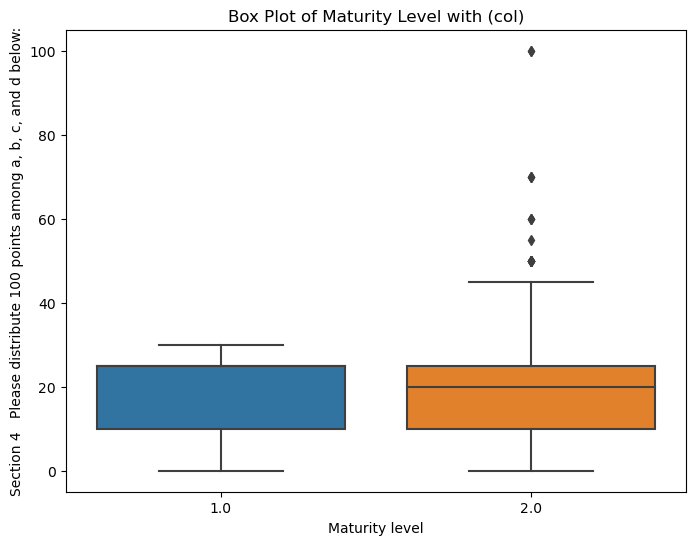

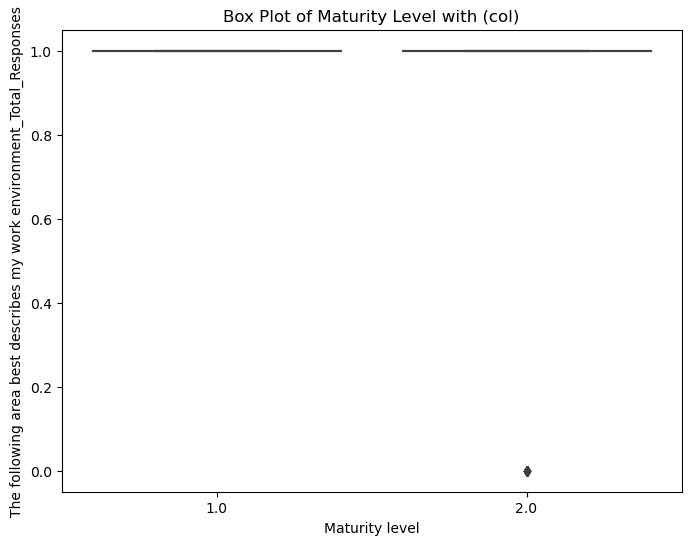

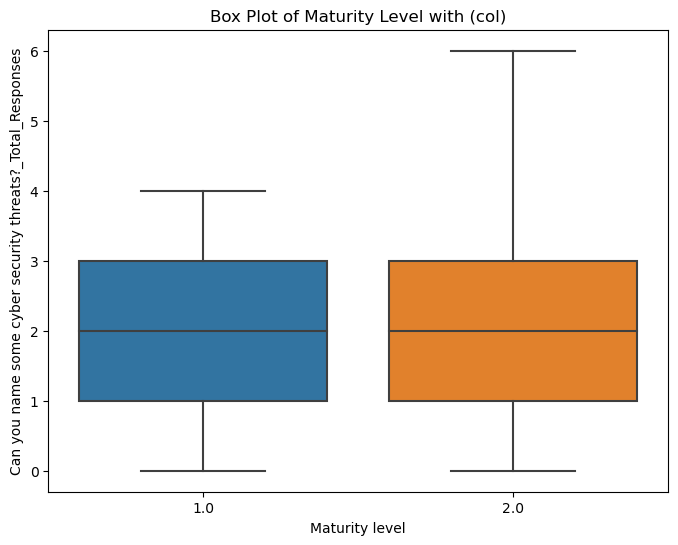

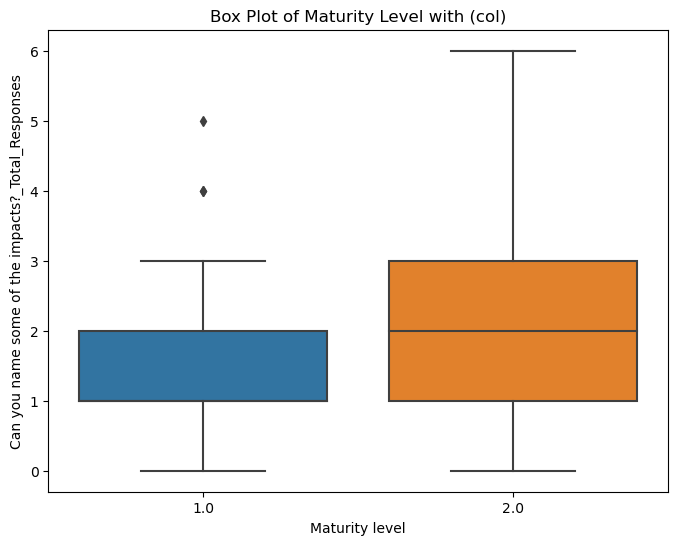

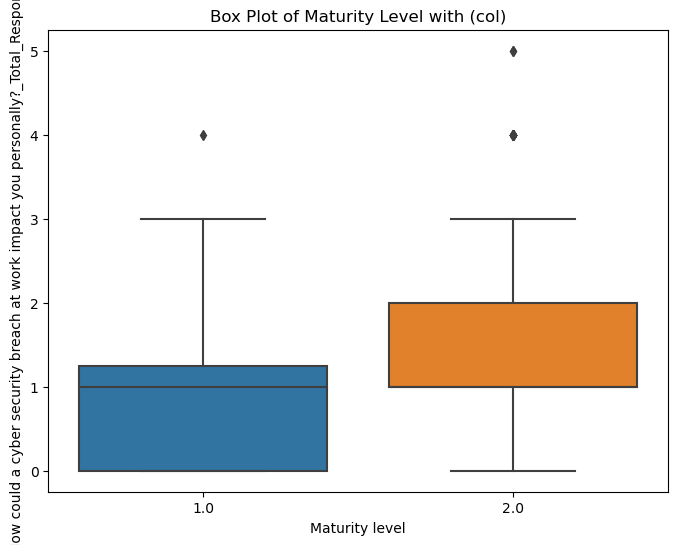

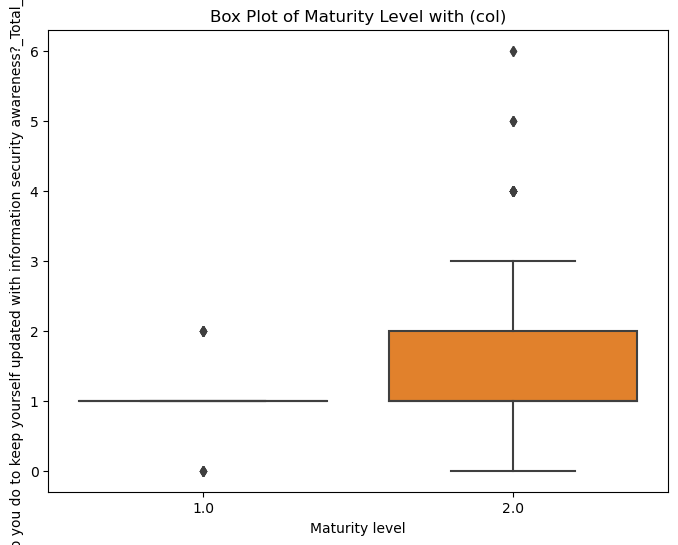

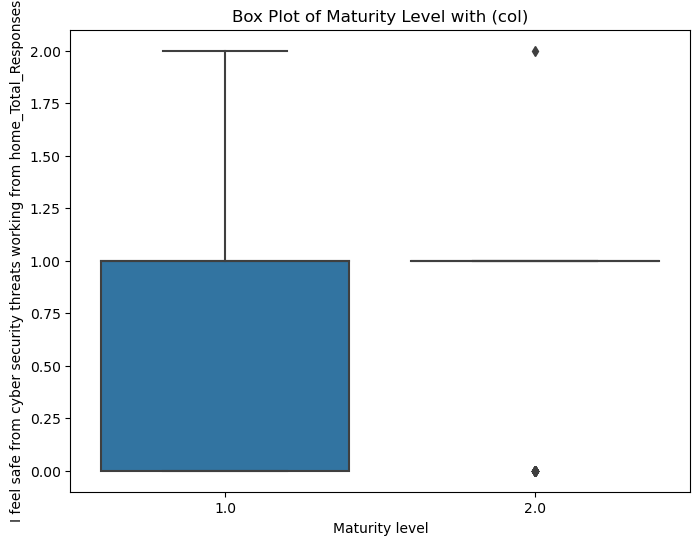

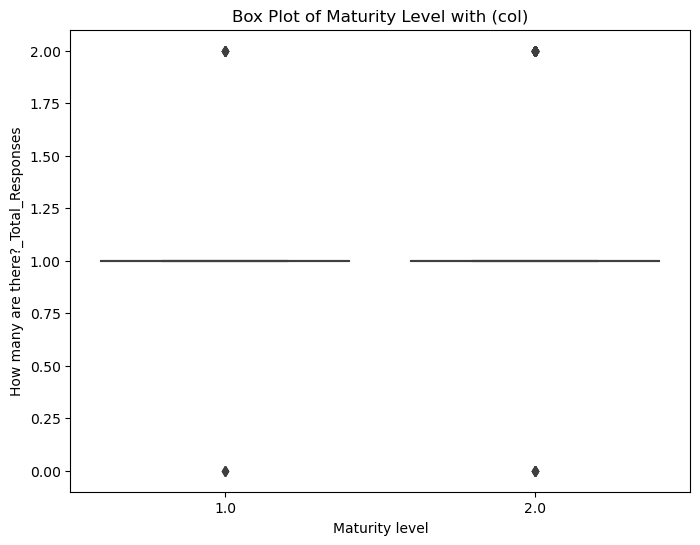

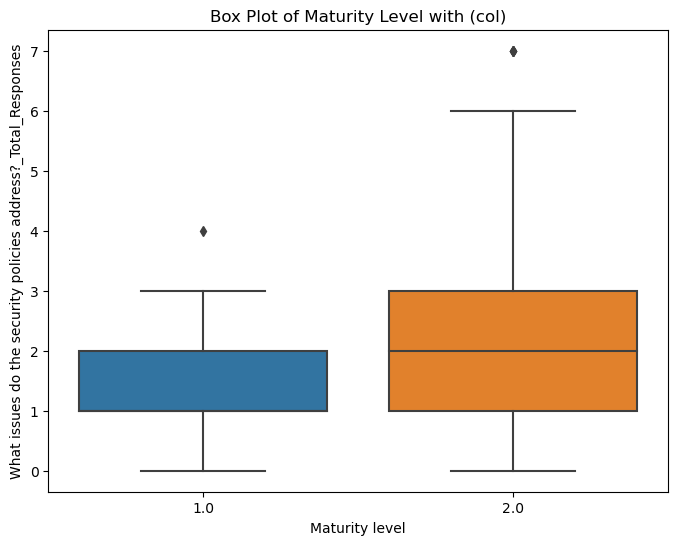

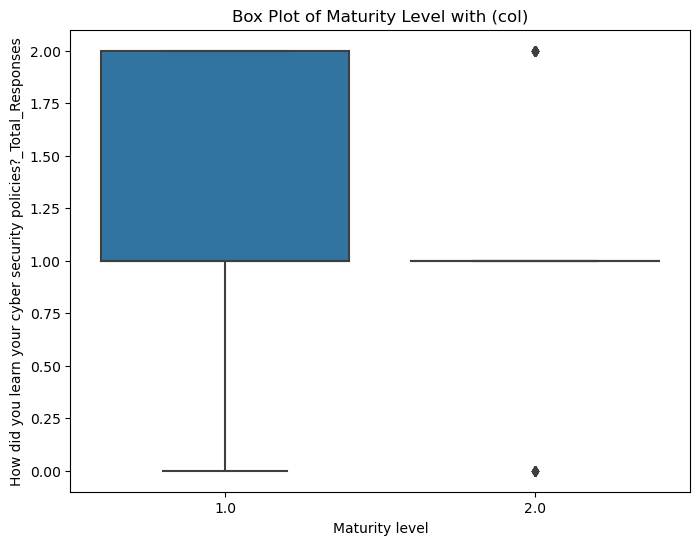

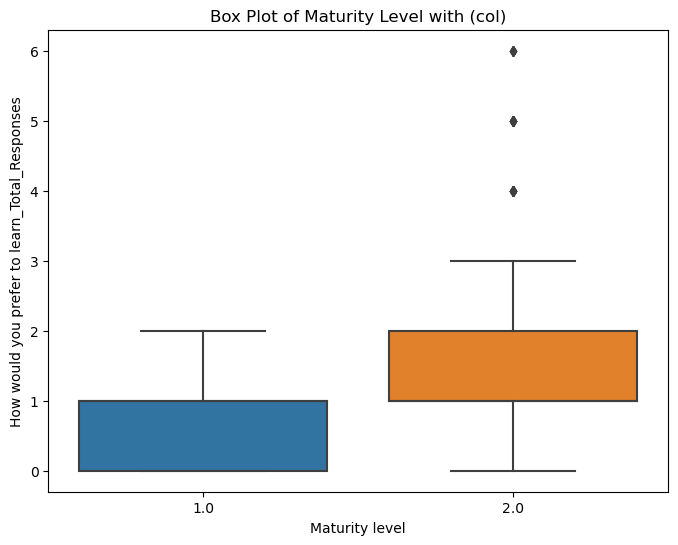

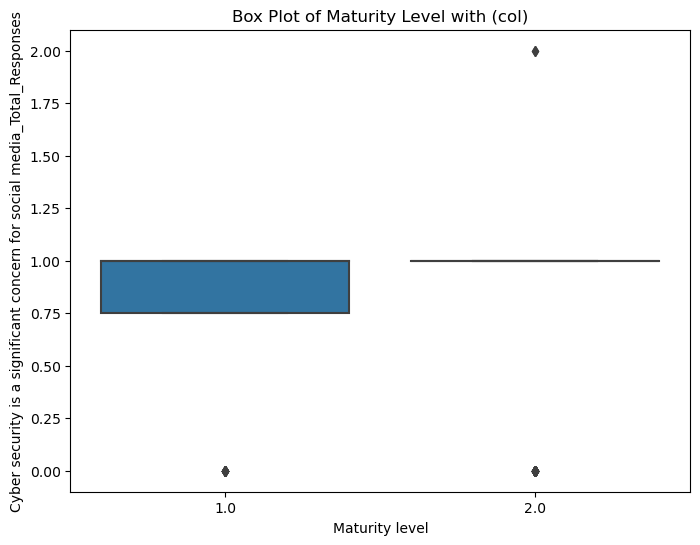

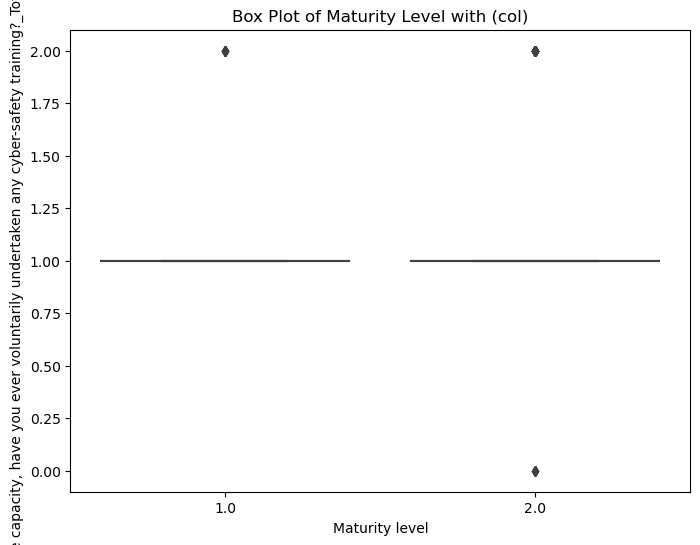

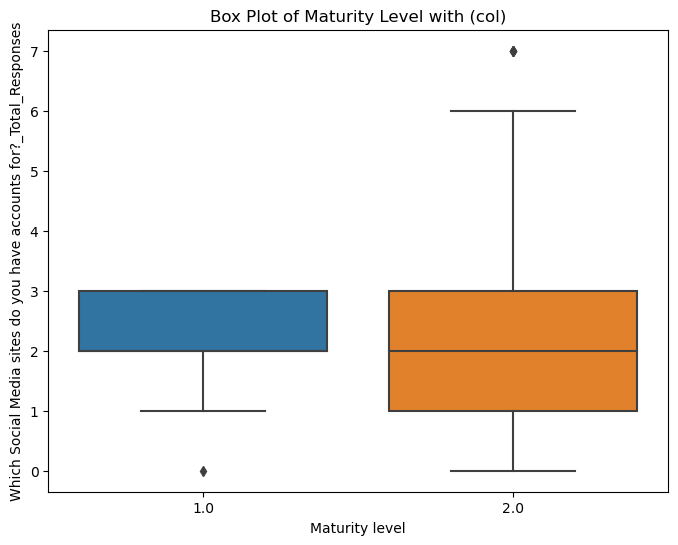

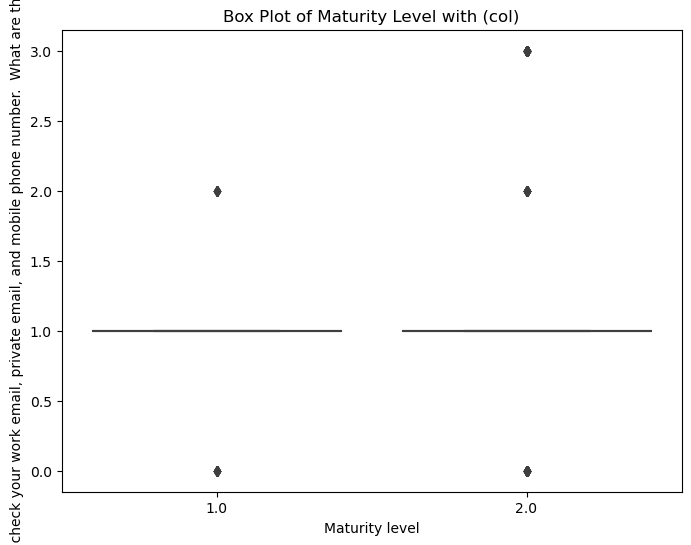

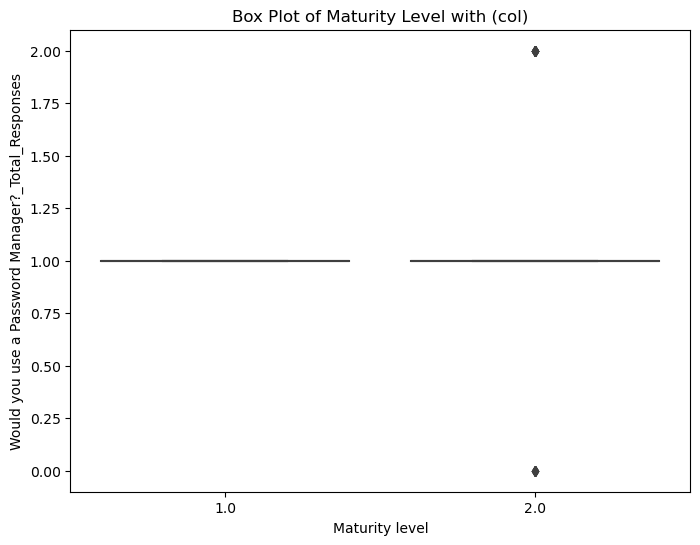

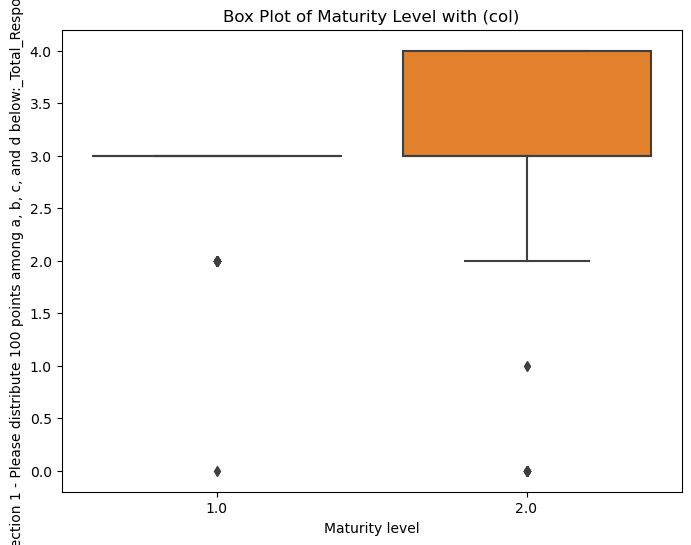

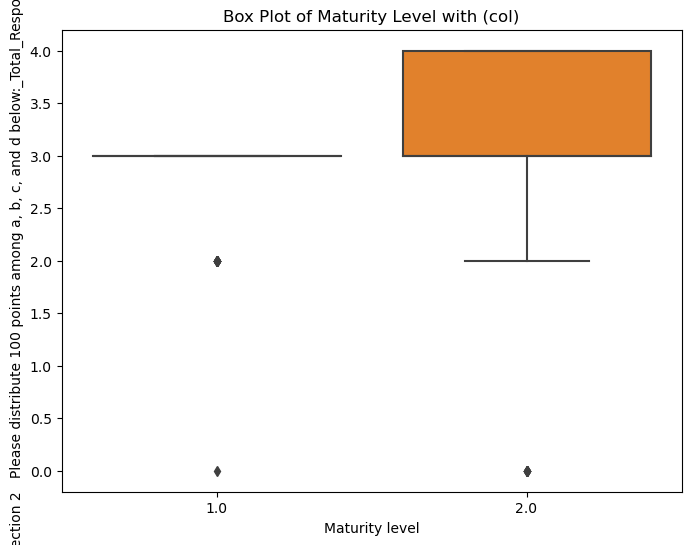

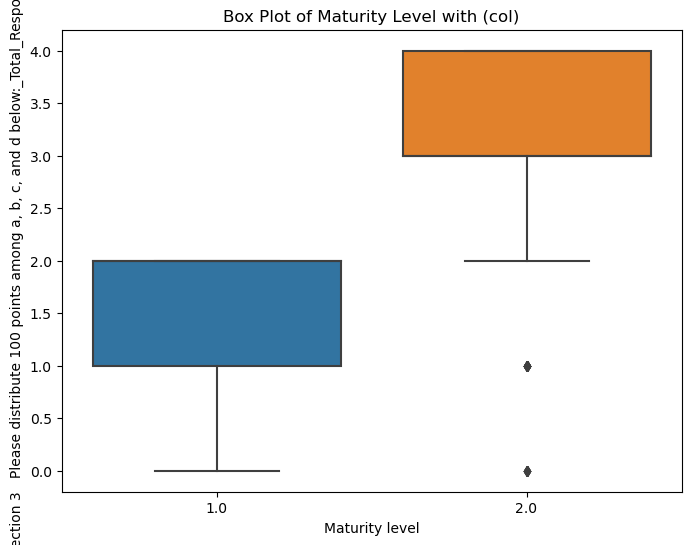

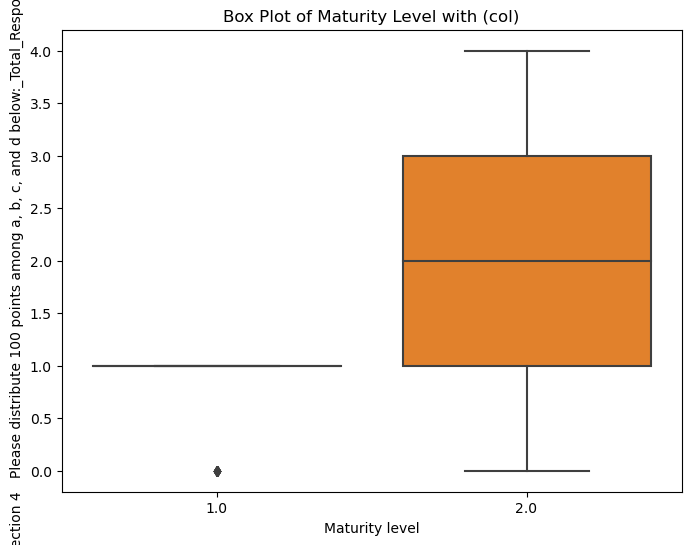

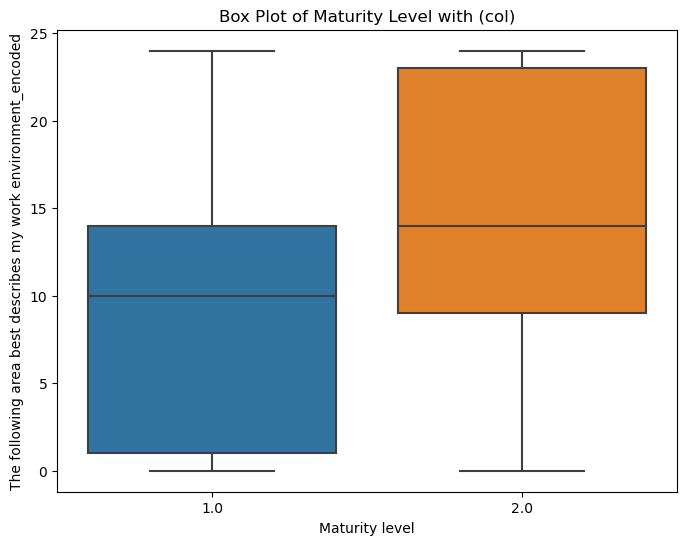

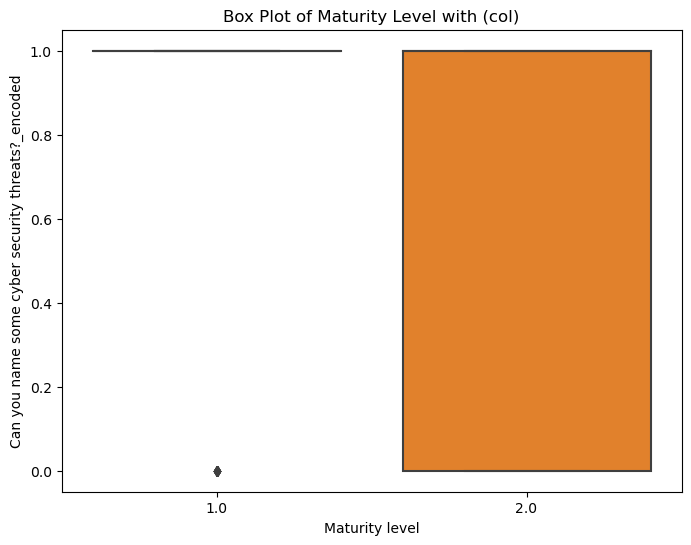

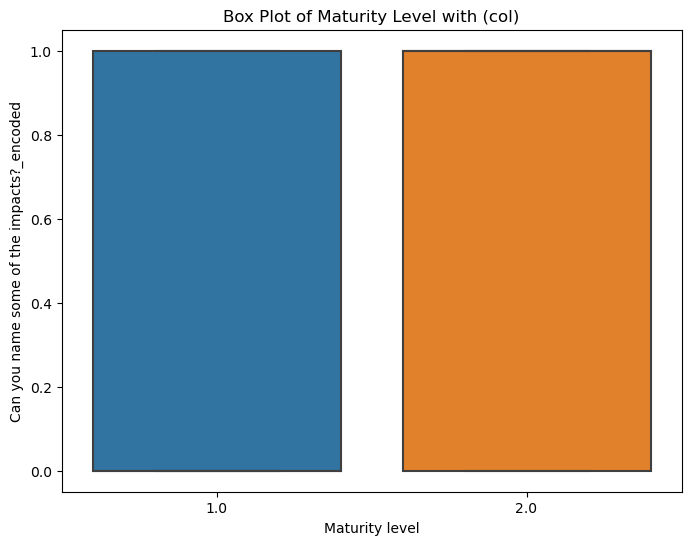

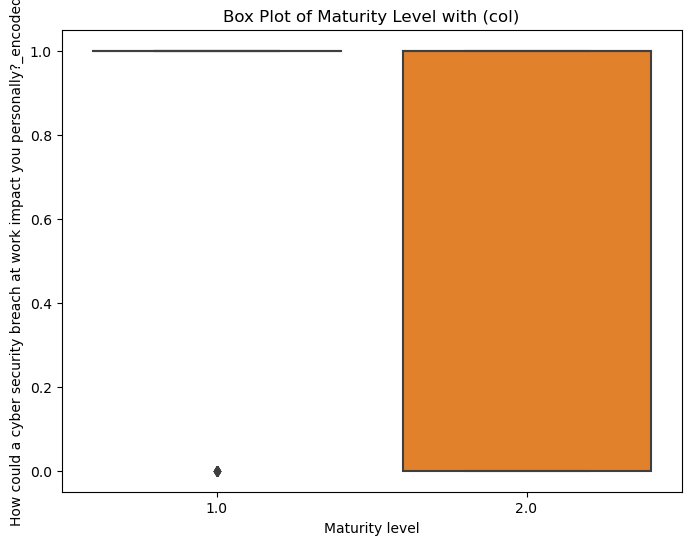

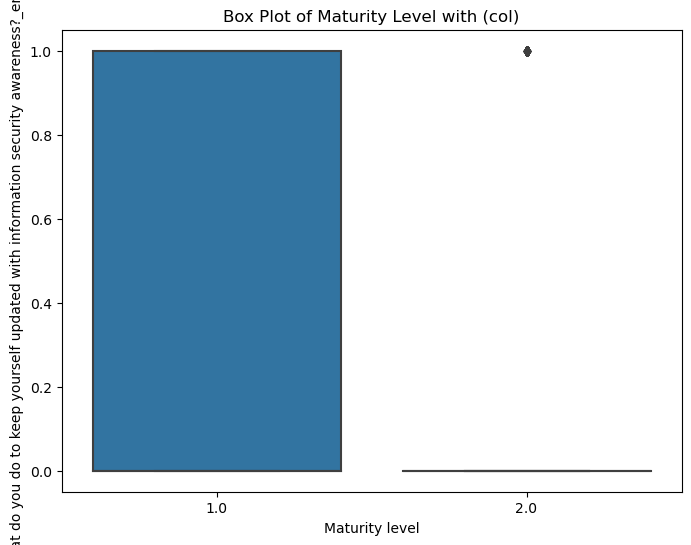

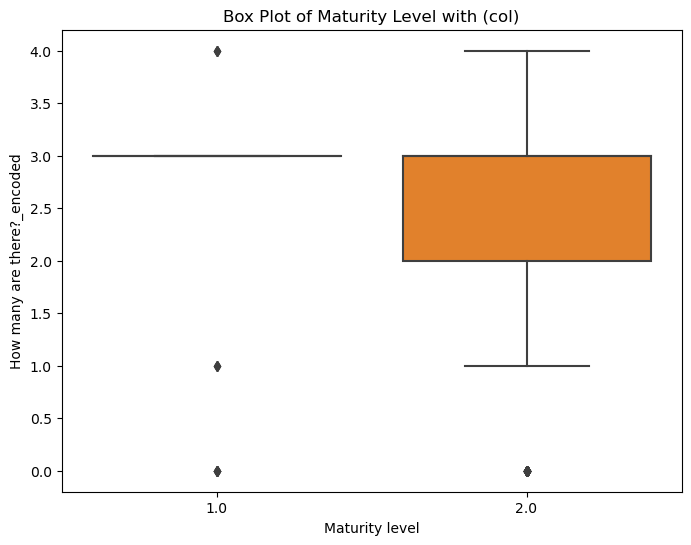

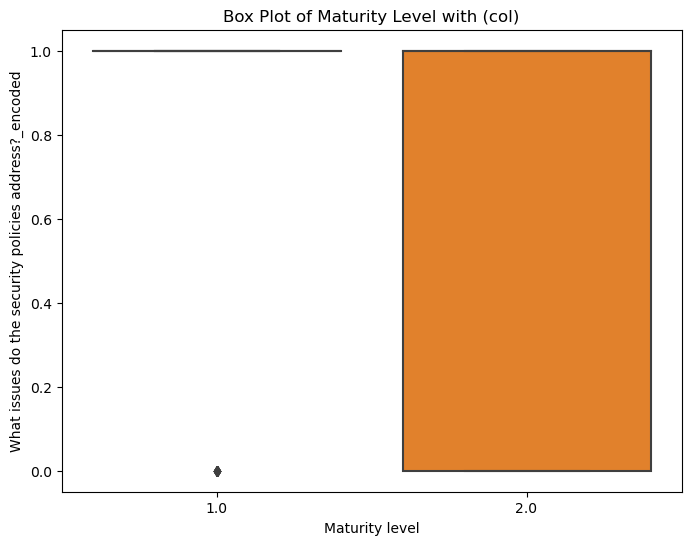

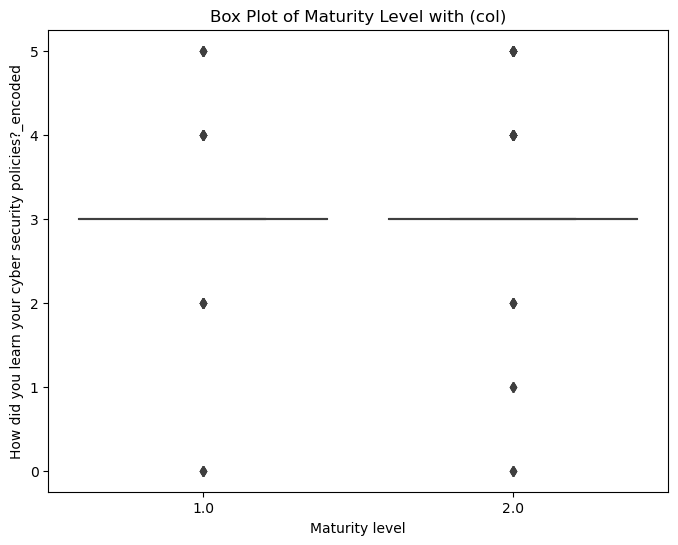

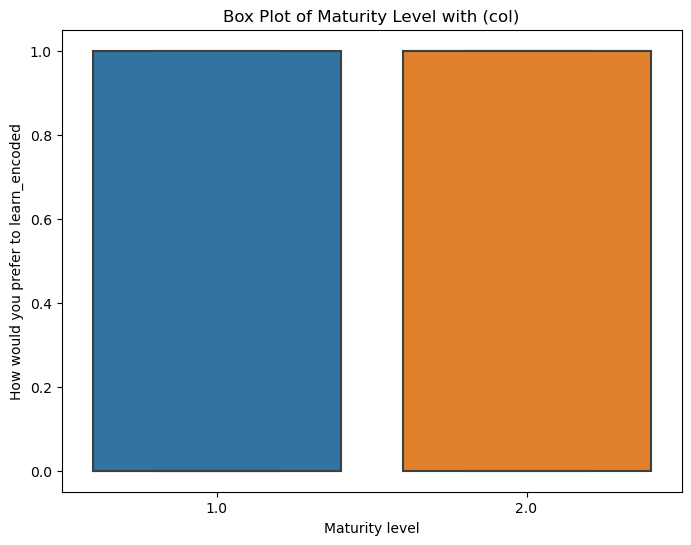

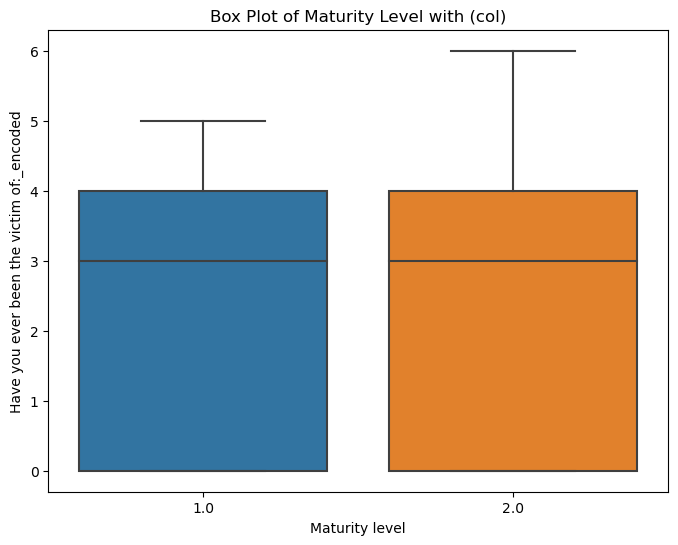

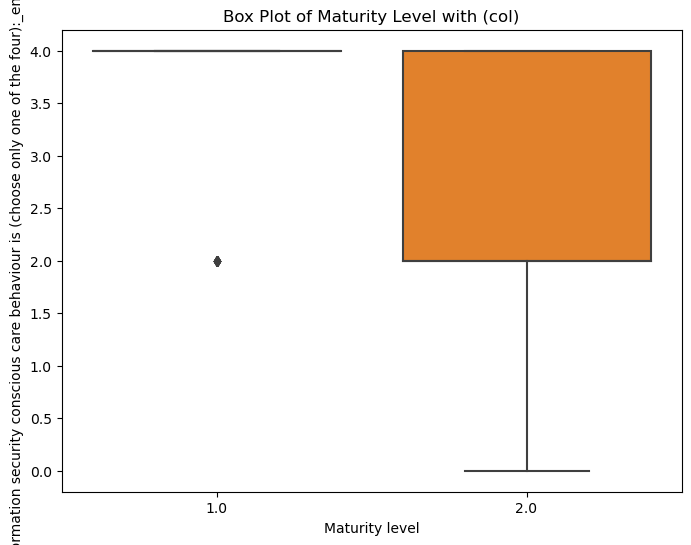

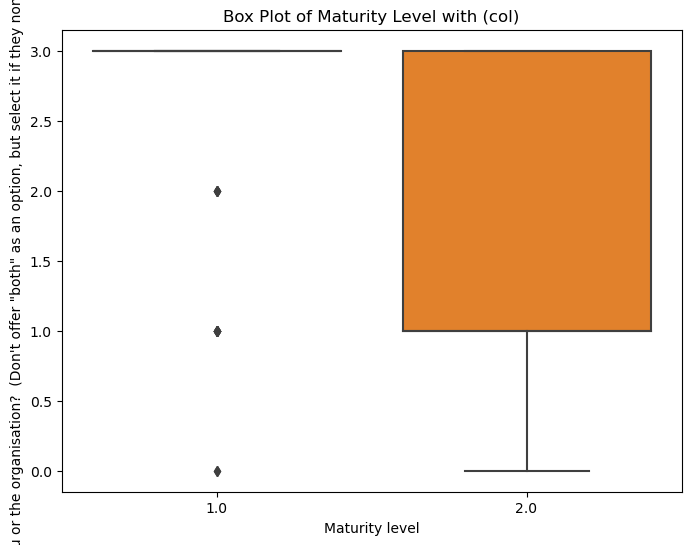

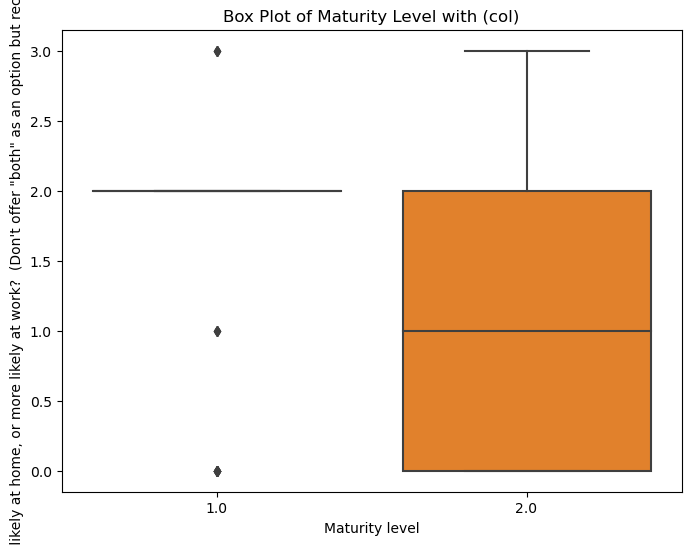

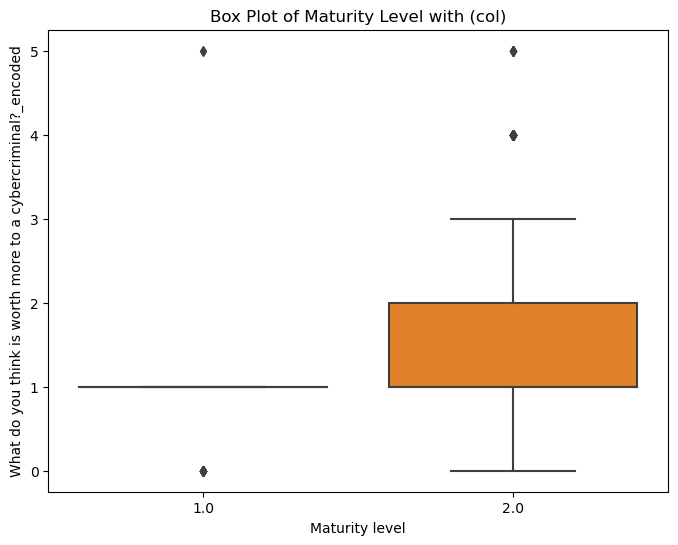

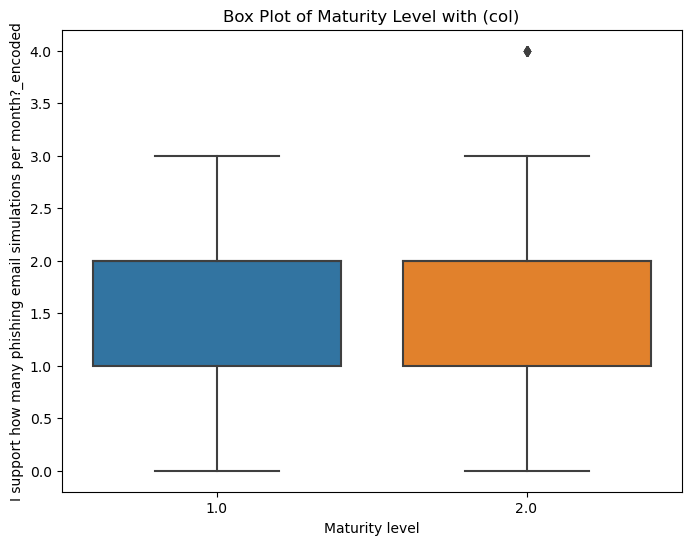

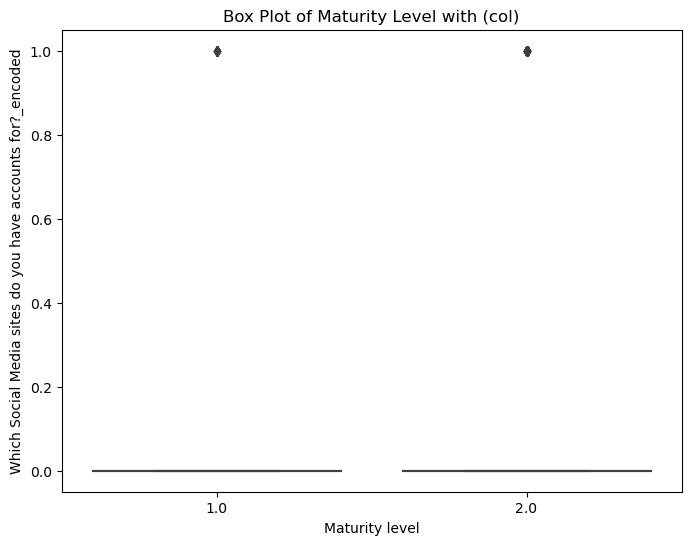

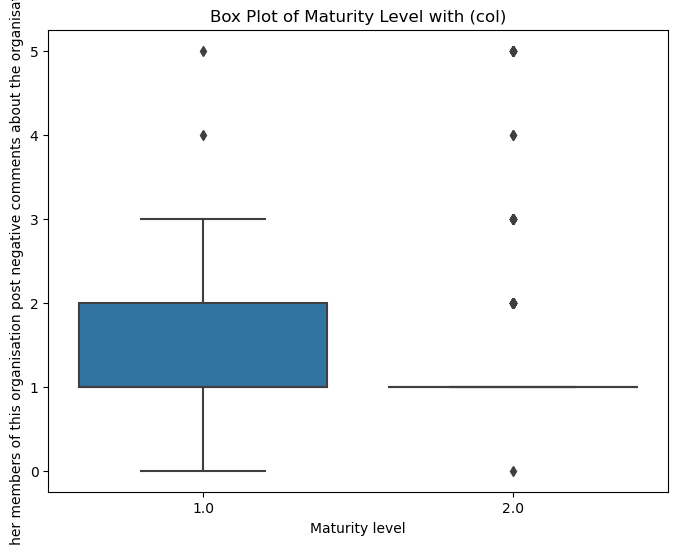

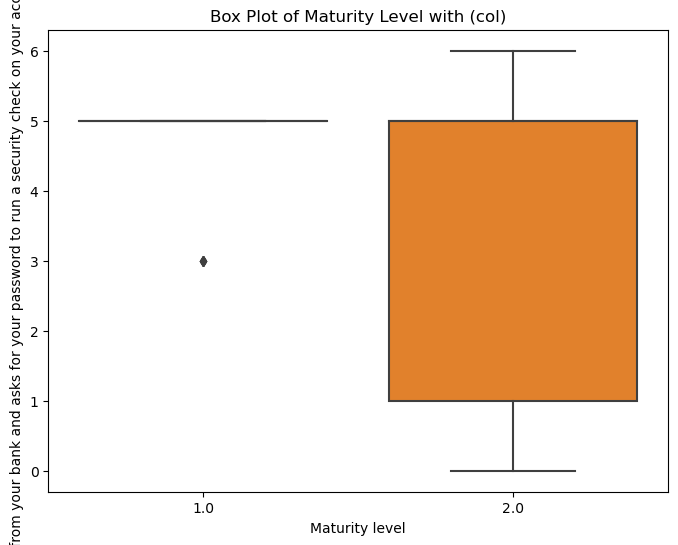

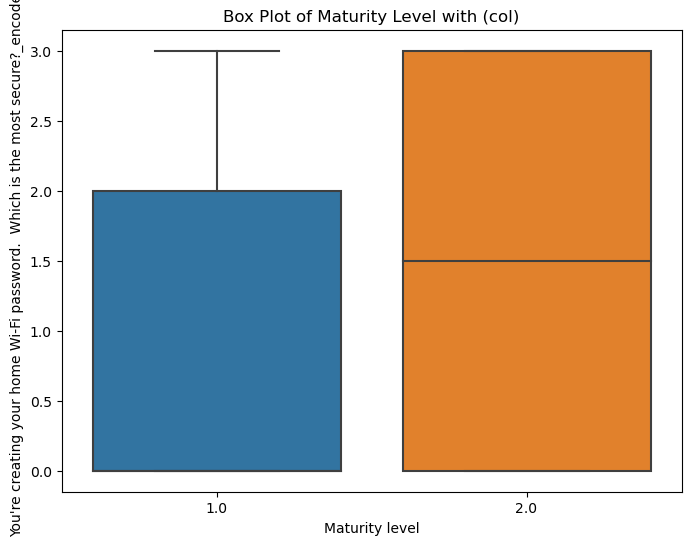

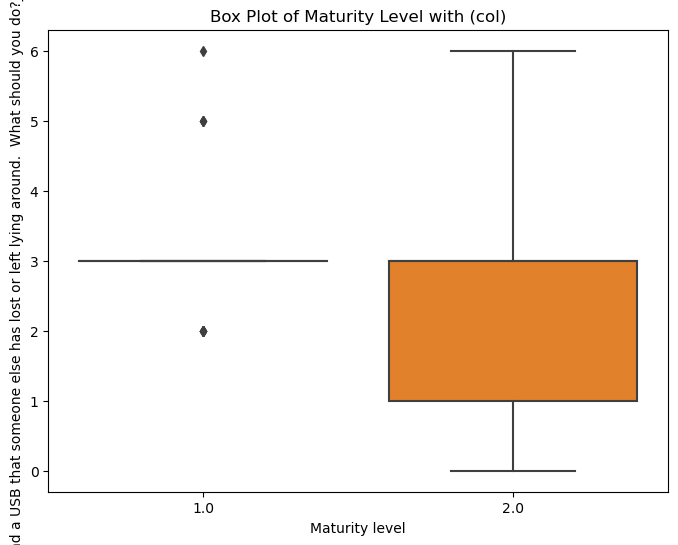

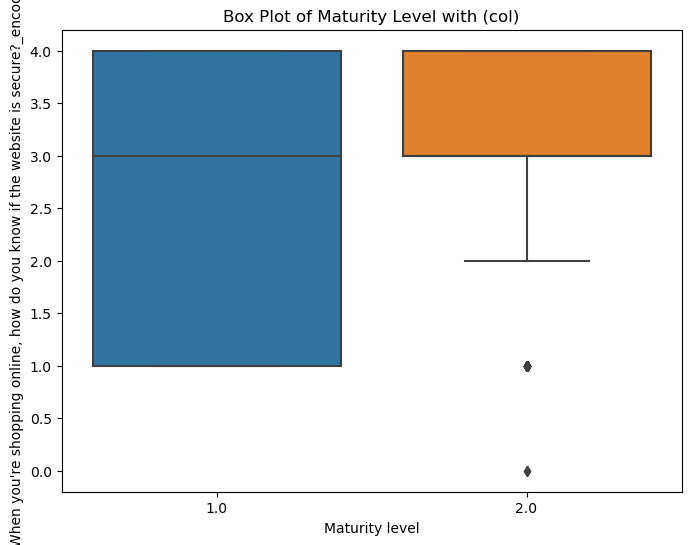

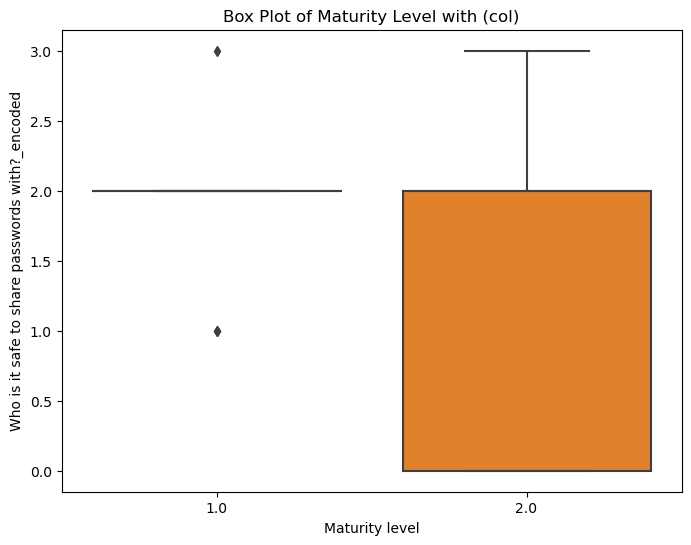

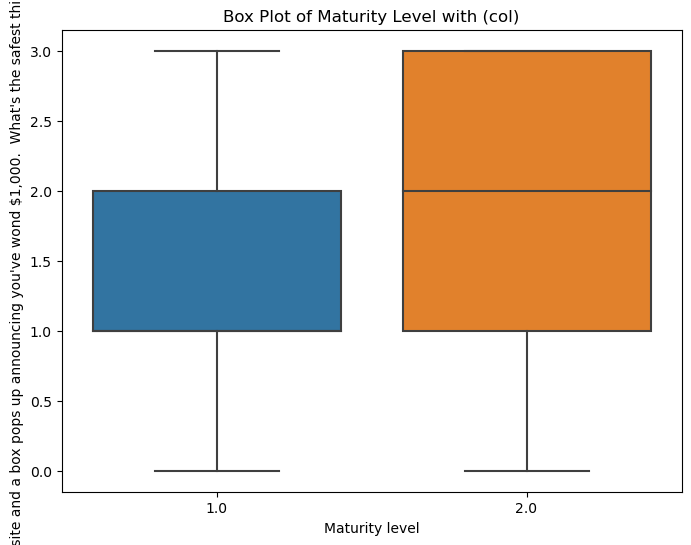

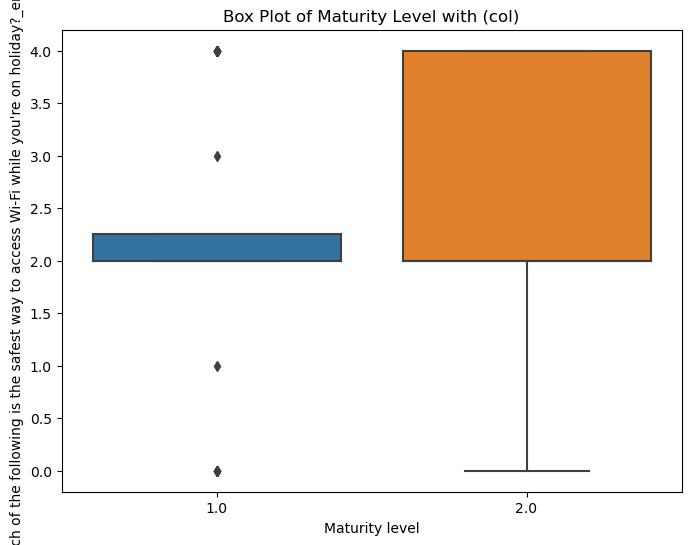

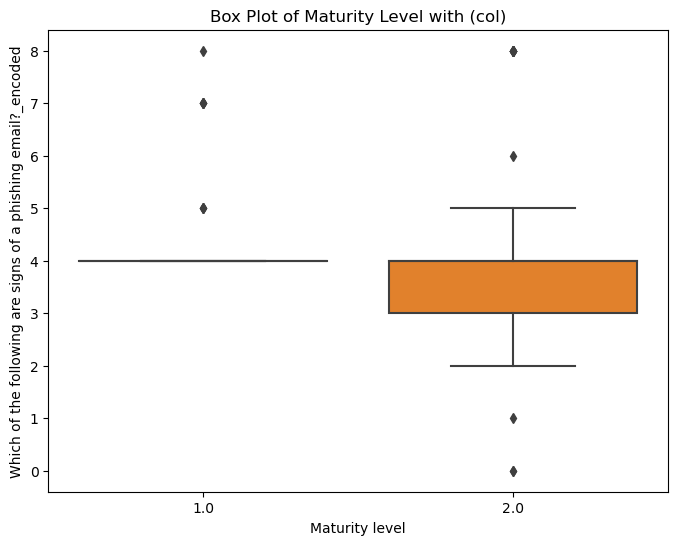

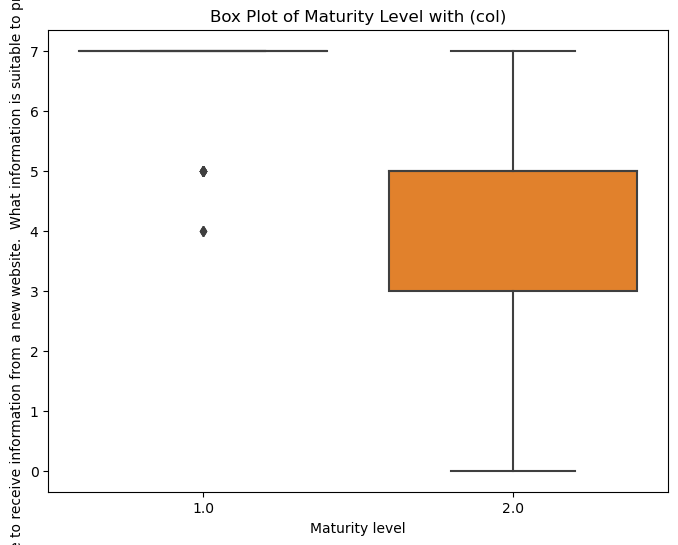

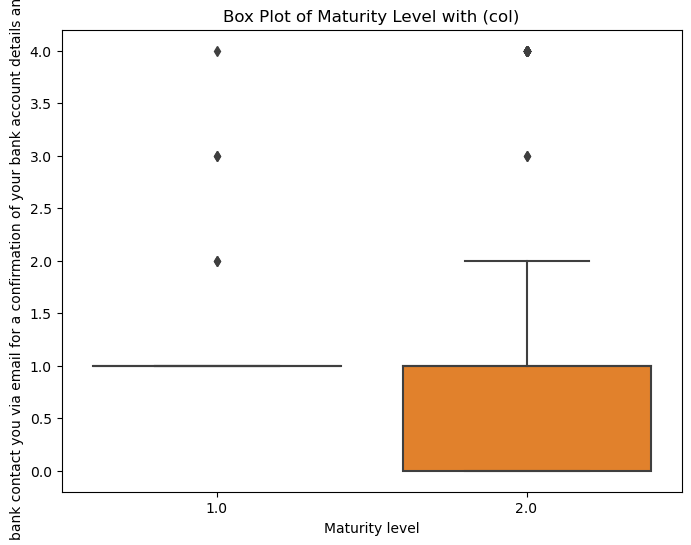

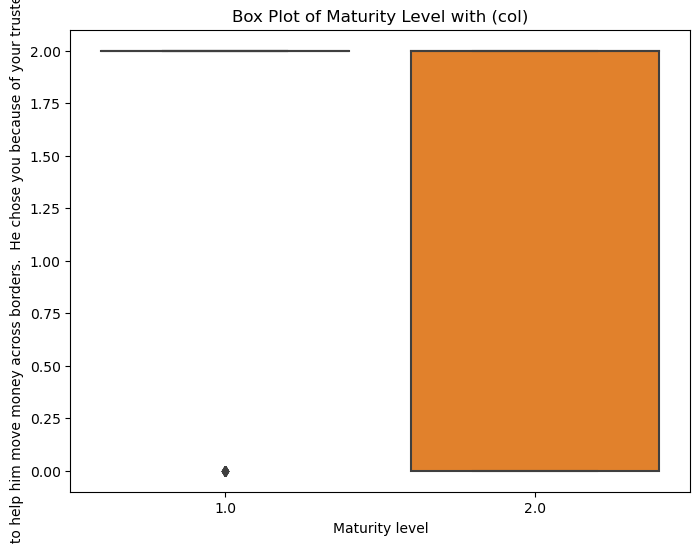

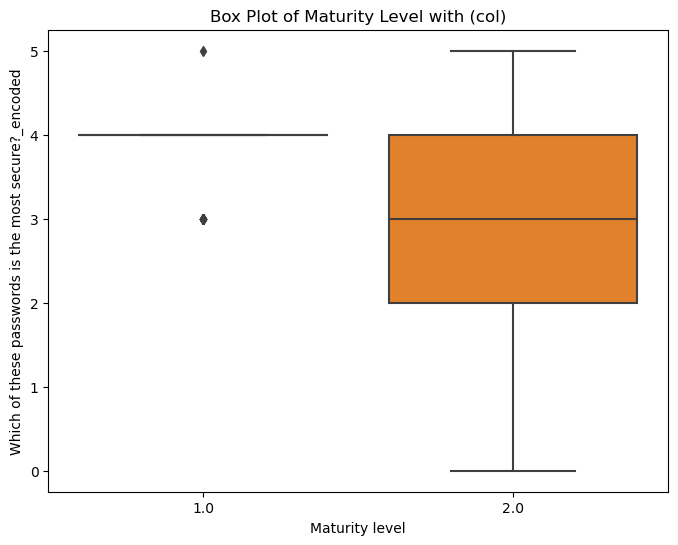

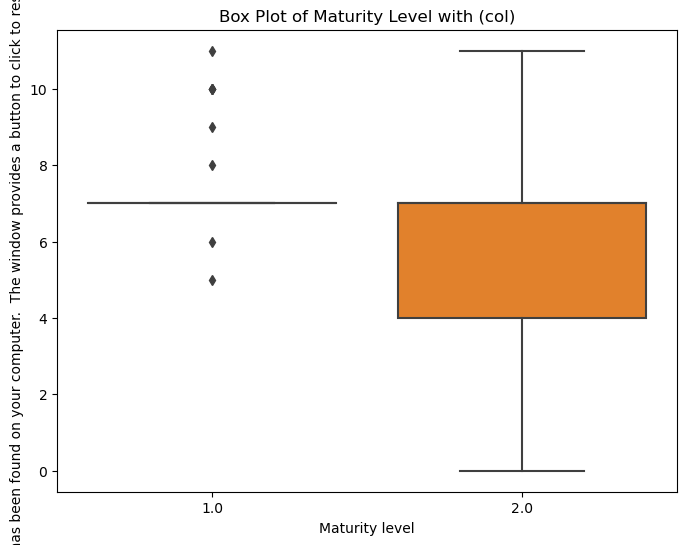

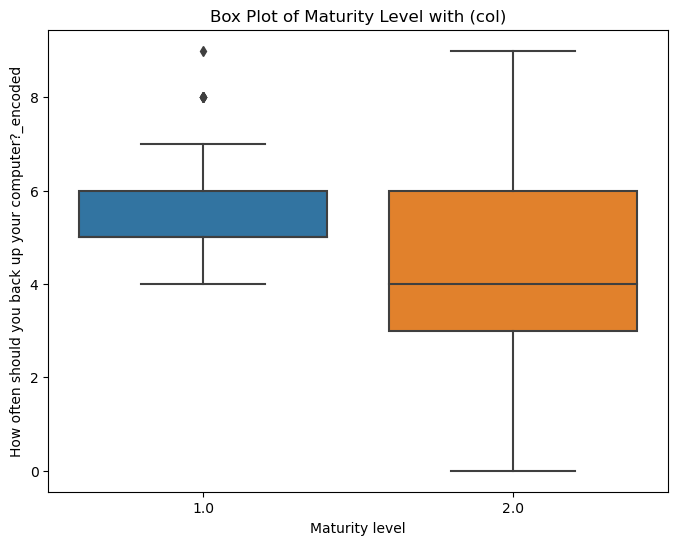

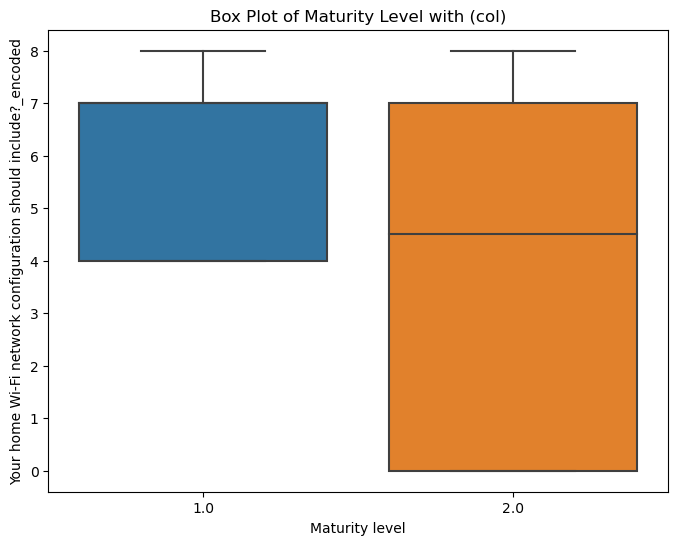

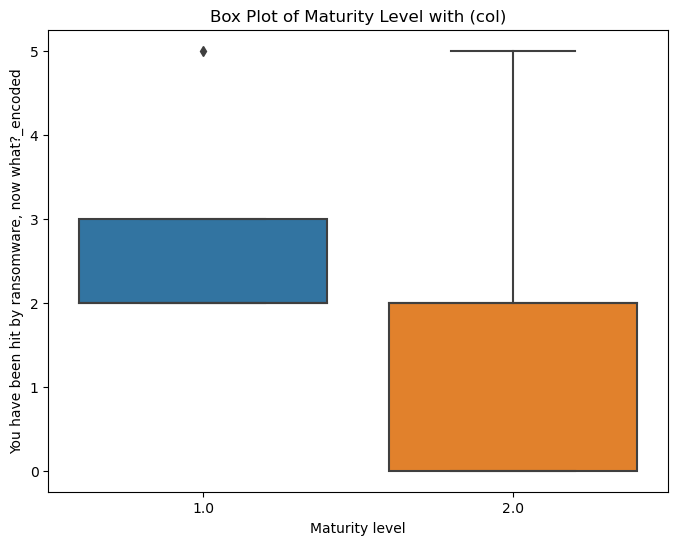

In [62]:
# Box plot to explore relationships between target variable(maturity level) and other variables
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Maturity level', y=col, data=df_cleaned)
    plt.title('Box Plot of Maturity Level with (col)')
    plt.show()



### Normalization 

In [79]:
df_normalization = df_only_encoded.copy()
df_normalization

Org  Maturity level  I have completed my mandatory cyber safety training  \
1      1             2.0                                                1.0     
2      1             2.0                                                1.0     
3      1             2.0                                                1.0     
4      1             2.0                                                1.0     
5      1             2.0                                                1.0     
..   ...             ...                                                ...     
444   11             2.0                                                NaN     
445   11             2.0                                                NaN     
446   11             2.0                                                NaN     
447   11             2.0                                                NaN     
448   11             2.0                                                NaN     

     I have completed additional cyber security and safety training modules voluntarily  \
1                                                  0.0                                    
2                                                  0.0                                    
3                                                  0.0                                    
4                                                  0.0                                    
5                                                  0.0                                    
..                                                 ...                                    
444                                                NaN                                    
445                                                NaN                                    
446                                                NaN                                    
447                                                NaN                                    
448                                                NaN                                    

     I am aware of potential cyber security threats  \
1                                               7.0   
2                                              10.0   
3                                               8.0   
4                                              10.0   
5                                              10.0   
..                                              ...   
444                                             9.0   
445                                             9.0   
446                                             9.0   
447                                             5.0   
448                                             8.0   

     I am aware of the potential impacts upon the organisation  \
1                                                  6.0           
2                                                  8.0           
3                                                  9.0           
4                                                  4.0           
5                                                 10.0           
..                                                 ...           
444                                                NaN           
445                                                NaN           
446                                                NaN           
447                                                NaN           
448                                                NaN           

     A cyber security breach at work will impact me personally  \
1                                                  6.0           
2                                                  5.0           
3                                                  6.0           
4                                                  5.0           
5                                                 10.0           
..                                                 ...           
444                    

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Step 2: Normalize the imputed data
scaler = MinMaxScaler()
# Apply Standardization to all columns
df_standardized = pd.DataFrame(scaler.fit_transform(df_normalization), columns=df_normalization.columns)


In [81]:

# Display the standardized DataFrame
df_standardized

Org  Maturity level  I have completed my mandatory cyber safety training  \
0    0.0             1.0                                                1.0     
1    0.0             1.0                                                1.0     
2    0.0             1.0                                                1.0     
3    0.0             1.0                                                1.0     
4    0.0             1.0                                                1.0     
..   ...             ...                                                ...     
431  1.0             1.0                                                NaN     
432  1.0             1.0                                                NaN     
433  1.0             1.0                                                NaN     
434  1.0             1.0                                                NaN     
435  1.0             1.0                                                NaN     

     I have completed additional cyber security and safety training modules voluntarily  \
0                                                  0.0                                    
1                                                  0.0                                    
2                                                  0.0                                    
3                                                  0.0                                    
4                                                  0.0                                    
..                                                 ...                                    
431                                                NaN                                    
432                                                NaN                                    
433                                                NaN                                    
434                                                NaN                                    
435                                                NaN                                    

     I am aware of potential cyber security threats  \
0                                          0.666667   
1                                          1.000000   
2                                          0.777778   
3                                          1.000000   
4                                          1.000000   
..                                              ...   
431                                        0.888889   
432                                        0.888889   
433                                        0.888889   
434                                        0.444444   
435                                        0.777778   

     I am aware of the potential impacts upon the organisation  \
0                                             0.555556           
1                                             0.777778           
2                                             0.888889           
3                                             0.333333           
4                                             1.000000           
..                                                 ...           
431                                                NaN           
432                                                NaN           
433                                                NaN           
434                                                NaN           
435                                                NaN           

     A cyber security breach at work will impact me personally  \
0                                             0.555556           
1                                             0.444444           
2                                             0.555556           
3                                             0.444444           
4                                             1.000000           
..                                                 ...           
431                    

In [89]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming df_standardized is your DataFrame after initial preprocessing

# Split data into features and target
X = df_standardized.drop(columns=['Maturity level', 'Org'])
y = df_standardized['Maturity level']

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Impute missing values in features

# Step 2: Normalize the imputed data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_imputed)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Step 5: Get feature importances
importances = rf.feature_importances_

# Step 6: Create a DataFrame to hold feature names and their importance scores
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display the top features based on importance
print("Top selected features based on importance:")
feature_importances


Top selected features based on importance:


feature  importance
95   Section 3   Please distribute 100 points among...    0.190899
13                    Do you sometimes work from home?    0.061011
122  You want to subscribe to receive information f...    0.037357
96   Section 4   Please distribute 100 points among...    0.035080
93   Section 1 - Please distribute 100 points among...    0.032368
..                                                 ...         ...
64   If I analysed your Facebook page, could I find...    0.000552
78   The following area best describes my work envi...    0.000439
101  What do you do to keep yourself updated with i...    0.000425
92   Would you use a Password Manager?_Total_Responses    0.000342
65   Have you ever in times of anger or frustration...    0.000000

[130 rows x 2 columns]

In [97]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
# Step 2: Standardize the imputed data
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_imputed)
 
# Step 3: Apply PCA
pca = PCA(n_components=7)  # Number of components
X_pca = pca.fit_transform(X_selected_scaled)
 
# Step 4: Analyze the explained variance
explained_variance = pca.explained_variance_ratio_
 
 
# Display cumulative explained variance
cumulative_variance = explained_variance.cumsum()
print("Explained Variance Ratio by Components:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance Ratio by Components: [0.12069576 0.0821918  0.04380438 0.03443482 0.02725294 0.02333037
 0.02125694 0.01962825 0.01949346 0.01764022 0.01616615 0.01581025
 0.01508856 0.01478277 0.01351999]
Cumulative Explained Variance: [0.12069576 0.20288756 0.24669194 0.28112676 0.3083797  0.33171007
 0.35296702 0.37259526 0.39208872 0.40972895 0.4258951  0.44170535
 0.45679392 0.47157669 0.48509668]


Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.70      0.64        10
         1.0       0.96      0.94      0.95        78

    accuracy                           0.91        88
   macro avg       0.77      0.82      0.79        88
weighted avg       0.92      0.91      0.91        88



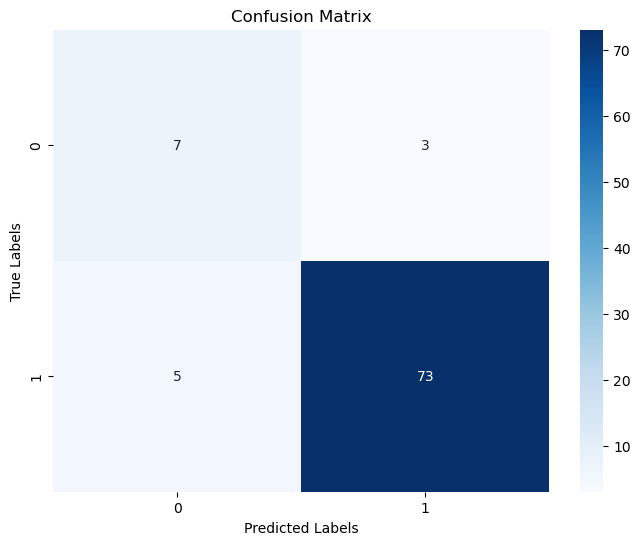

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 
# Assuming X_pca is the PCA-transformed data and y is the target variable
 
# Step 1: Train-test split on PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
 
# Step 2: Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
 
# Step 3: Make predictions and evaluate the model
y_pred = rf.predict(X_test)
 
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
 
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
 
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.80      0.70        10
         1.0       0.97      0.94      0.95        78

    accuracy                           0.92        88
   macro avg       0.79      0.87      0.82        88
weighted avg       0.93      0.92      0.92        88



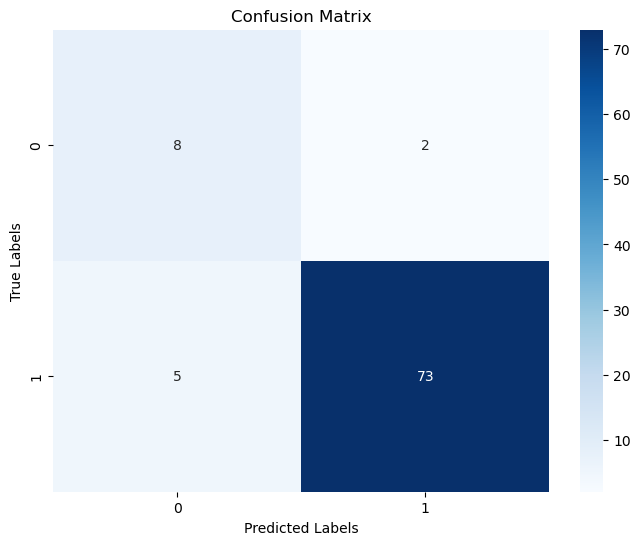

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 
# Assuming X_pca is the PCA-transformed data and y is the target variable
 
# Step 1: Train-test split on PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
 
# Step 2: Initialize and Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
 
# Step 3: Make predictions and evaluate the model
y_pred = knn.predict(X_test)
 
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
 
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
 
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.40      0.44        10
         1.0       0.93      0.95      0.94        78

    accuracy                           0.89        88
   macro avg       0.71      0.67      0.69        88
weighted avg       0.88      0.89      0.88        88



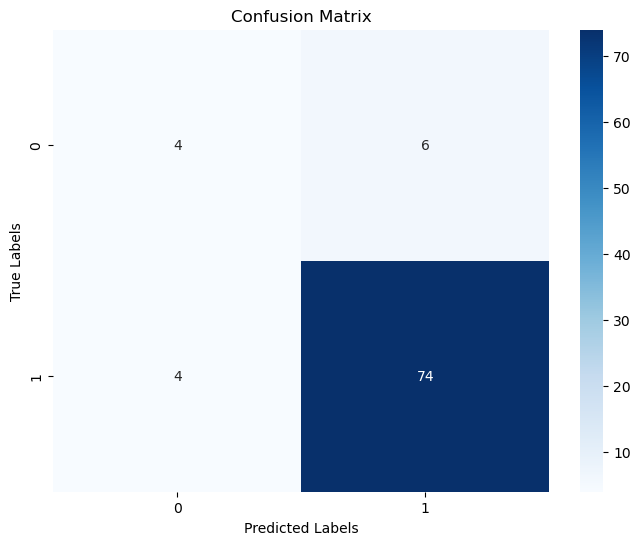

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 
# Assuming X_pca is the PCA-transformed data and y is the target variable
 
# Step 1: Train-test split on PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
 
# Step 2: Initialize and Train the Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
 
# Step 3: Make predictions and evaluate the model
y_pred = log_reg.predict(X_test)
 
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
 
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
 
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        10
         1.0       0.93      0.97      0.95        78

    accuracy                           0.91        88
   macro avg       0.80      0.69      0.73        88
weighted avg       0.90      0.91      0.90        88



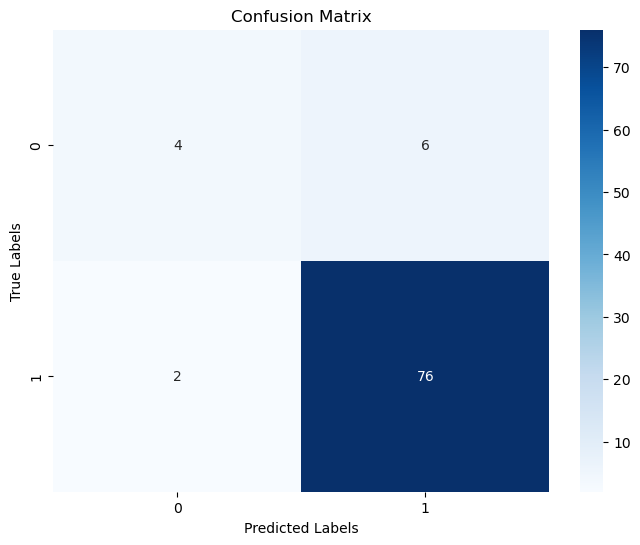

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 
# Assuming X_pca is the PCA-transformed data and y is the target variable
 
# Step 1: Train-test split on PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
 
# Step 2: Initialize and Train the SVM Model
svm_model = SVC(kernel='linear', random_state=42)  # You can try other kernels like 'rbf' or 'poly'
svm_model.fit(X_train, y_train)
 
# Step 3: Make predictions and evaluate the model
y_pred = svm_model.predict(X_test)
 
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
 
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
 
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        10
         1.0       0.99      0.96      0.97        78

    accuracy                           0.95        88
   macro avg       0.87      0.93      0.90        88
weighted avg       0.96      0.95      0.96        88



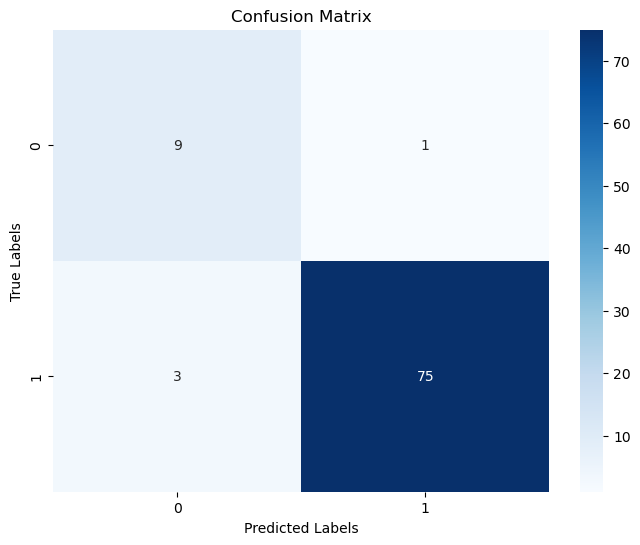

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 
# Assuming X_pca is the PCA-transformed data and y is the target variable
 
# Step 1: Train-test split on PCA-transformed data (or replace X_pca with X for original features)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
 
# Step 2: Initialize and Train the Gradient Boosting Model
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
 
# Step 3: Make predictions and evaluate the model
y_pred = gbc.predict(X_test)
 
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
 
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
 
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
